In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from copy import deepcopy
%matplotlib inline

rs = 42 # Global Random Seed




# Task 1. Data Preparation for Clustering.

In [2]:
## Read Dataset for Task1
df = pd.read_csv('online_shoppers_intention.csv')

## 1. Can you identify data quality issues in this dataset such as unusual data types, missing values, etc?

The Durations Columns can not be negative. Therefore, we drop the rows that contain negative value in duration columns.

In [3]:
def printColumnInfo(df):
    '''
    Display the information of this Dataframe
    '''
    
    for colName in df.columns:
        print("======================= " + str(colName) + " =======================")
        print("----------------------- FIRST FIVE -----------------------")
        print(df[colName][:5])
        print("----------------------- DESCIRBE -----------------------")
        print(df[colName].describe())
        print("----------------------- COUNTS -----------------------")
        commonList = list(df[colName].value_counts().keys())
        if len(commonList) > 100:
            print("Five Most Common: ", commonList[:5])
        else:
            print("Count List: \n", df[colName].value_counts())
        print("Num of NULL: ", df[colName].isnull().sum())

printColumnInfo(df)

======================= Administrative =======================
----------------------- FIRST FIVE -----------------------
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Administrative, dtype: float64
----------------------- DESCIRBE -----------------------
count    12316.000000
mean         2.317798
std          3.322754
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64
----------------------- COUNTS -----------------------
Count List: 
 0.0     5754
1.0     1354
2.0     1114
3.0      915
4.0      765
5.0      575
6.0      432
7.0      338
8.0      287
9.0      225
10.0     153
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
20.0       2
21.0       2
26.0       1
27.0       1
Name: Administrative, dtype: int64
Num of NULL:  14
======================= Administrative_Duration ======

In [4]:
durationCols= [  
  'Administrative_Duration',
  'Informational_Duration',
  'ProductRelated_Duration',]

In [5]:
# Removing the rows with negative duration
for colName in durationCols:
    print('Number of Negative Values: ', len(df[df[colName]<0]) )
    df = df[df[colName]>=0] 

Number of Negative Values:  33
Number of Negative Values:  0
Number of Negative Values:  0


After Removing the the negative value, the dataframe doens't contain the NULL now.

In [6]:
df.isnull().sum() # No null value

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

// TODO: Change it after deciding the features included

Measurement Level and vriable roles:
1. Administrative -> Interval (Input)
2. Administrative_Duration -> Ratio (Input)
3. Informational -> Interval (Input)
4. Informational_Duration -> Ratio (Input)
5. ProductRelated -> Interval (Input)
6. ProductRelated_Duration -> Ratio (Input)
7. BounceRates -> Ratio (Input)
8. ExitRates -> Ratio (Input)
9. PageValues -> Ratio (Input)
10. SpecialDay -> Ratio (Input)
11. Month -> Nominal (Input)
12. OperatingSystems -> Nominal (Input)
13. Browser -> Nominal (Input)
14. Region -> Nominal (Input)
15. TrafficType -> Nominal (Input)
16. VisitorType -> Nominal (Input)
17. Weekend -> Binary (Input)
18. Revenue -> Binary (Input) - This may be the target?

In [7]:
print("Number of observations: ", len(df))

Number of observations:  12283


In [8]:
# This function can help in pre-processing and plotting
def seperateDfToNumAndCat(df):
    Cat = []
    Num = []
    for colName in df.columns:
        if (df[colName].dtype == np.float):
            Num.append(colName)
        else:
            Cat.append(colName)
            
    return {
        'Cat':Cat,
        'Num':Num
    }
seperateDfToNumAndCat(df)

{'Cat': ['Month',
  'OperatingSystems',
  'Browser',
  'Region',
  'TrafficType',
  'VisitorType',
  'Weekend',
  'Revenue'],
 'Num': ['Administrative',
  'Administrative_Duration',
  'Informational',
  'Informational_Duration',
  'ProductRelated',
  'ProductRelated_Duration',
  'BounceRates',
  'ExitRates',
  'PageValues',
  'SpecialDay']}

=================== Administrative ===================


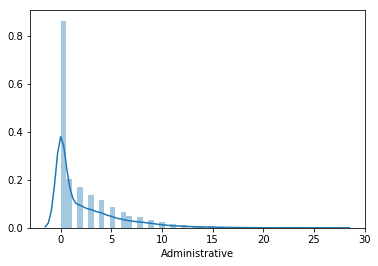

=================== Administrative_Duration ===================


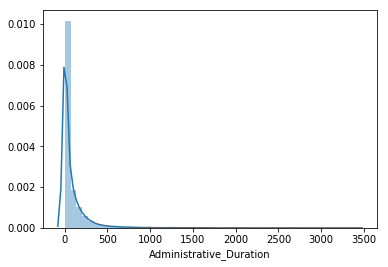

=================== Informational ===================


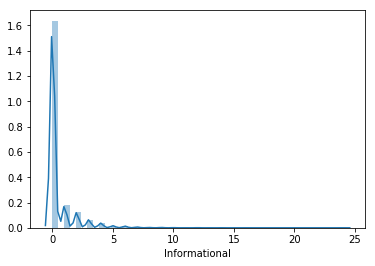

=================== Informational_Duration ===================


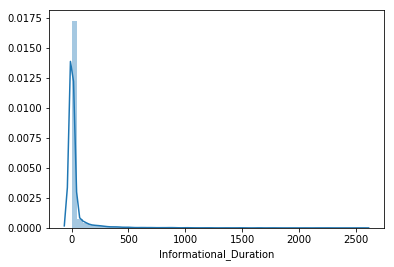

=================== ProductRelated ===================


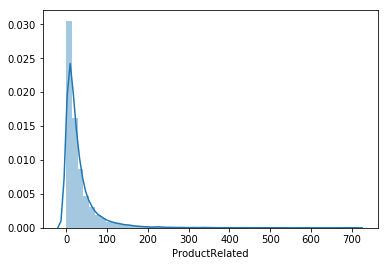

=================== ProductRelated_Duration ===================


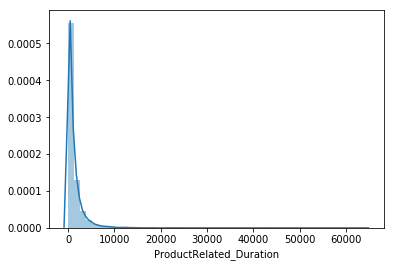

=================== BounceRates ===================


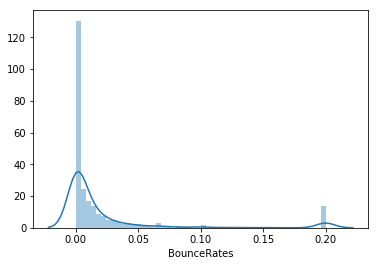

=================== ExitRates ===================


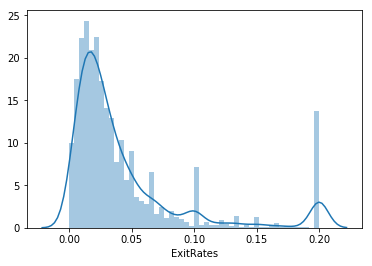

=================== PageValues ===================


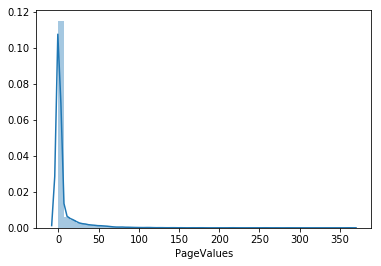

=================== SpecialDay ===================


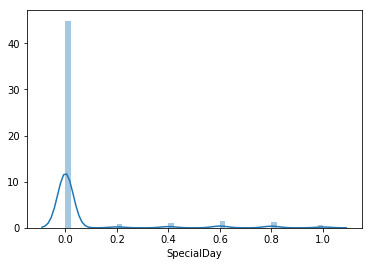

=================== Month ===================


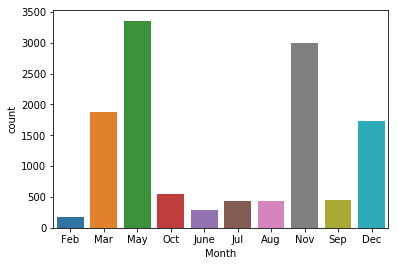

=================== OperatingSystems ===================


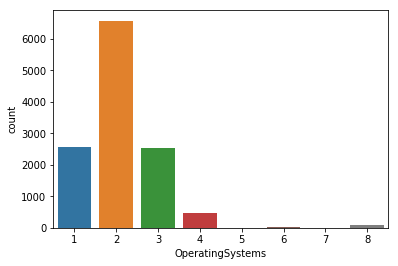

=================== Browser ===================


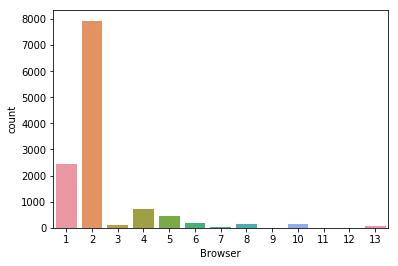

=================== Region ===================


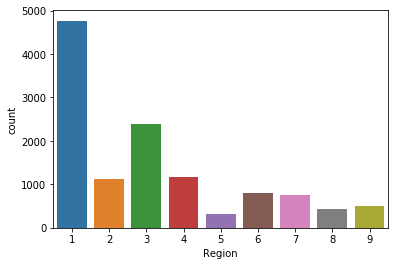

=================== TrafficType ===================


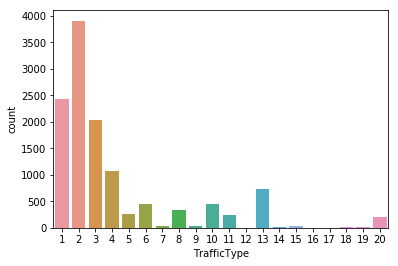

=================== VisitorType ===================


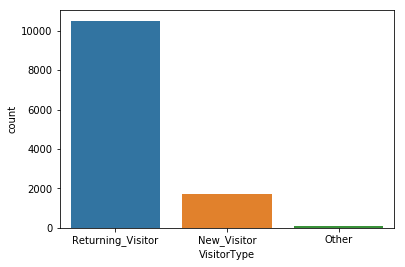

=================== Weekend ===================


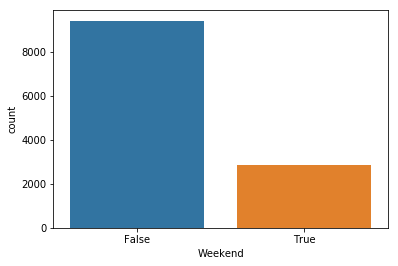

=================== Revenue ===================


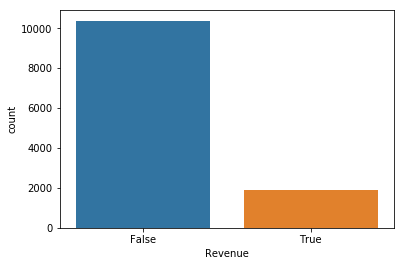

In [9]:
def plotingAllCols(df, colTypes):
    
    for colName in df.columns:
        print('===================',colName,'===================')
        if (colName in colTypes['Num']):
            sns.distplot(df[colName])
        elif (colName in colTypes['Cat']):
            sns.countplot(df[colName])
        else:
            raise ValueError
        plt.show()
plotingAllCols(df, seperateDfToNumAndCat(df))

In [10]:
# # If we have the null value in the dataset, we can use this function to fill the null

# from copy import deepcopy

# def preprocessTheNullValue(df_input, colTypes):
#     df = deepcopy(df_input)
#     for colName in df.columns:
#         ## Dealing with the Numerical first
#         if (colName in colTypes['Num']):
#             df[colName] = df[colName].astype('float')
#             if (df[colName].isnull().sum() > 0):
#                 df[colName] = df[colName].fillna(df[colName].mean())
        
#         ## Dealing with the Categorial
        
#         elif (colName in colTypes['Cat']):
#             df[colName] = df[colName].astype('category')
#             if (df[colName].isnull().sum() > 0):
#                 df[colName] = df[colName].fillna(df[colName].describe()['top'])

#     return df

# preprocessed_df = preprocessTheNullValue(df, seperateDfToNumAndCat(df))


# Task 2. The first clustering model

Q: What variables did you include in the analysis and what were their roles and
measurement level set? Justify your choice. Answer this question for each of the
tasks 2 and 3.


TODO: Fix this..

A: Since the requirement is to profile the customers through their time spending behaviour, we decide to pick the time-related attributes as the input of the clustering model, including 'Administrative','Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated' and 'ProductRelated_Duration'. 

In [11]:
taskOneCols = [  
  'Administrative_Duration',
  'Informational_Duration',
  'ProductRelated_Duration',]

taskTwoDf = df[taskOneCols]

Measurement Level and vriable roles:
1. Administrative -> Interval (Input)
2. Administrative_Duration -> Ratio (Input)
3. Informational -> Interval (Input)
4. Informational_Duration -> Ratio (Input)
5. ProductRelated -> Interval (Input)
6. ProductRelated_Duration -> Ratio (Input)

No Target for this clustering model

## 1. Build a clustering model to profile the customers based on the time they spend onthe website. Answer the followings:

### a. What is the optimal number of clusters? 

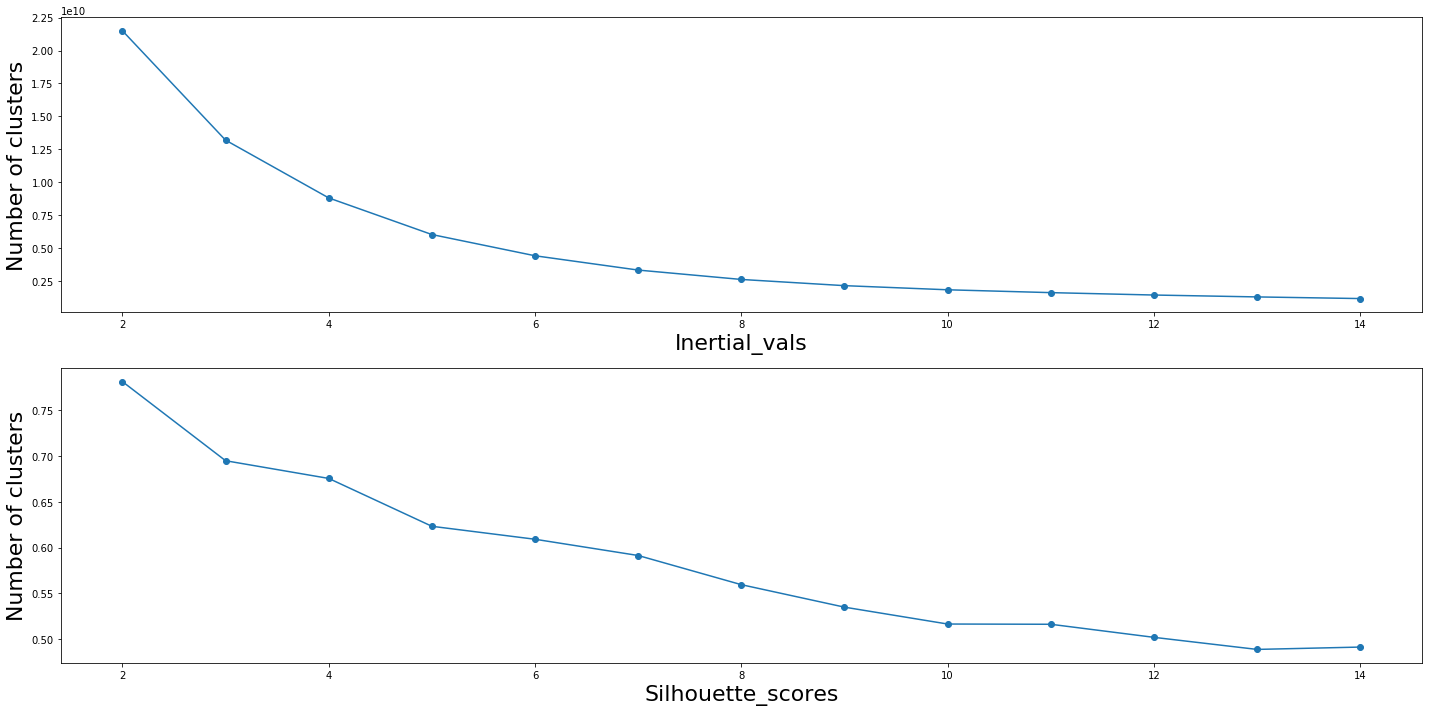

In [12]:
def ElbowEffectAndSilhouetteScore(data, kRunRange):
    clusters = []
    inertial_vals = []
    silhouette_scores = []
    
    for i in kRunRange:
        model = KMeans(n_clusters=i, random_state=rs, n_jobs=10)
        model.fit(data)
        clusters.append(model)
        inertial_vals.append(model.inertia_)
        silhouette_scores.append(silhouette_score(data, model.predict(data)))
    
    
    fig = plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(kRunRange, inertial_vals, marker='o', label='Inertial_vals')
    plt.ylabel('Inertial_vals', fontsize=22)
    plt.xlabel('Number of clusters', fontsize=22)    
    
    plt.subplot(212)
    plt.plot(kRunRange, silhouette_scores, marker='o', label="silhouette_scores")
    plt.ylabel('Silhouette_scores', fontsize=22)
    plt.xlabel('Number of clusters', fontsize=22)
    
    plt.tight_layout()
    plt.show()
    
    return clusters


clusters = ElbowEffectAndSilhouetteScore(taskTwoDf, range(2,15,1))

From the plot of Elbow Effect we can find the k=3 or k=4 may be the best option of number of clusters. Then we have a look of the silhouette scores, we found out the k=3 has a slightly higher score. Therefore, we determine the number of clusters is 3.


In [13]:
### Use the cetroid distance for measuring the cluster performance

In [14]:
# from sklearn.preprocessing import StandardScaler

# # take 3 variables and drop the rest
# df2 = df[['MedHHInc', 'MeanHHSz', 'RegDens']]

# # convert df2 to matrix
# X = df2.as_matrix()

# # scaling
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [15]:
### How can we dealing with the negative value in these 3 cols? since the duration shouldn't be -1

In [16]:
# # What variables did you include in the analysis and what were their roles and
# # measurement level set? Justify your choice. Answer this question for each of the
# # tasks 2 and 3.

# '''
# Since the first task want to cluster the customers based on the time they spend on the website. So we only contain
# the features that related to time spending on different types of page.
# '''
# taskOneIncludingCols= ['Administrative',
#   'Administrative_Duration',
#   'Informational',
#   'Informational_Duration',
#   'ProductRelated',
#   'ProductRelated_Duration',]

# # taskOneIncludingCols= [
# #   'Administrative_Duration',
# #   'Informational_Duration',
# #   'ProductRelated_Duration',]


# taskOneDf = preprocessed_df[taskOneIncludingCols]

### b. For the model with the optimal number of clusters, list the variables that were found important in determining the clusters?


Best Model Clusters k = 3
Value counts: 
 Cluster_0    10101
Cluster_1     1975
Cluster_2      207
Name: Cluster_ID, dtype: int64


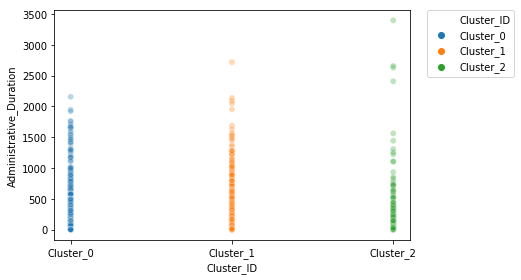

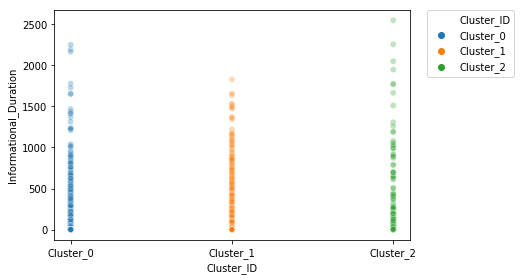

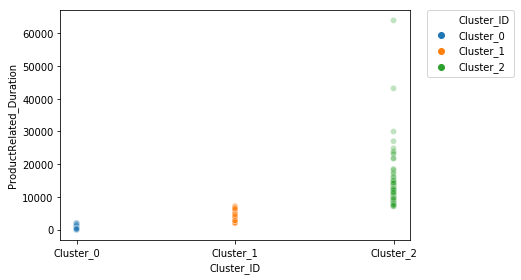

In [17]:
print("Best Model Clusters k =",clusters[1].n_clusters)

# TODO: have to take another visualization method

def pairplotVisualization(df, model):
    df_WithID = deepcopy(df)
    df_WithID['Cluster_ID'] = model.predict(df)
   
    sorted_countDict = sorted(dict(df_WithID['Cluster_ID'].value_counts()).items(), key=lambda item: item[1])
    for index, i in  enumerate(reversed(sorted_countDict)):
        df_WithID['Cluster_ID'].replace(i[0],"Cluster_" + str(index),inplace=True)
    
    print('Value counts: \n',df_WithID['Cluster_ID'].value_counts())
    for colName in df.columns:
        sns.scatterplot(x='Cluster_ID', y=colName, data=df_WithID, hue='Cluster_ID', alpha=0.3)
        plt.tight_layout()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()


# taskTwoDf_1_WithID = deepcopy(taskTwoDf_1)
# taskTwoDf_1_WithID['Cluster_ID'] = clusters[1].predict(taskTwoDf_1)
# print('Value counts: \n',taskTwoDf_1_WithID['Cluster_ID'].value_counts())
# sns.pairplot(taskTwoDf_1_WithID, hue='Cluster_ID', plot_kws={'alpha':0.5})

pairplotVisualization(taskTwoDf ,clusters[1])

In [18]:
def calculateFeatureDifference(centers):
    
    numClusters, numFeatures = centers.shape
    
    dif = []
    
    for i in range(numFeatures):
        feature_dif = 0
        for j in range(numClusters):
            for k in range(j+1, numClusters):
                feature_dif+= abs(centers[j, i] - centers[k,i])
        dif.append(feature_dif)
        
    return dif

calculateFeatureDifference(clusters[1].cluster_centers_)

[466.0985735326164, 493.3365836192419, 20613.91886108766]

From the visualization and the calculateFeatureDifferenc function, we found the 3rd feature (ProductRelated_Duration) is the most informative feature in this cluster model since it can appropriately seperate the three different cluster. Moreover, the 3 clusters centroids has the largest difference on the 3rd dimension (ProductRelated_Duration). Therefore, ProductRelated_Duration is the most important in determining the clusters.
  

### c. Explain the cluster results.

In [19]:
# Display the label of the clusters
count_dict = dict(pd.DataFrame(clusters[1].labels_)[0].value_counts())

In [20]:
# Since the result may vary everytime, we wrote a function to display it.

def displayClusterResult(model):
    count_dict = dict(pd.DataFrame(model.labels_)[0].value_counts())
    sorted_countDict = sorted(count_dict.items(), key=lambda item: item[1])
    k = model.n_clusters
    print("The k =",k,"clustering model seperate all the observations to",k ,"clusters. Cluster",
        sorted_countDict[-1][0], "is the largest cluster, which consists of ",
        sorted_countDict[-1][1],
        "objects. And the the Cluster", sorted_countDict[0][0],
        "is the samllest cluster, which only own ",
        sorted_countDict[0][1],
        " objects. And the centroids of these three clusters are located at",
        str(model.cluster_centers_[0]), ',', str(
            model.cluster_centers_[1]),
        'and', str(model.cluster_centers_[2]),
        '. The Sum of squared distance of objects to their closest centroid is ',
        model.inertia_,'. Moreover, to get this result, the model runs',
        model.n_iter_,'iteration.' )

In [21]:
displayClusterResult(clusters[1])

The k = 3 clustering model seperate all the observations to 3 clusters. Cluster 2 is the largest cluster, which consists of  10101 objects. And the the Cluster 1 is the samllest cluster, which only own  207  objects. And the centroids of these three clusters are located at [ 154.87747813   84.67261984 3355.10746367] , [  295.36489079   266.72309447 10886.17436548] and [ 62.31560402  20.05480266 579.21493494] . The Sum of squared distance of objects to their closest centroid is  13185315708.802977 . Moreover, to get this result, the model runs 29 iteration.


## 2. What is the effect of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

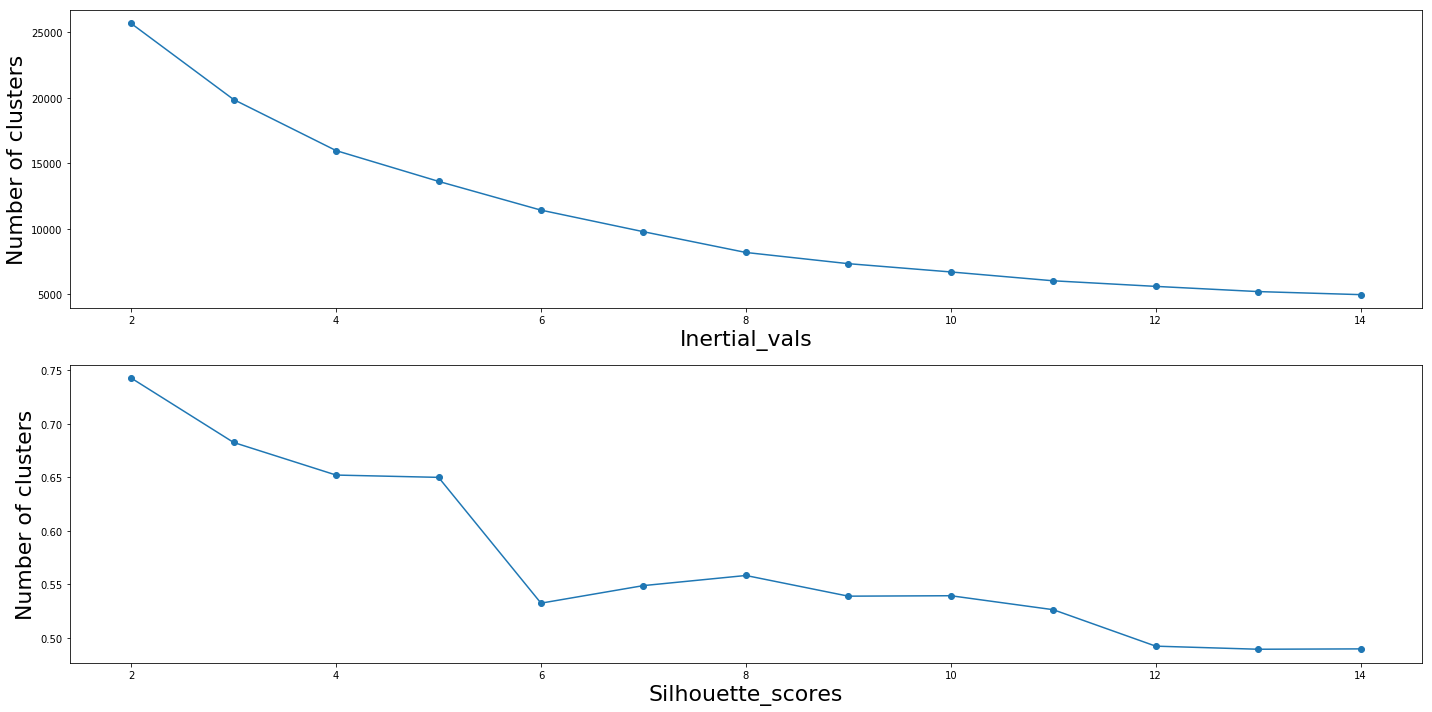

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
taskTwoDf_Standardised = scaler.fit_transform(taskTwoDf)
taskTwoDf_Standardised = pd.DataFrame(taskTwoDf_Standardised, columns= taskTwoDf.columns)

clusters_Standardised = ElbowEffectAndSilhouetteScore(taskTwoDf_Standardised, range(2,15,1))

From the Elbow Effect, we can find that the stadardised clusters have more gradual decline curve than the original one, which means the number of clusters doesn't have a strong impact as the original model. Moreover, the silhouette scores also show a differnet curve in the standardised model. These factors may affect the decision of k.

Value counts: 
 Cluster_0    10902
Cluster_1     1194
Cluster_2      187
Name: Cluster_ID, dtype: int64


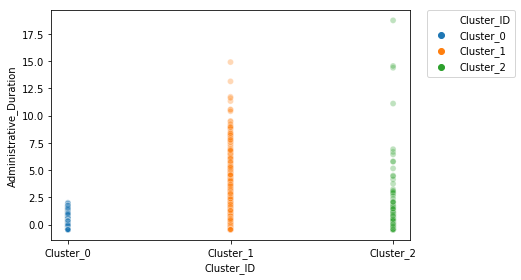

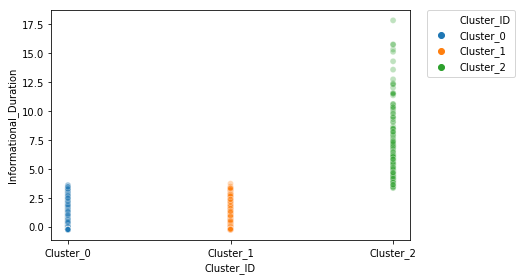

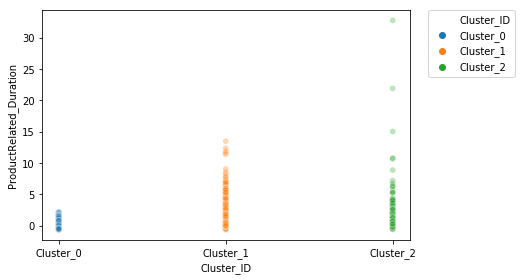

In [23]:
# If we still the k = 3
pairplotVisualization(taskTwoDf_Standardised, clusters_Standardised[1])

From the pairplot visualization, we can see the distribution of each cluster become different. In this model, we can seperate the objects easily in all the features, except the cluster 0 and cluster 1 in informational_Duration feature. In this model, each cluster has a strong character and unique distribution. Therefore, the standardised input results in a better solution in this case.

In [24]:
calculateFeatureDifference(clusters_Standardised[1].cluster_centers_)

[4.004705793981389, 13.373080638205202, 4.0830708223043874]

The standardised model also different from the original in the distance of centroids. The original model has the largest distance in the ProductRelated_Duration feature. However, the standardised has the largest distance in the Informational_Duration.

In [25]:
displayClusterResult(clusters_Standardised[1])

The k = 3 clustering model seperate all the observations to 3 clusters. Cluster 1 is the largest cluster, which consists of  10902 objects. And the the Cluster 2 is the samllest cluster, which only own  187  objects. And the centroids of these three clusters are located at [1.78843011 0.3419077  1.58146492] , [-0.21392278 -0.14957353 -0.20471064] and [1.05240988 6.53696679 1.83682478] . The Sum of squared distance of objects to their closest centroid is  19875.616386269867 . Moreover, to get this result, the model runs 18 iteration.


## 3. Interpret the cluster analysis outcome. In other words, characterize the nature of each cluster by giving it a descriptive label and a brief description. 

// The Question 3 is based on the result of Q2 or Q1?

3. Interpret the cluster analysis outcome. In other words, characterize the nature of
each cluster by giving it a descriptive label and a brief description. 

Value counts: 
 Cluster_0    10101
Cluster_1     1975
Cluster_2      207
Name: Cluster_ID, dtype: int64


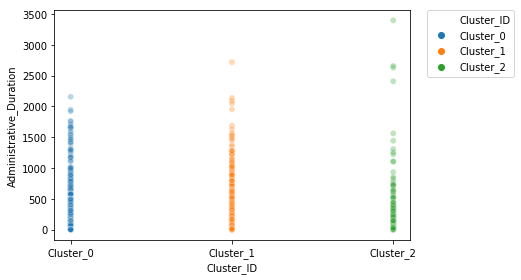

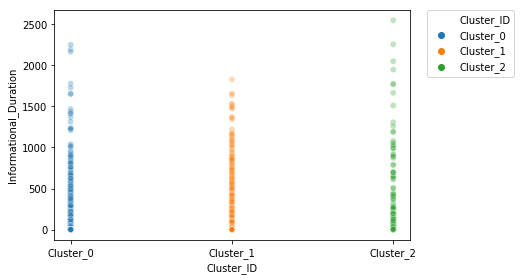

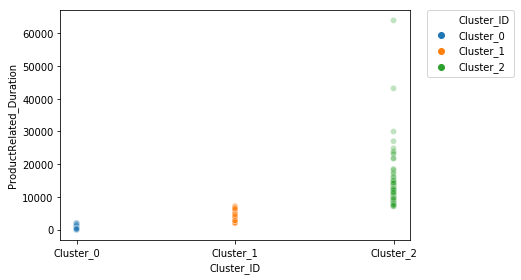

In [26]:
pairplotVisualization( taskTwoDf,clusters[1])

Cluster_1 (Blue): This cluster consist of the most of the observations. Number of objects in this cluster is 10138. This cluster has a Informational_Duration. And, the feature of this cluter is the least ProductRelated_Duration. The Administrative_Duration feature in this cluster is compact, most of the instances are in the range of 0 to 2000.


Cluster_2 (Green): This cluster is the second large group, which has 1973 objects. It has the wider range that Cluster_1 in Administrative_Duration. However, most of the objects is still in the range of 0 to 2000. In terms of the Informational_Duration, this cluster has the least value and samllest range. Moreover, this cluster also has a small value of ProductRelated_Duration but slightly larger than Cluster_1.


Cluster_3 (Red): This cluster has the smallest group, which consist of only 205 objects. This cluster has the widest range and highest value in all the three features. In the Administrative_Duration, even this cluster has the widest range, most of the instances exist in the range of 0 to 1500.


# Task 3. Refining the clustering model 

## 1. Add more information such as where the users come from and when they access the website, to the clustering analysis that you have conducted in the previous task. Answer the followings:

Question: What variables did you include in the analysis and what were their roles and
measurement level set? Justify your choice. Answer this question for each of the
tasks 2 and 3.

Answer: We found all the feature can be informative; therefore, we decide to include all the features for this clustering task.

In [27]:
taskThreeDf = deepcopy(df)
taskThreeDf = pd.get_dummies(taskThreeDf)

// TODO: Change it after deciding the features included

Measurement Level and vriable roles:
1. Administrative -> Interval (Input)
2. Administrative_Duration -> Ratio (Input)
3. Informational -> Interval (Input)
4. Informational_Duration -> Ratio (Input)
5. ProductRelated -> Interval (Input)
6. ProductRelated_Duration -> Ratio (Input)
7. BounceRates -> Ratio (Input)
8. ExitRates -> Ratio (Input)
9. PageValues -> Ratio (Input)
10. SpecialDay -> Ratio (Input)
11. Month -> Nominal (Input)
12. OperatingSystems -> Nominal (Input)
13. Browser -> Nominal (Input)
14. Region -> Nominal (Input)
15. TrafficType -> Nominal (Input)
16. VisitorType -> Nominal (Input)
17. Weekend -> Binary (Input)
18. Revenue -> Binary (Input) - This may be the target?

In [28]:
print('All',len(taskThreeDf.columns),'Features:\n', list(taskThreeDf.columns))

All 29 Features:
 ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other', 'VisitorType_Returning_Visitor']


### a. What is the optimal number of clusters? 

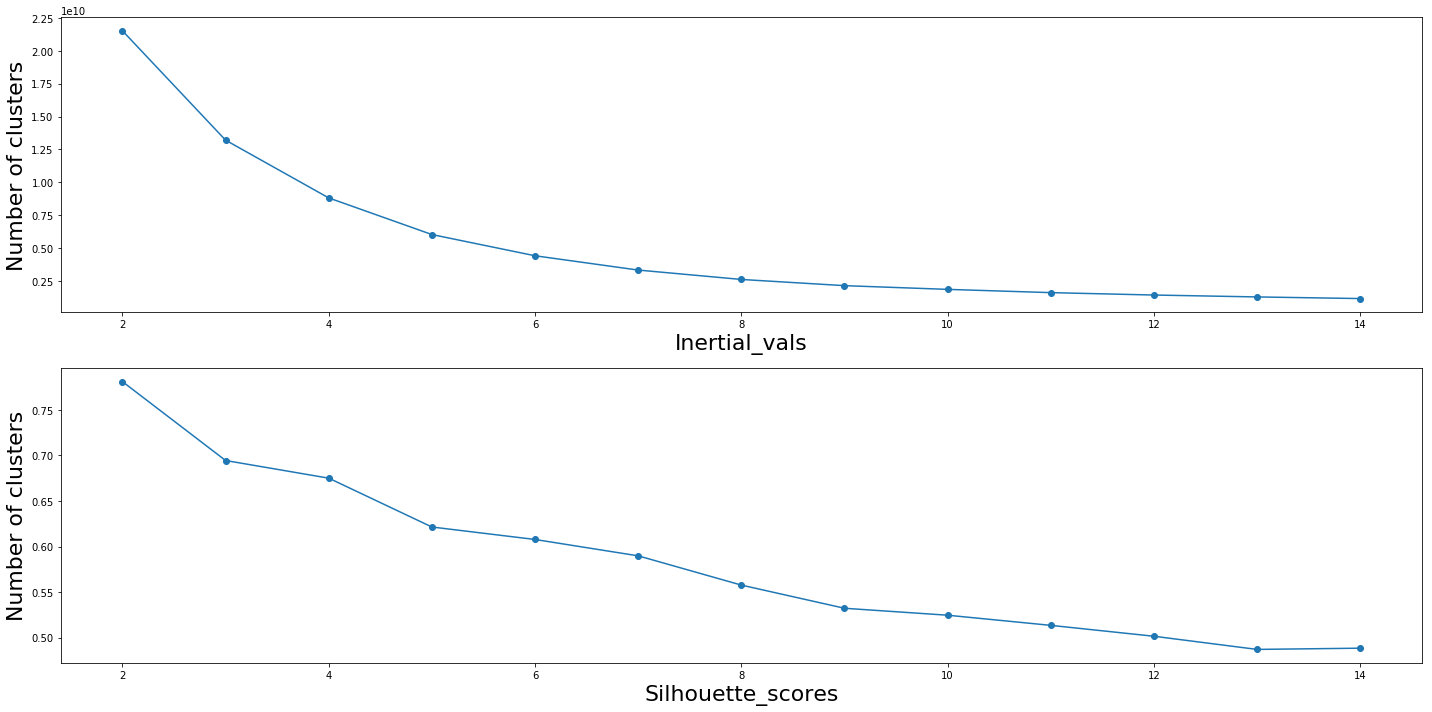

In [29]:
refinedClusters = ElbowEffectAndSilhouetteScore(taskThreeDf, range(2,15,1))

From the plot of Elbow Effect, we can find the Elbow at k=3 or k=4. And, the silhouette scores tell us the k = 3 is better match to its own cluster. Hence, we pick k = 3 for this case.

### b. Whether this model has different variable importance than the previous model (Task 2.1)?

In [30]:
taskThreeDf['Weekend'] = taskThreeDf['Weekend'].astype('uint8')
taskThreeDf['Revenue'] = taskThreeDf['Revenue'].astype('uint8')

In [31]:
def lmplotVisualization(df, model):
    df_WithID = deepcopy(df)
    df_WithID['Cluster_ID'] = model.predict(df)
    
    sorted_countDict = sorted(dict(df_WithID['Cluster_ID'].value_counts()).items(), key=lambda item: item[1])
    for index, i in  enumerate(reversed(sorted_countDict)):
        df_WithID['Cluster_ID'].replace(i[0],"Cluster_" + str(index),inplace=True)
    
    print('Value counts: \n',df_WithID['Cluster_ID'].value_counts())
    for colName in df.columns:
        print('===========================', colName, '(',df[colName].dtype,')','===========================') 
        sns.lmplot(x='Cluster_ID', y=colName ,hue= 'Cluster_ID',scatter=True,fit_reg=False, data=df_WithID, scatter_kws={'alpha':0.2}) 
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

Value counts: 
 Cluster_0    10101
Cluster_1     1975
Cluster_2      207
Name: Cluster_ID, dtype: int64
=========================== Administrative ( float64 ) ===========================


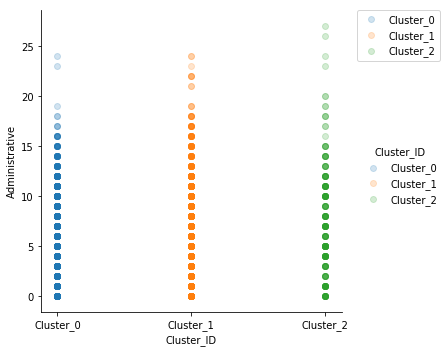

=========================== Administrative_Duration ( float64 ) ===========================


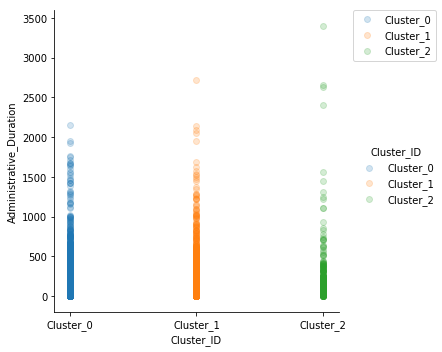

=========================== Informational ( float64 ) ===========================


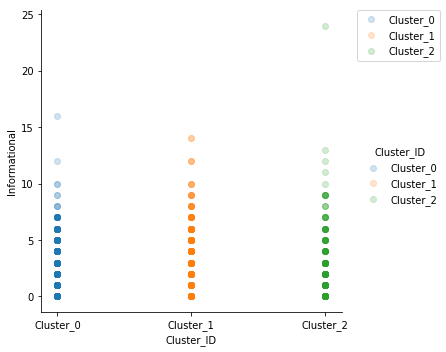

=========================== Informational_Duration ( float64 ) ===========================


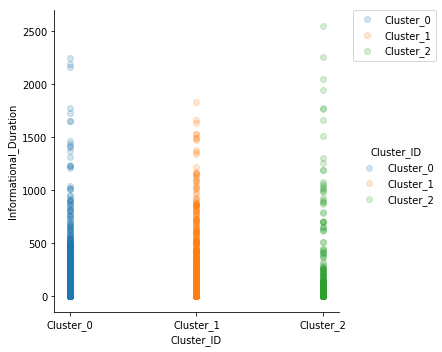

=========================== ProductRelated ( float64 ) ===========================


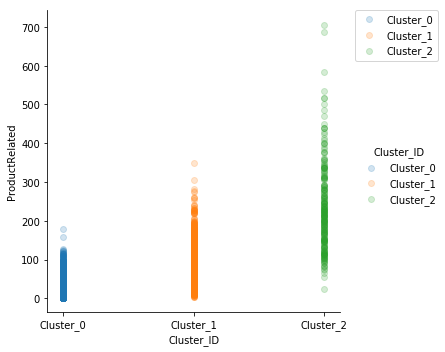

=========================== ProductRelated_Duration ( float64 ) ===========================


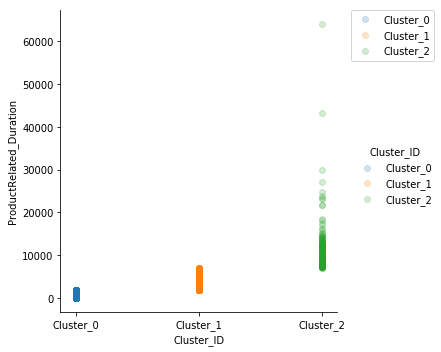

=========================== BounceRates ( float64 ) ===========================


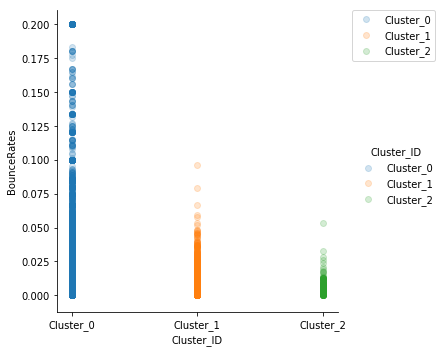

=========================== ExitRates ( float64 ) ===========================


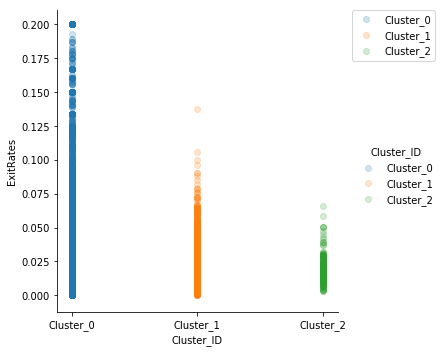

=========================== PageValues ( float64 ) ===========================


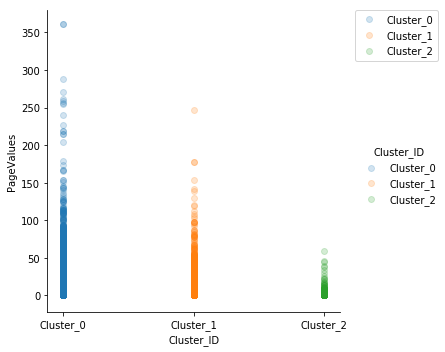

=========================== SpecialDay ( float64 ) ===========================


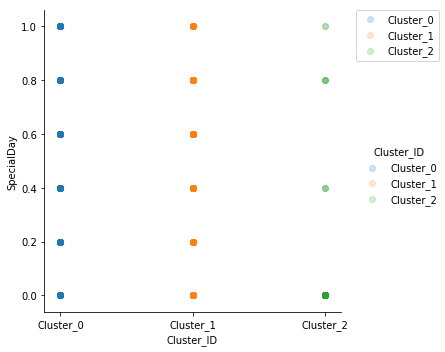

=========================== OperatingSystems ( int64 ) ===========================


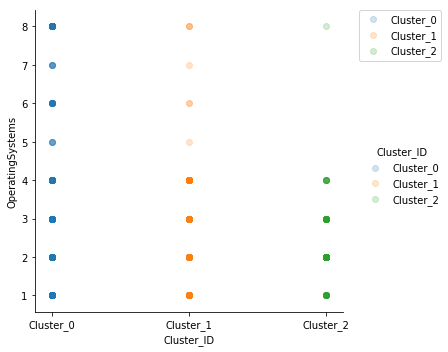

=========================== Browser ( int64 ) ===========================


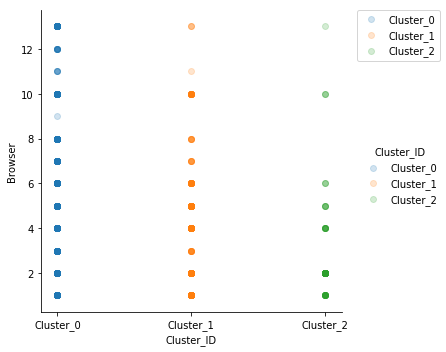

=========================== Region ( int64 ) ===========================


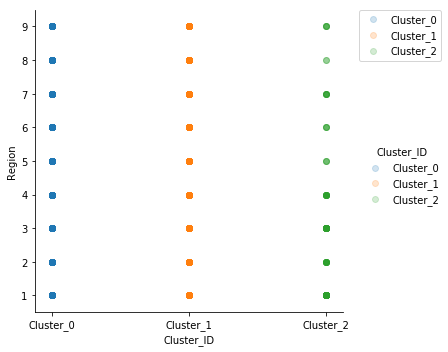

=========================== TrafficType ( int64 ) ===========================


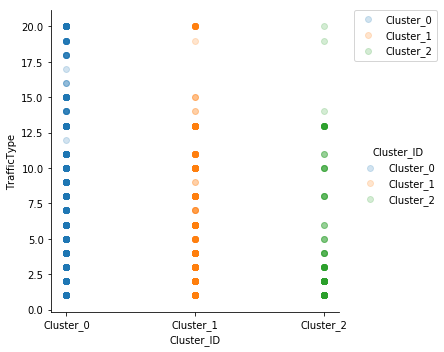

=========================== Weekend ( uint8 ) ===========================


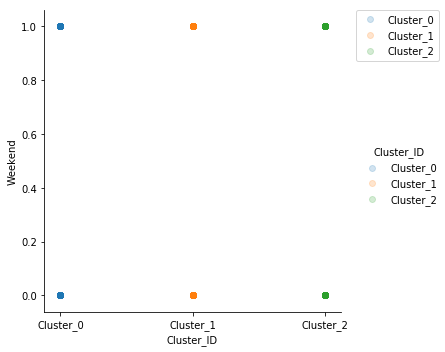

=========================== Revenue ( uint8 ) ===========================


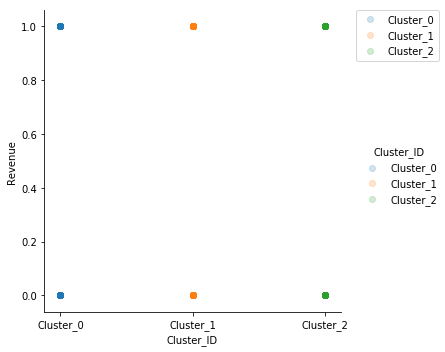

=========================== Month_Aug ( uint8 ) ===========================


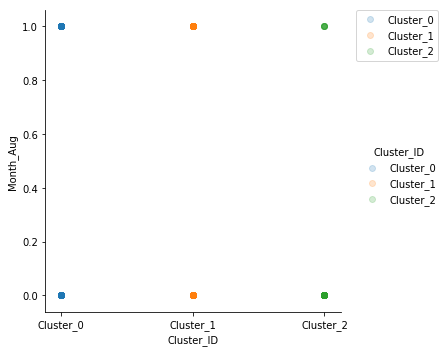

=========================== Month_Dec ( uint8 ) ===========================


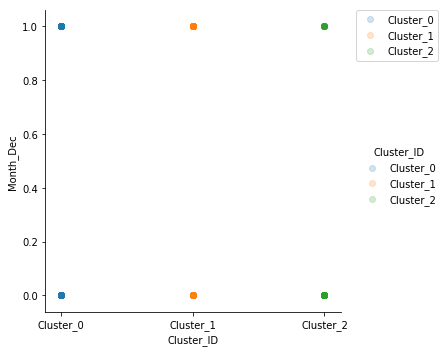

=========================== Month_Feb ( uint8 ) ===========================


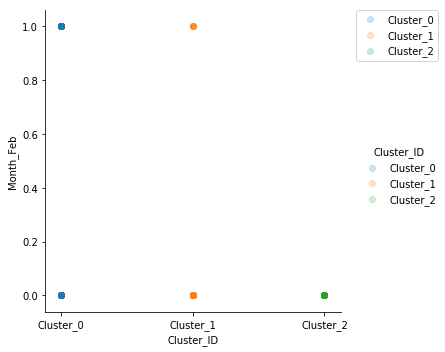

=========================== Month_Jul ( uint8 ) ===========================


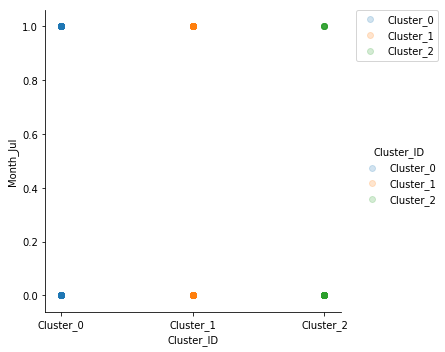

=========================== Month_June ( uint8 ) ===========================


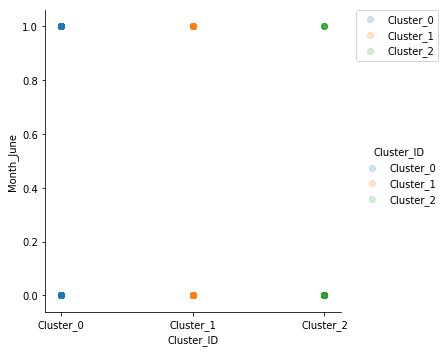

=========================== Month_Mar ( uint8 ) ===========================


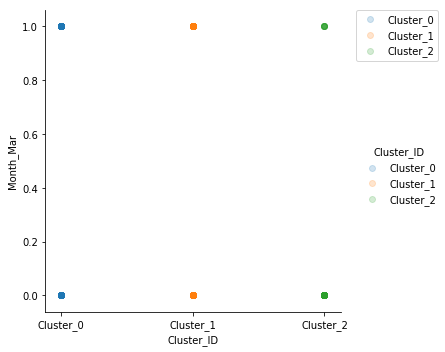

=========================== Month_May ( uint8 ) ===========================


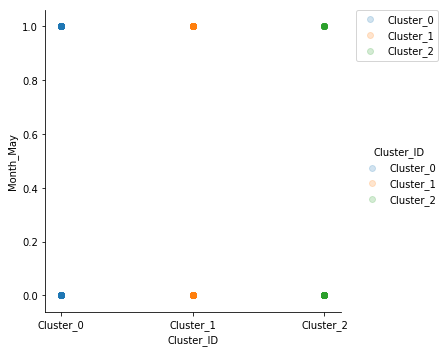

=========================== Month_Nov ( uint8 ) ===========================


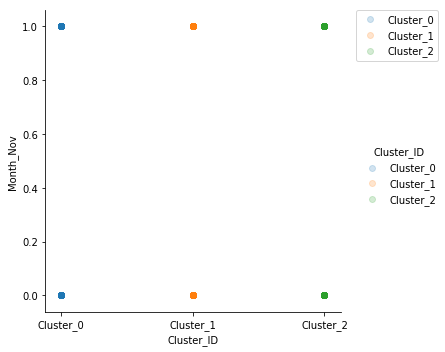

=========================== Month_Oct ( uint8 ) ===========================


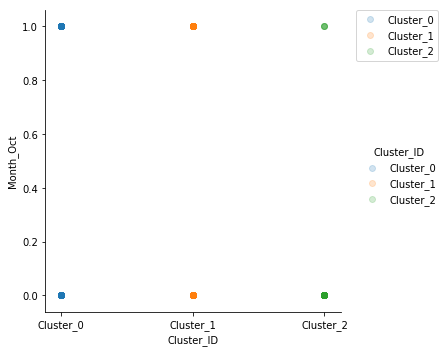

=========================== Month_Sep ( uint8 ) ===========================


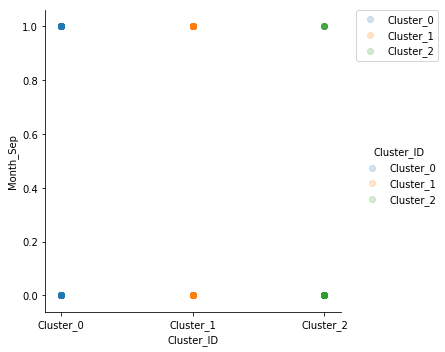

=========================== VisitorType_New_Visitor ( uint8 ) ===========================


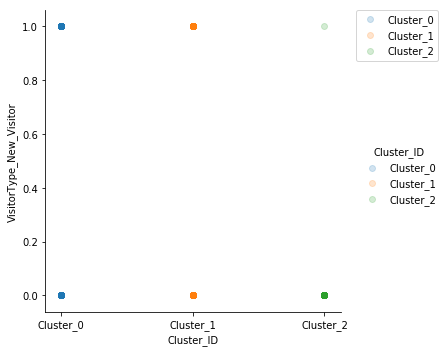

=========================== VisitorType_Other ( uint8 ) ===========================


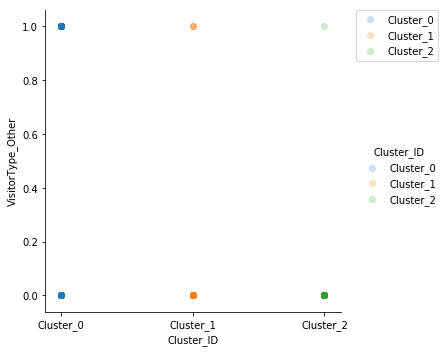

=========================== VisitorType_Returning_Visitor ( uint8 ) ===========================


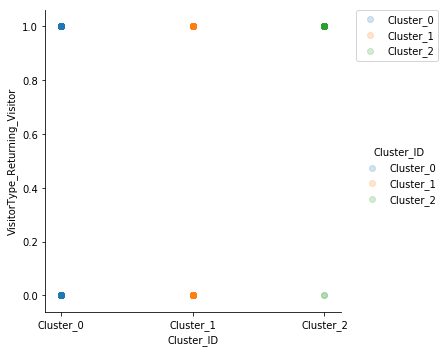

In [32]:
lmplotVisualization(taskThreeDf, refinedClusters[1])

In [44]:
def CompareVisualization(df_1, model_1, df_2, model_2, columns):
    
    df_1_WithID = deepcopy(df_1)
    df_2_WithID = deepcopy(df_2)
    
    df_1_WithID['Cluster_ID'] = model_1.predict(df_1)
    df_2_WithID['Cluster_ID'] = model_2.predict(df_2)
    print('(1) Value counts: \n',df_1_WithID['Cluster_ID'].value_counts())
    print('(2) Value counts: \n',df_2_WithID['Cluster_ID'].value_counts())
    

    # Rename the Cluster_ID by size
    for df_WithID in [df_1_WithID, df_2_WithID]:
        sorted_countDict = sorted(dict(df_WithID['Cluster_ID'].value_counts()).items(), key=lambda item: item[1])
        for index, i in  enumerate(reversed(sorted_countDict)):
            df_WithID['Cluster_ID'].replace(i[0],"Cluster_" + str(index),inplace=True)
    
    
    
    def getType(colName):
        
        if colName in df_1:
            return df_1[colName].dtype
        elif colName in df_2:
            return df_2[colName].dtype
        else:
            return "NULL"
    
    
    for colName in columns:
        
        print('===========================', colName, '(',getType(colName),')','===========================') 
        
        fig,ax = plt.subplots(ncols=2, nrows=3,figsize=(10, 15))
        if colName in df_1.columns:
            sns.violinplot(x='Cluster_ID', y=colName ,hue= 'Cluster_ID', data=df_1_WithID, ax=ax[0,0] ,scale="count" ,scale_hue=False)
            sns.violinplot(x='Cluster_ID', y=colName ,hue= 'Cluster_ID', data=df_1_WithID, ax=ax[1,0] )           
            sns.scatterplot(x='Cluster_ID', y=colName ,hue= 'Cluster_ID',  data=df_1_WithID, alpha=0.2, ax=ax[2,0])
            ax[0,0].get_legend().remove()
            ax[1,0].get_legend().remove()
            ax[2,0].get_legend().remove()
           
        
        if colName in df_2.columns:
            sns.violinplot(x='Cluster_ID', y=colName ,hue= 'Cluster_ID', data=df_2_WithID, ax=ax[0, 1] ,scale="count",scale_hue=False)
            sns.violinplot(x='Cluster_ID', y=colName ,hue= 'Cluster_ID', data=df_2_WithID, ax=ax[1 ,1]) 
            sns.scatterplot(x='Cluster_ID', y=colName ,hue= 'Cluster_ID', data=df_2_WithID, alpha=0.2, ax=ax[2,1])
            ax[0,1].get_legend().remove()
            ax[1,1].get_legend().remove()
            ax[2,1].get_legend().remove()
            
       
        plt.tight_layout()
#         plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
    
    return df_1_WithID, df_2_WithID

(1) Value counts: 
 2    10101
0     1975
1      207
Name: Cluster_ID, dtype: int64
(2) Value counts: 
 2    10101
0     1975
1      207
Name: Cluster_ID, dtype: int64
=========================== Administrative ( float64 ) ===========================


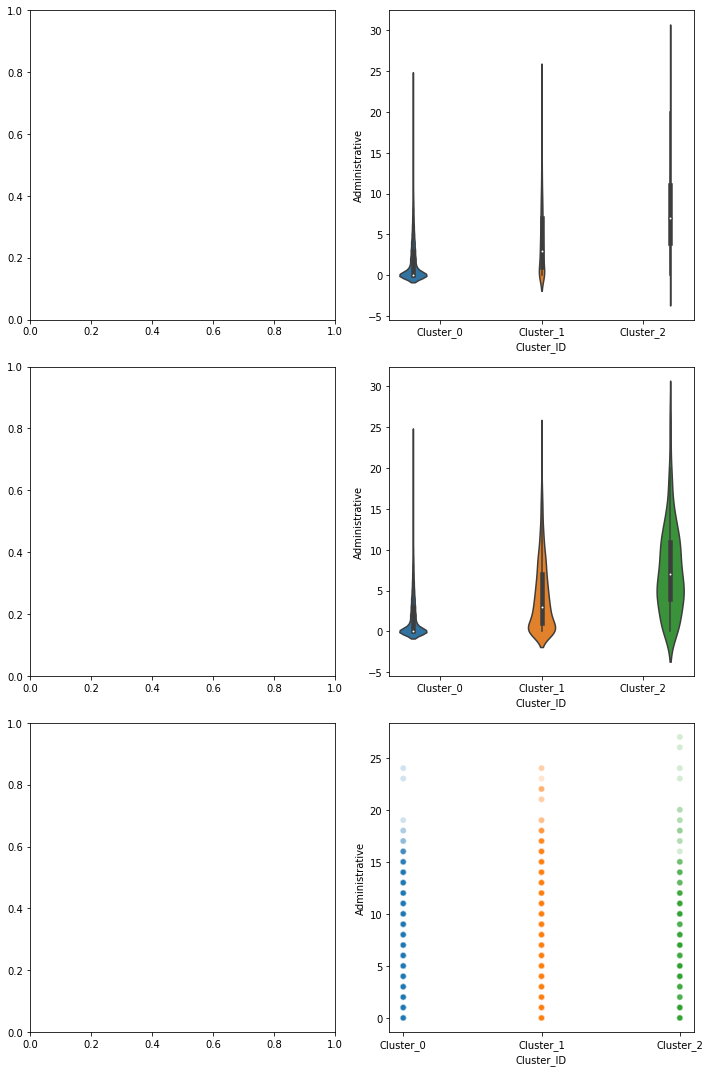

=========================== Administrative_Duration ( float64 ) ===========================


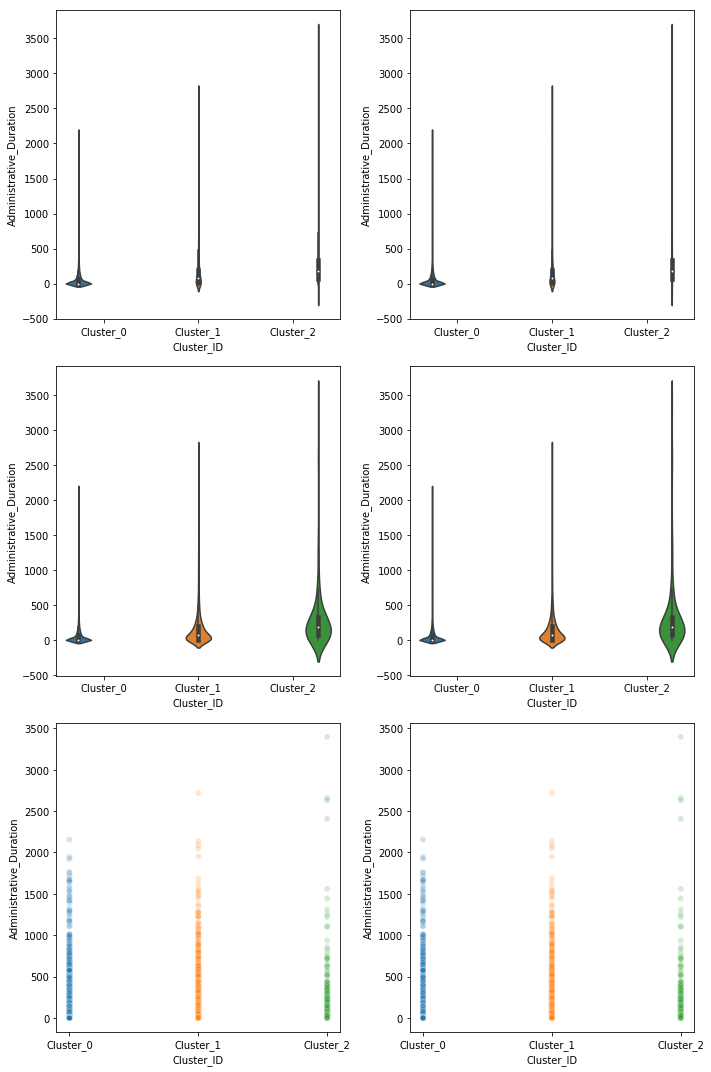

=========================== Informational ( float64 ) ===========================


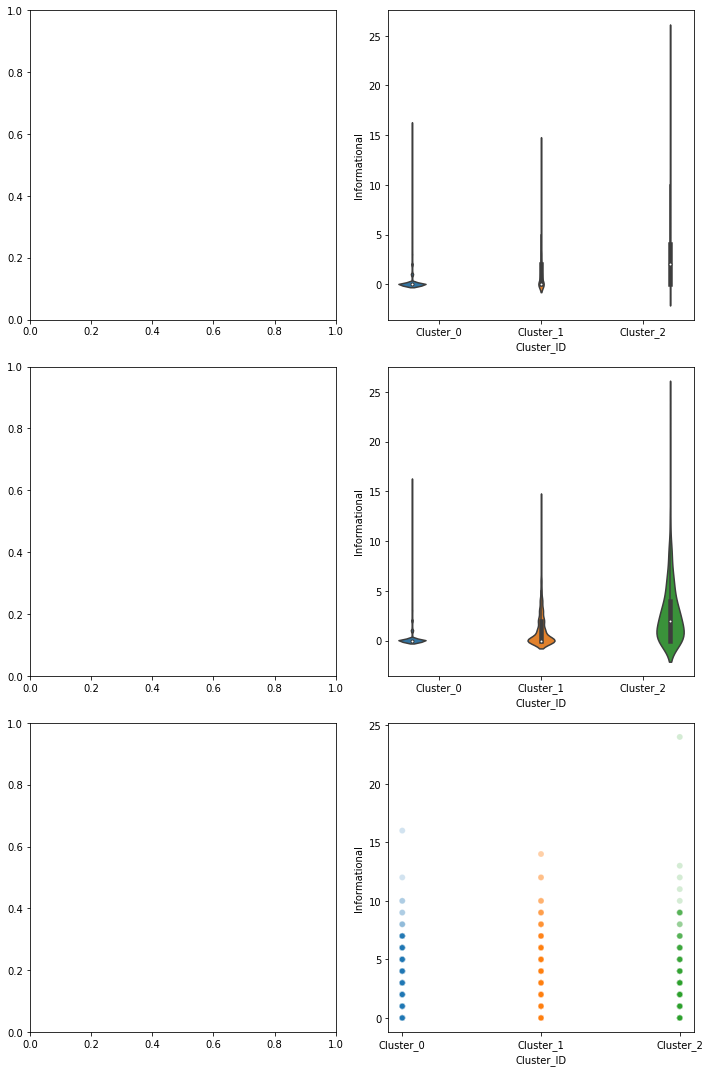

=========================== Informational_Duration ( float64 ) ===========================


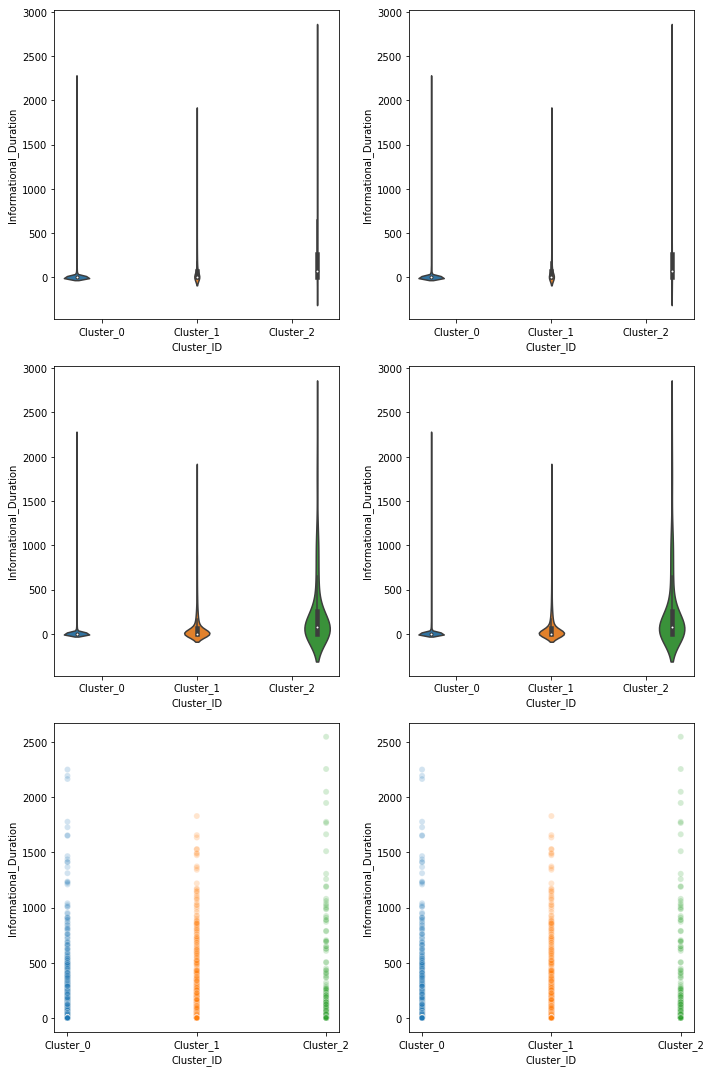

=========================== ProductRelated ( float64 ) ===========================


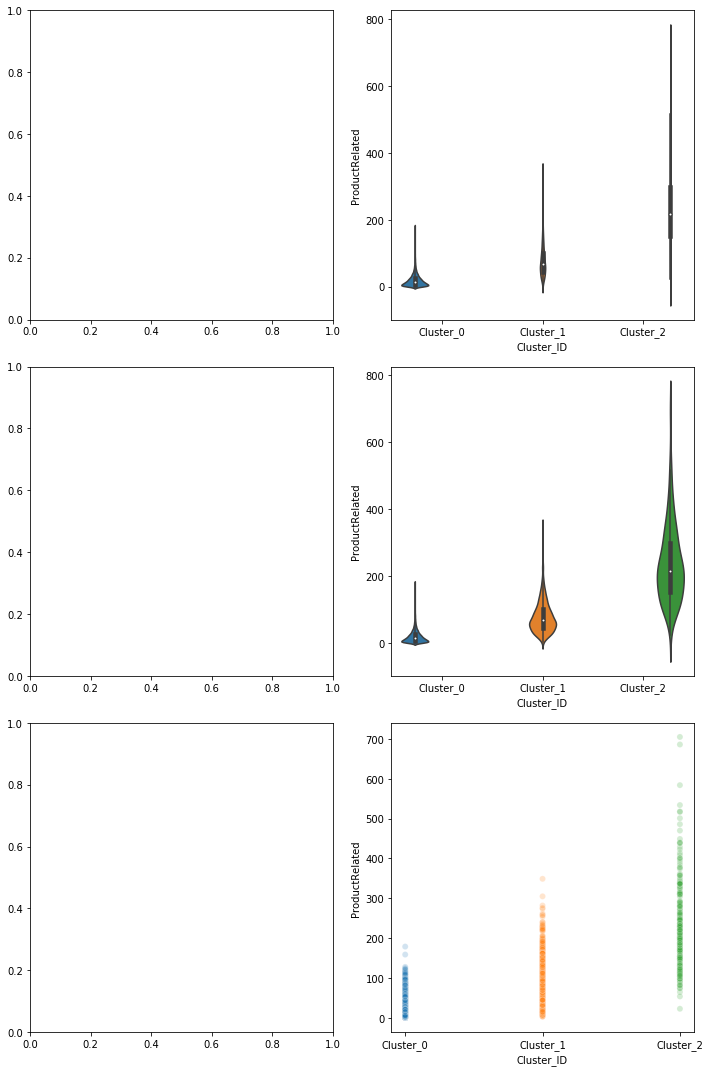

=========================== ProductRelated_Duration ( float64 ) ===========================


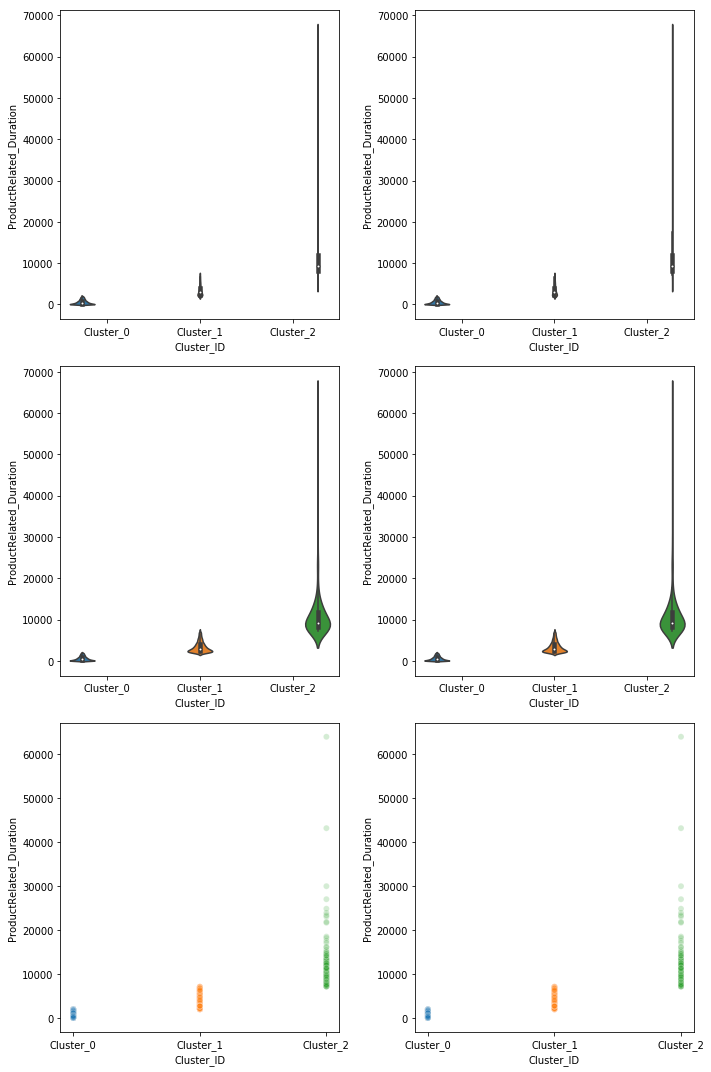

=========================== BounceRates ( float64 ) ===========================


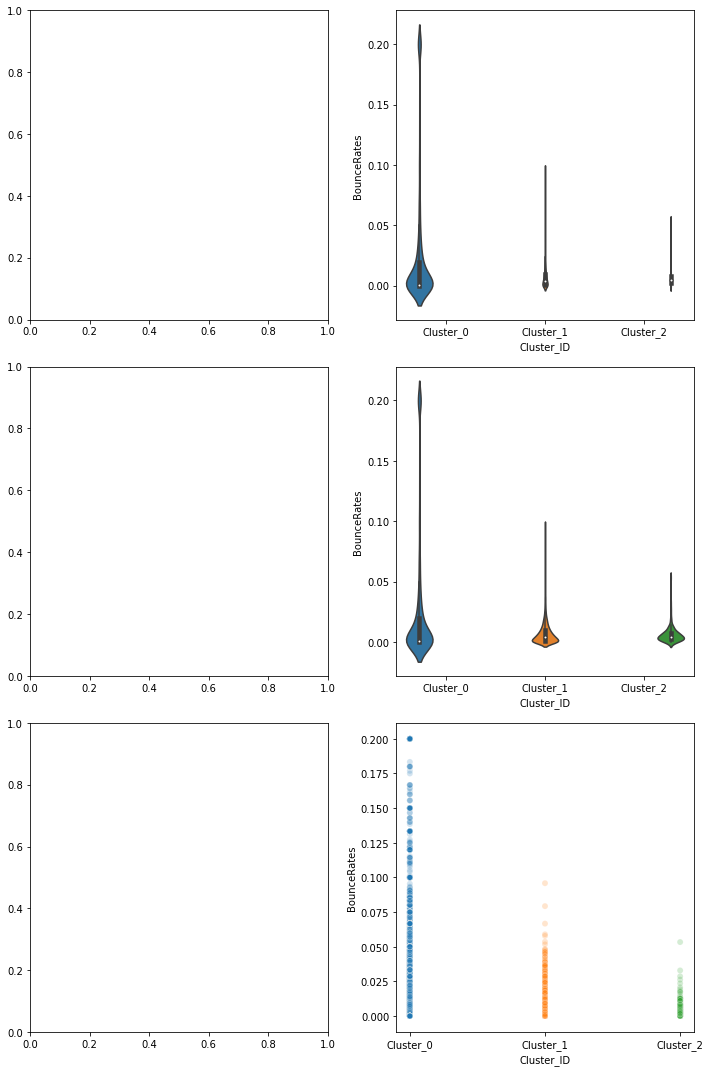

=========================== ExitRates ( float64 ) ===========================


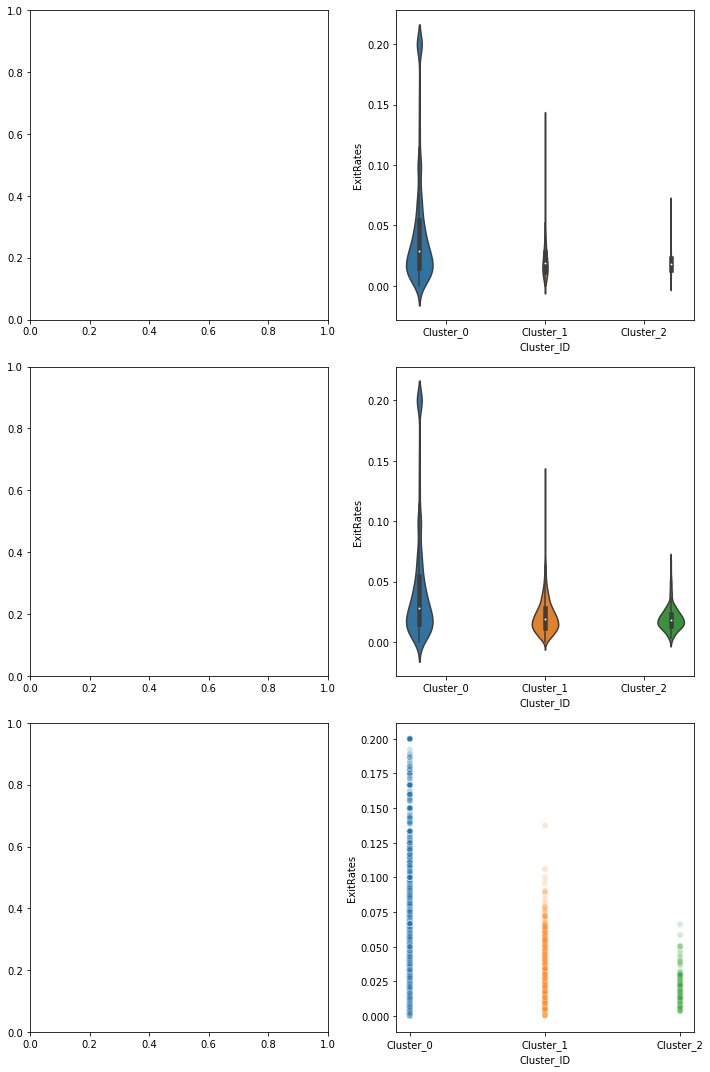

=========================== PageValues ( float64 ) ===========================


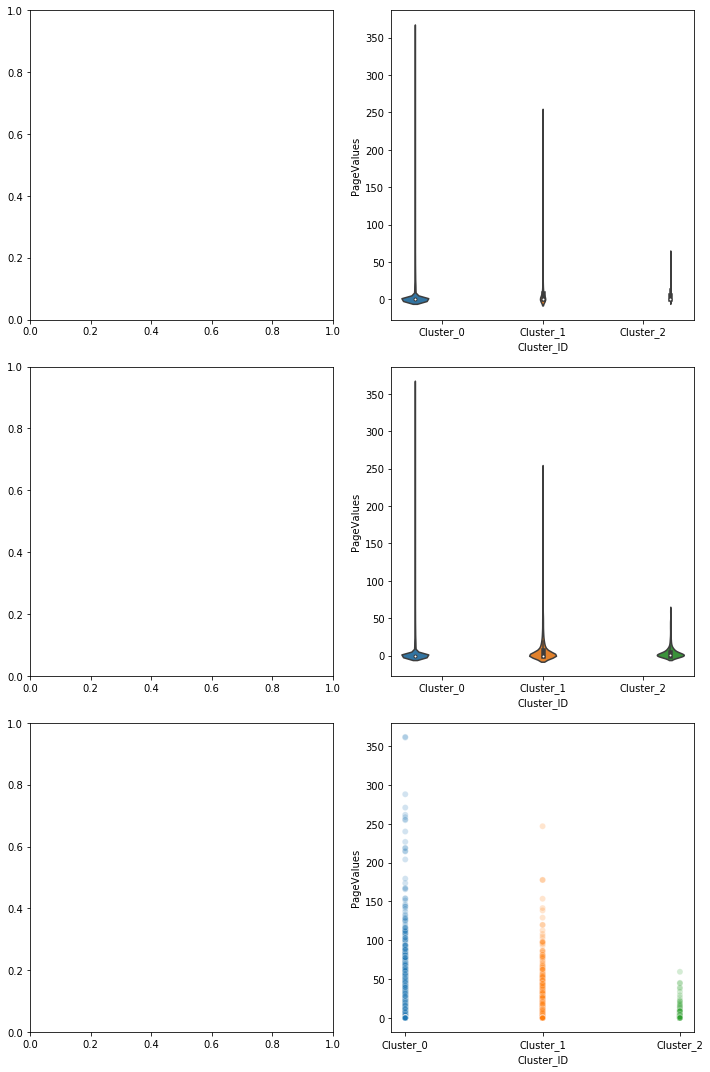

=========================== SpecialDay ( float64 ) ===========================


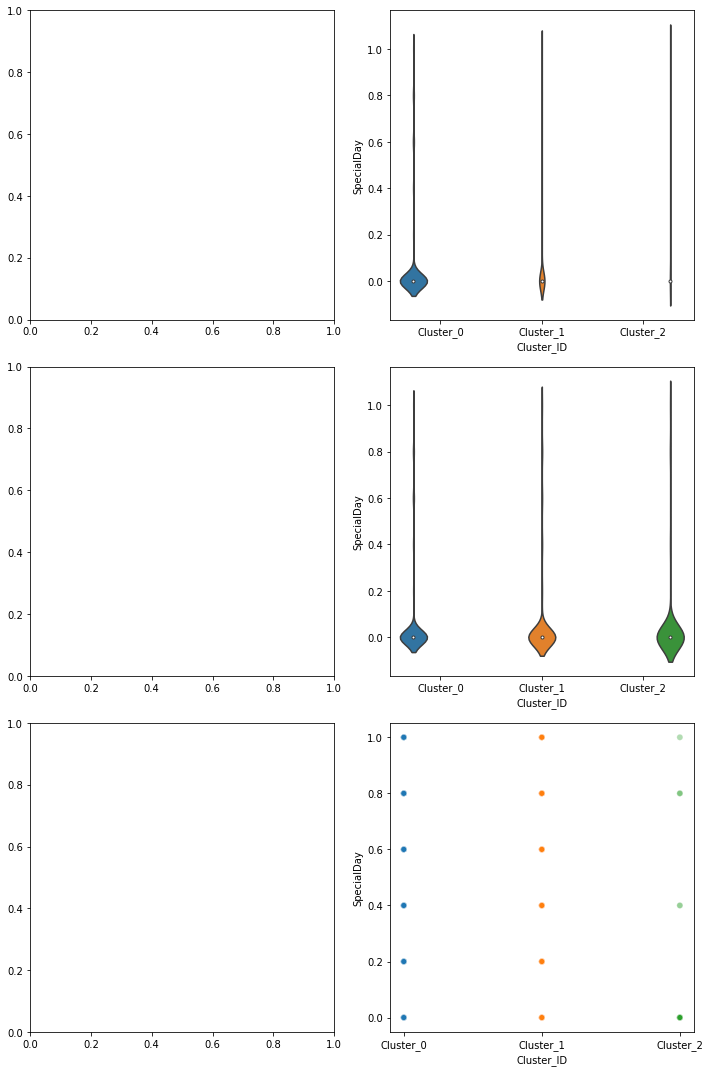

=========================== OperatingSystems ( int64 ) ===========================


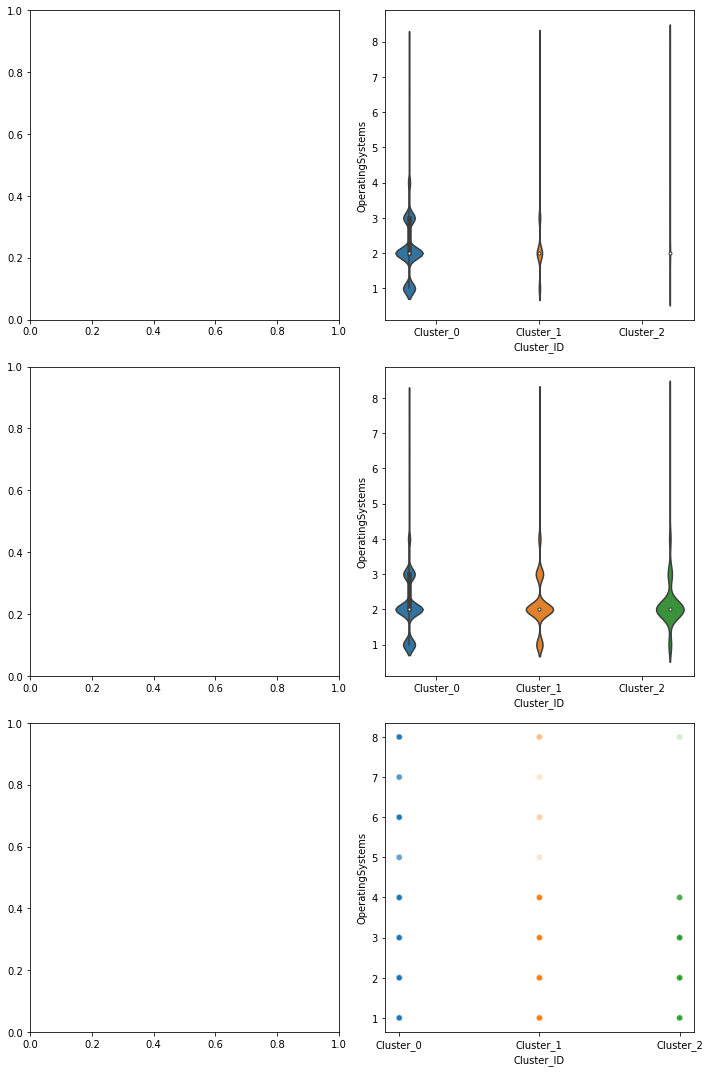

=========================== Browser ( int64 ) ===========================


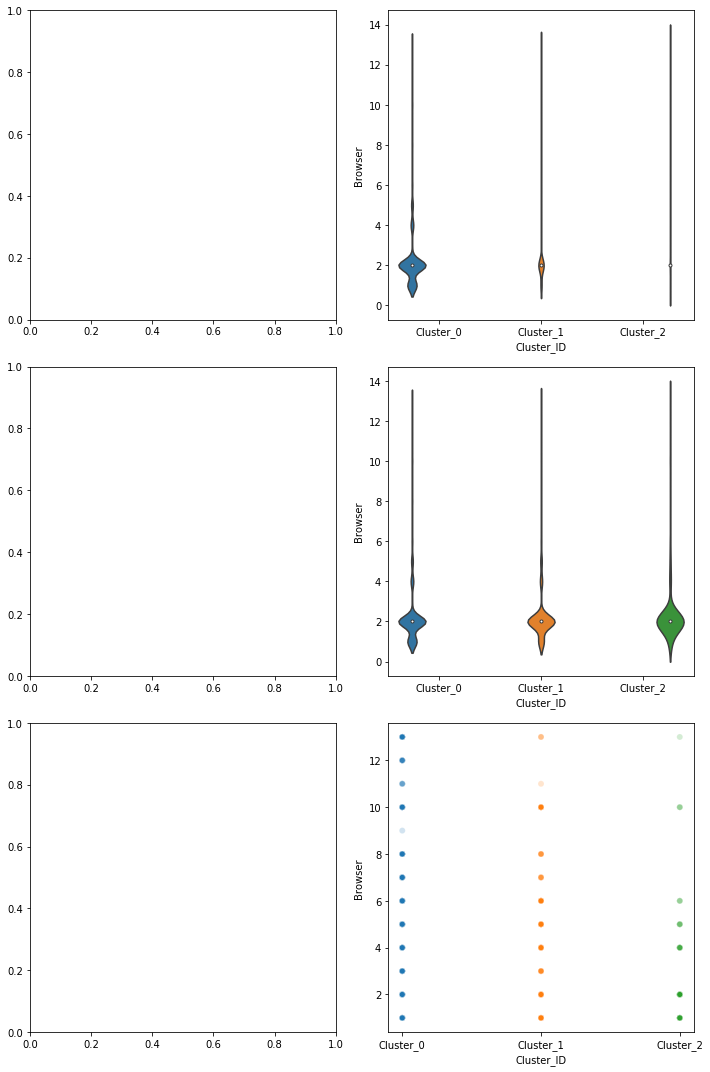

=========================== Region ( int64 ) ===========================


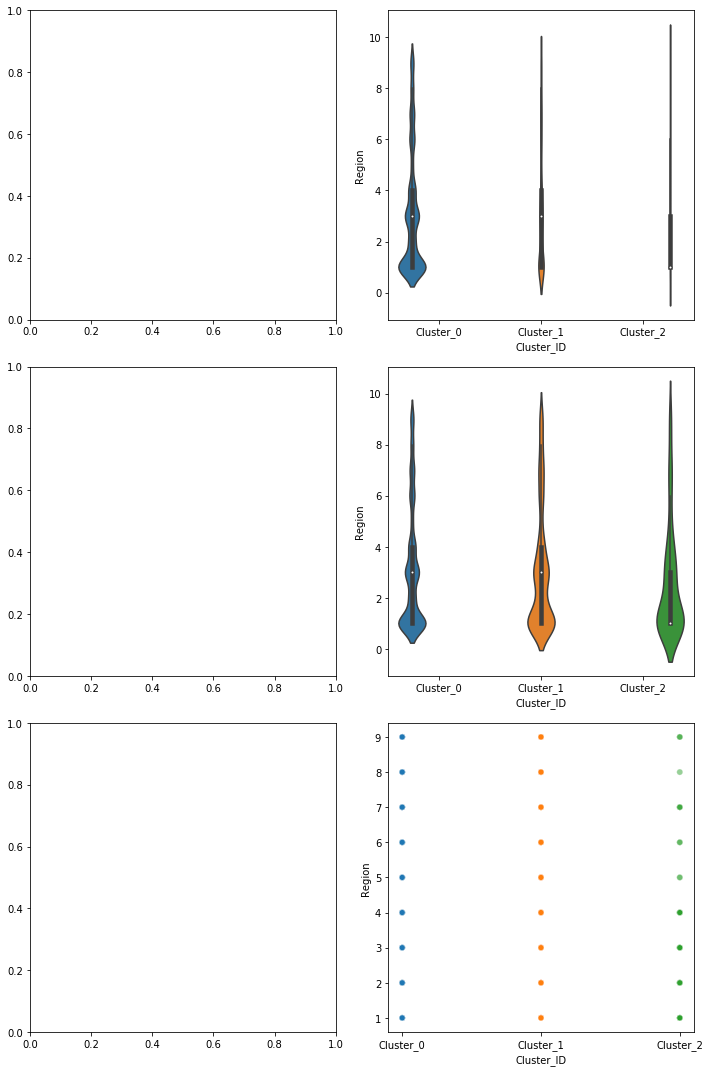

=========================== TrafficType ( int64 ) ===========================


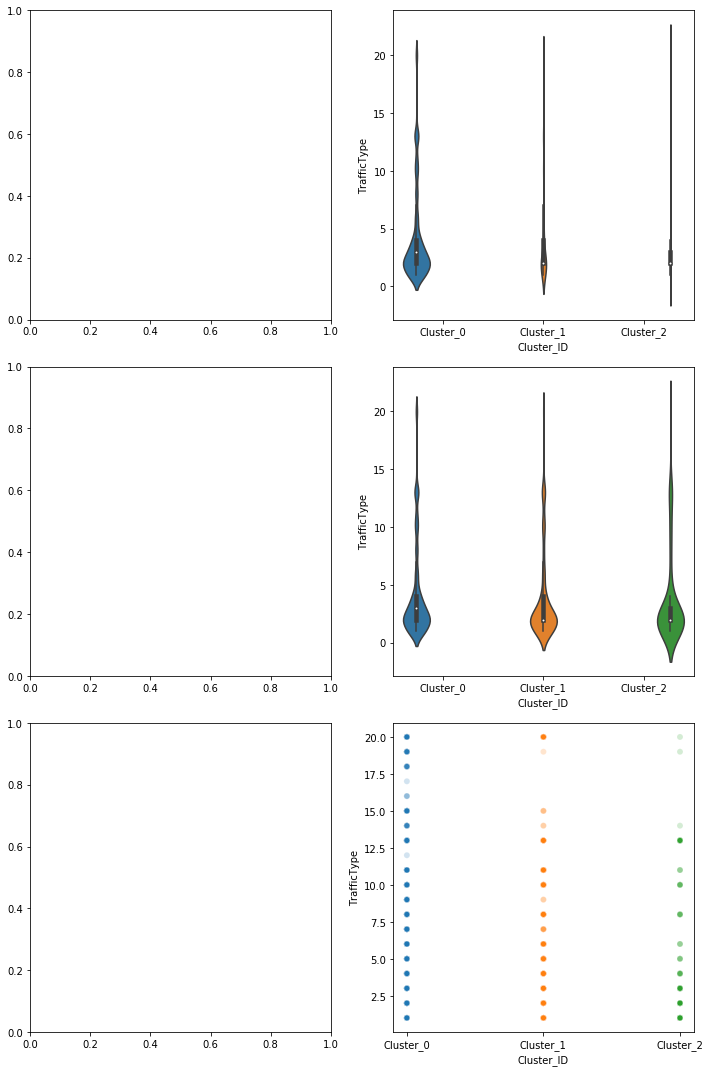

=========================== Weekend ( uint8 ) ===========================


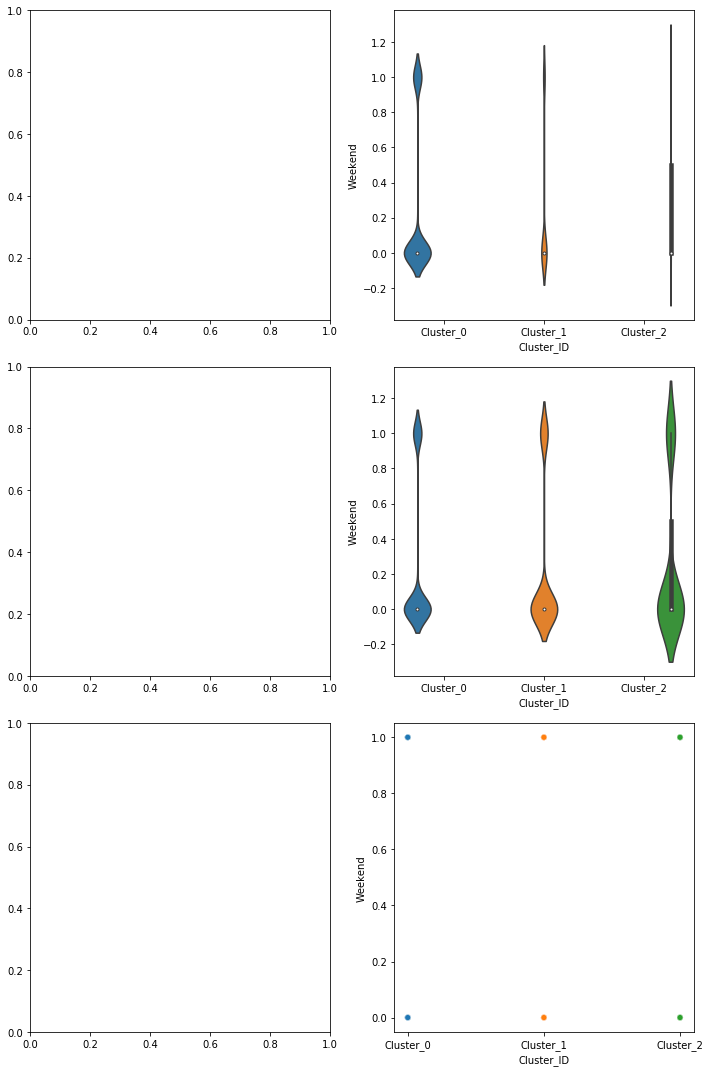

=========================== Revenue ( uint8 ) ===========================


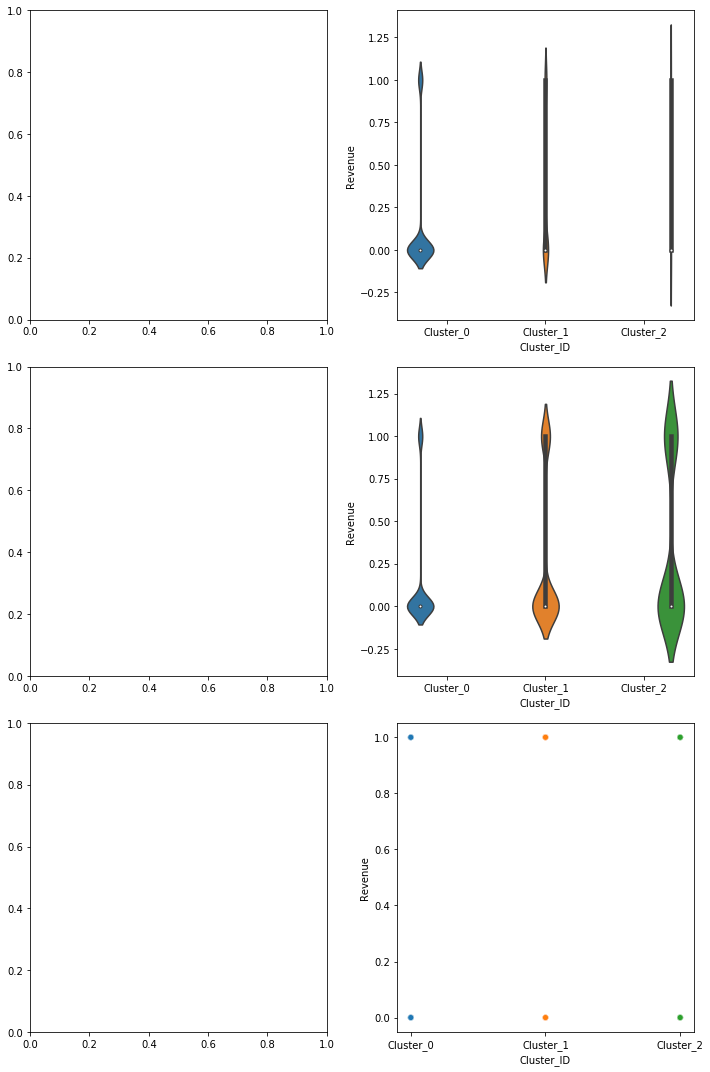

=========================== Month_Aug ( uint8 ) ===========================


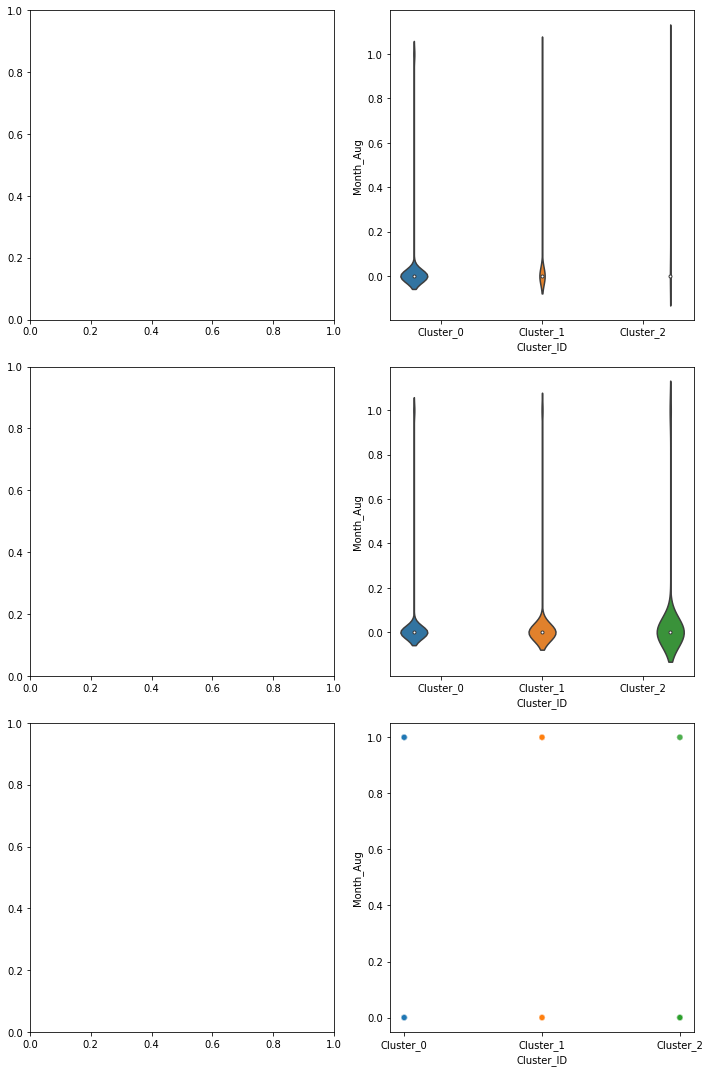

=========================== Month_Dec ( uint8 ) ===========================


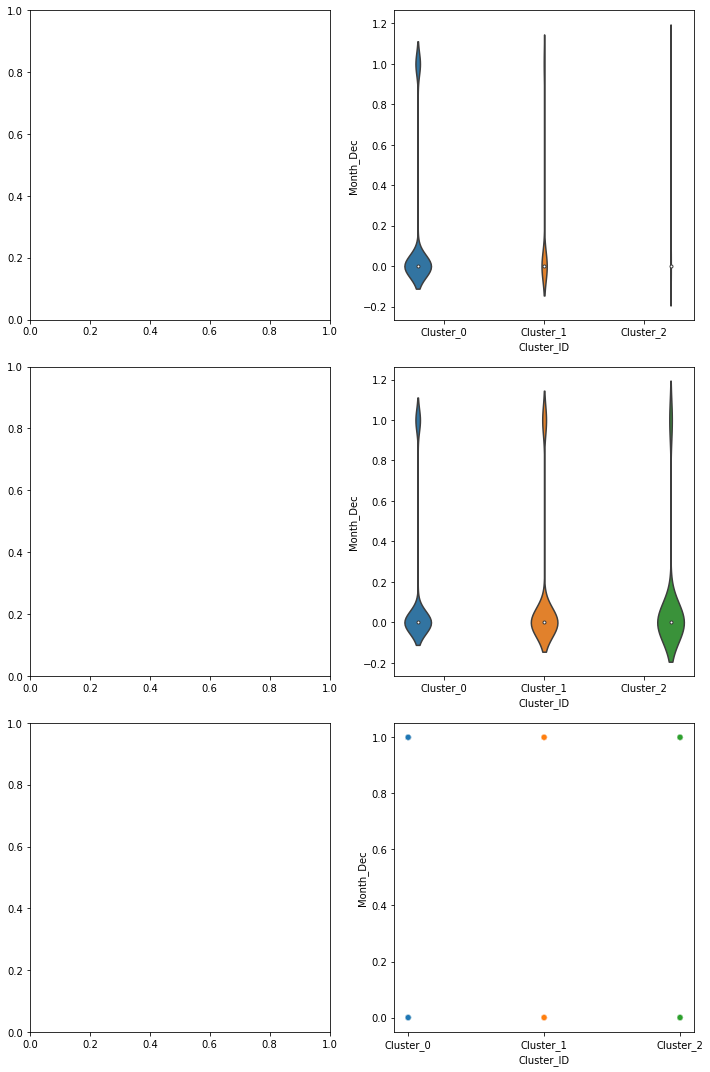

=========================== Month_Feb ( uint8 ) ===========================


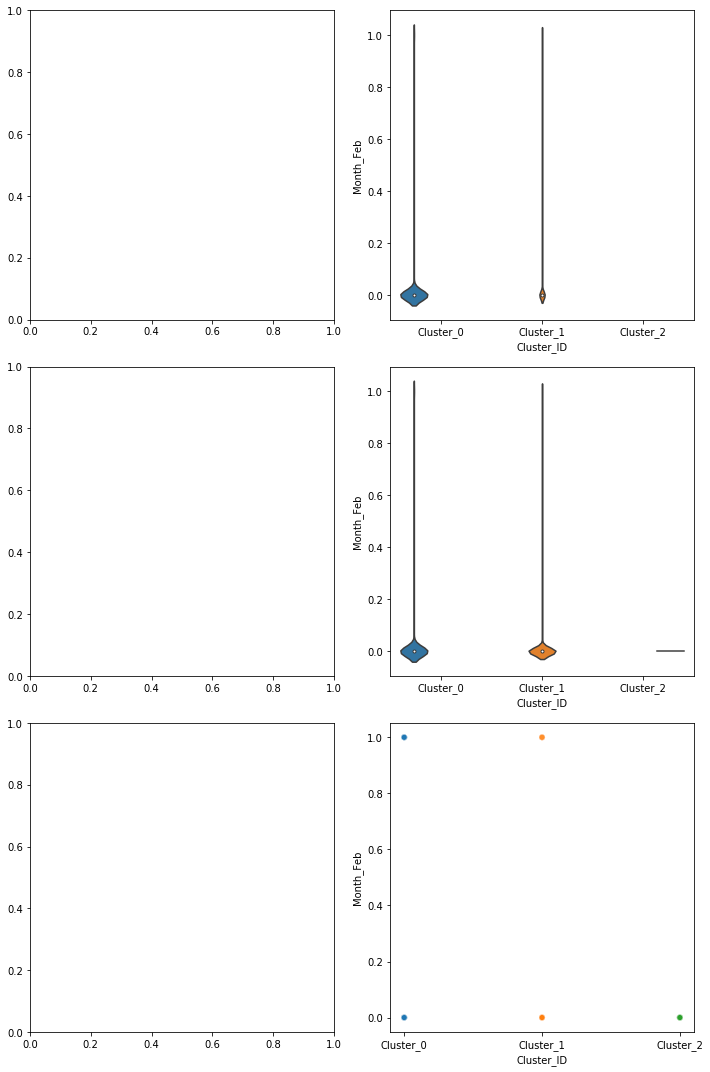

=========================== Month_Jul ( uint8 ) ===========================


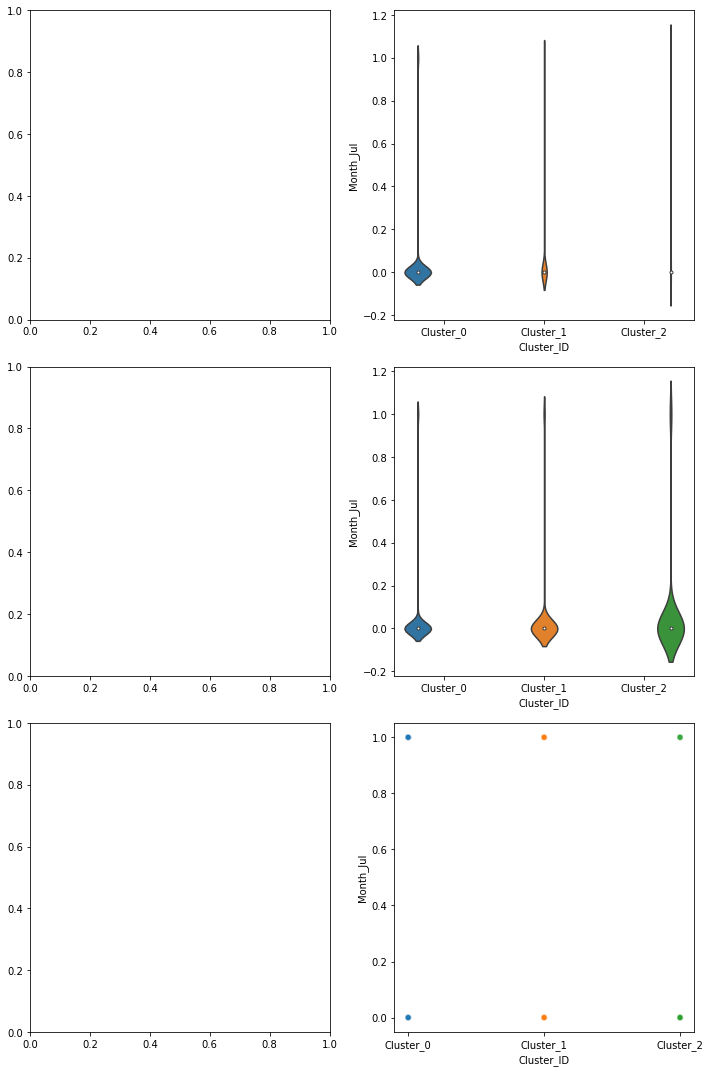

=========================== Month_June ( uint8 ) ===========================


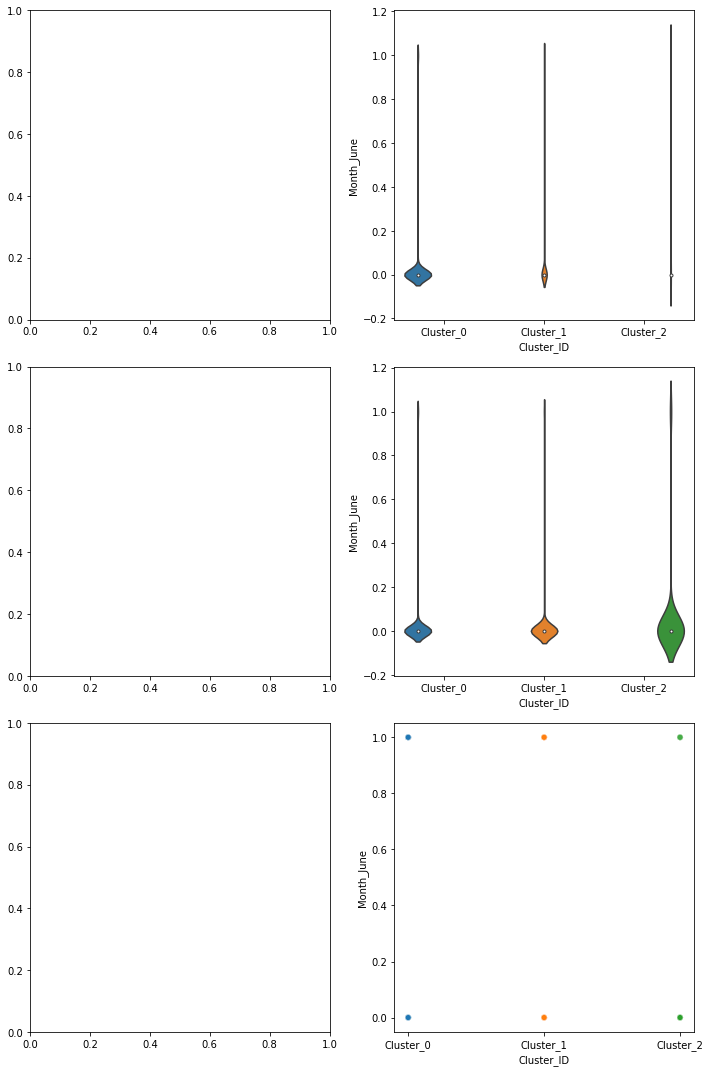

=========================== Month_Mar ( uint8 ) ===========================


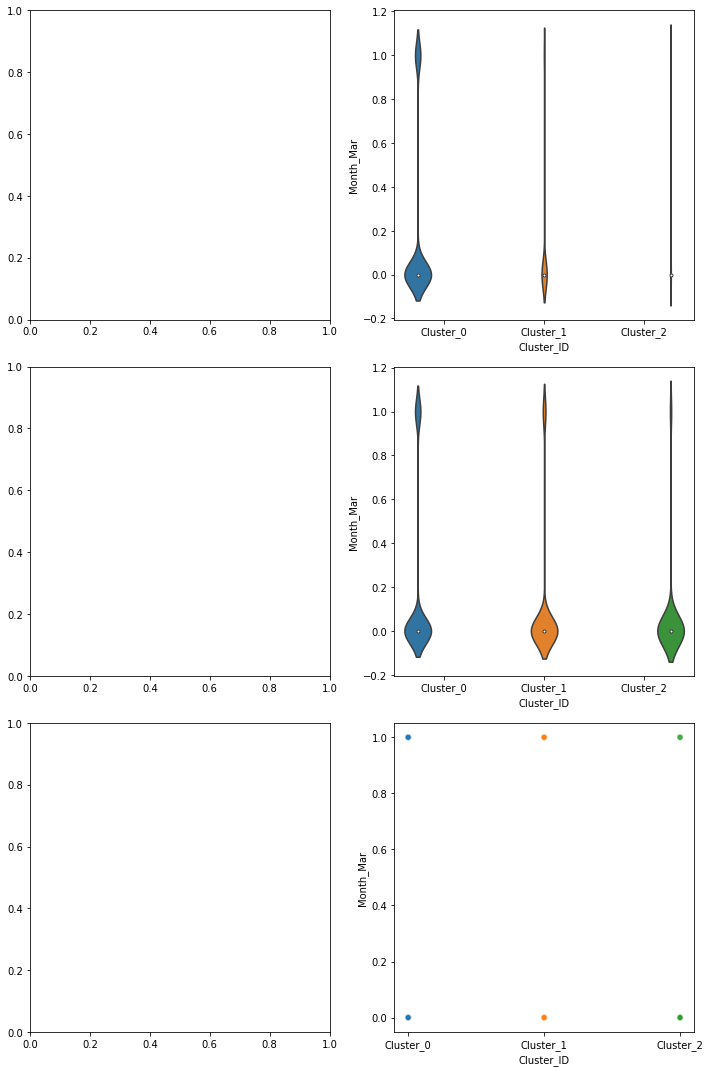

=========================== Month_May ( uint8 ) ===========================


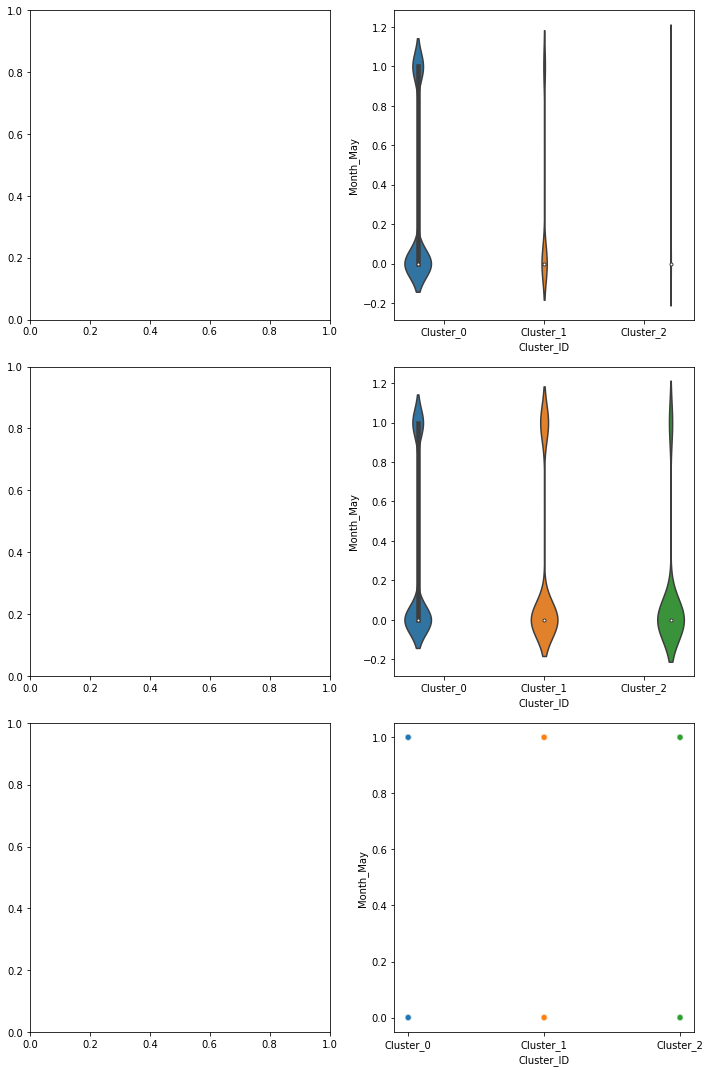

=========================== Month_Nov ( uint8 ) ===========================


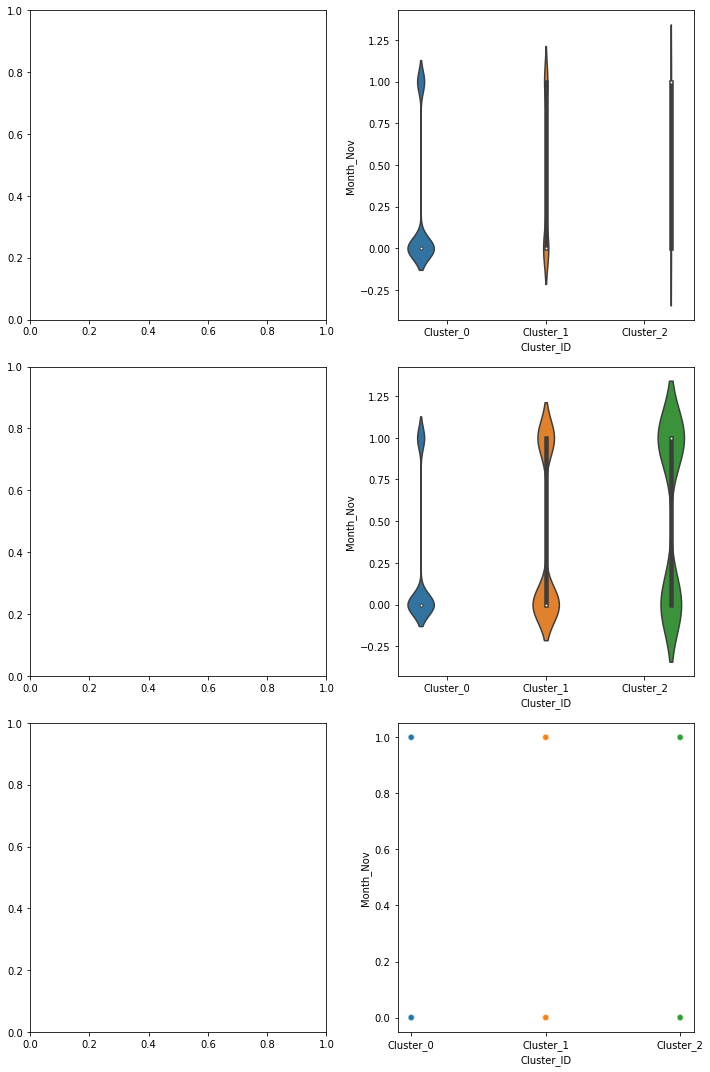

=========================== Month_Oct ( uint8 ) ===========================


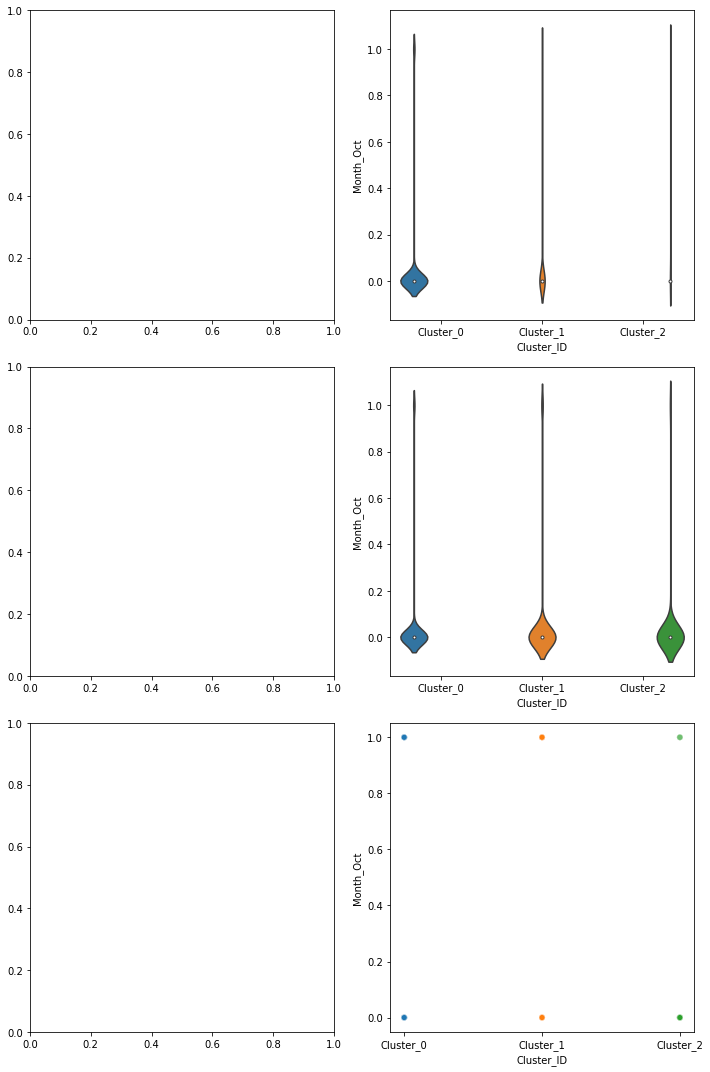

=========================== Month_Sep ( uint8 ) ===========================


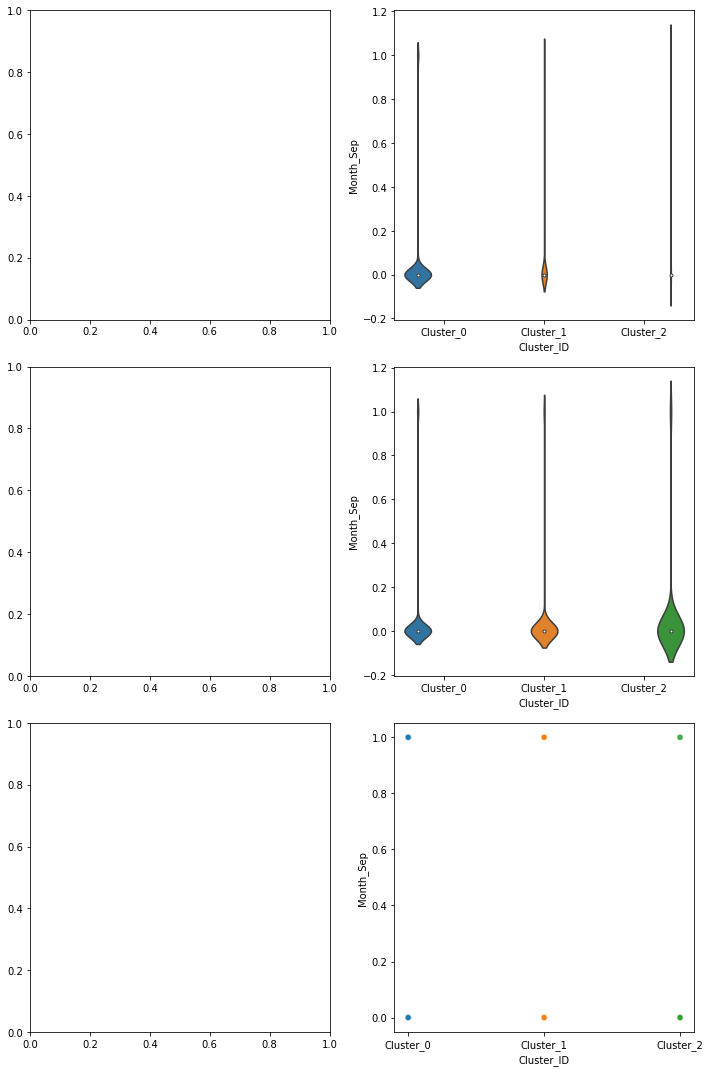

=========================== VisitorType_New_Visitor ( uint8 ) ===========================


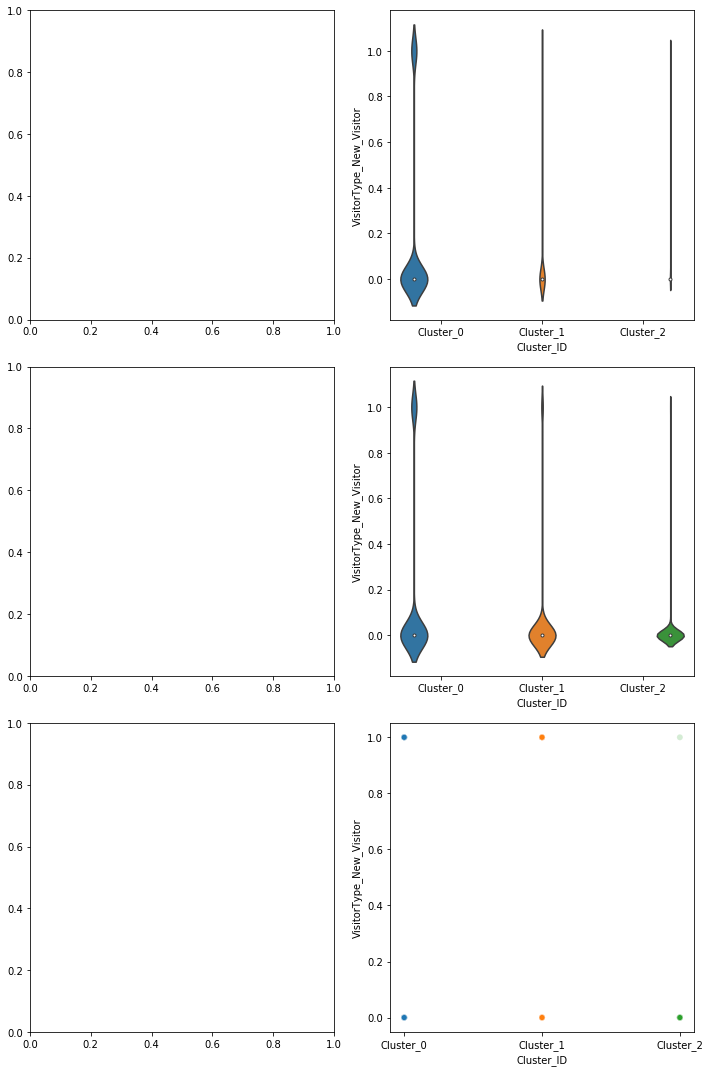

=========================== VisitorType_Other ( uint8 ) ===========================


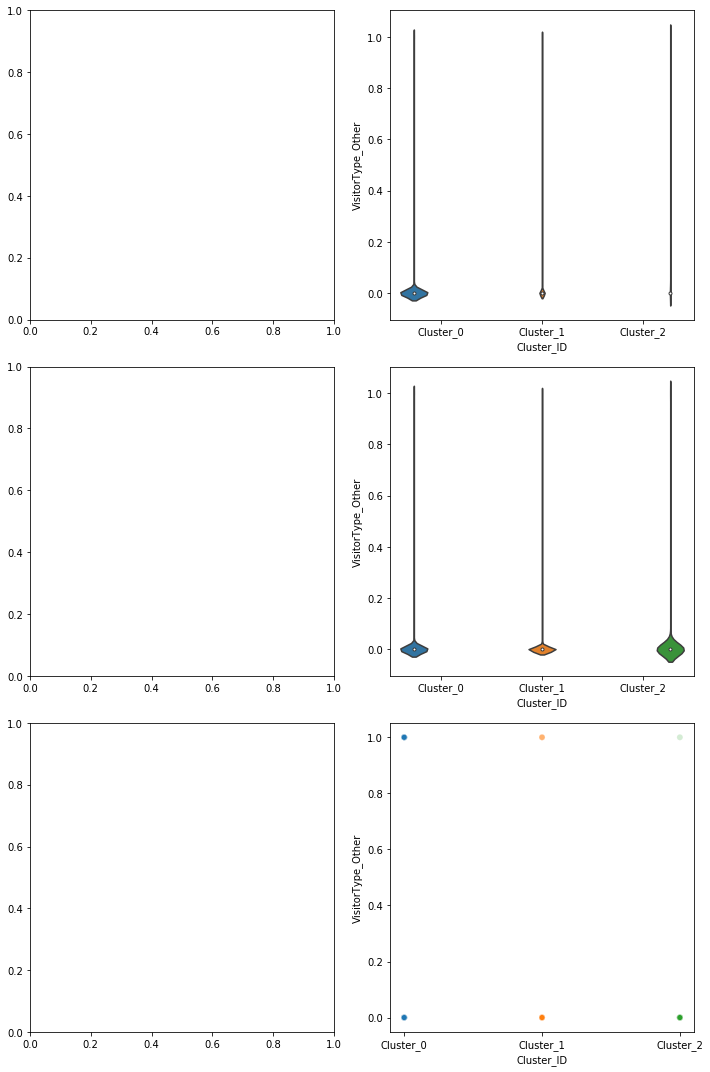

=========================== VisitorType_Returning_Visitor ( uint8 ) ===========================


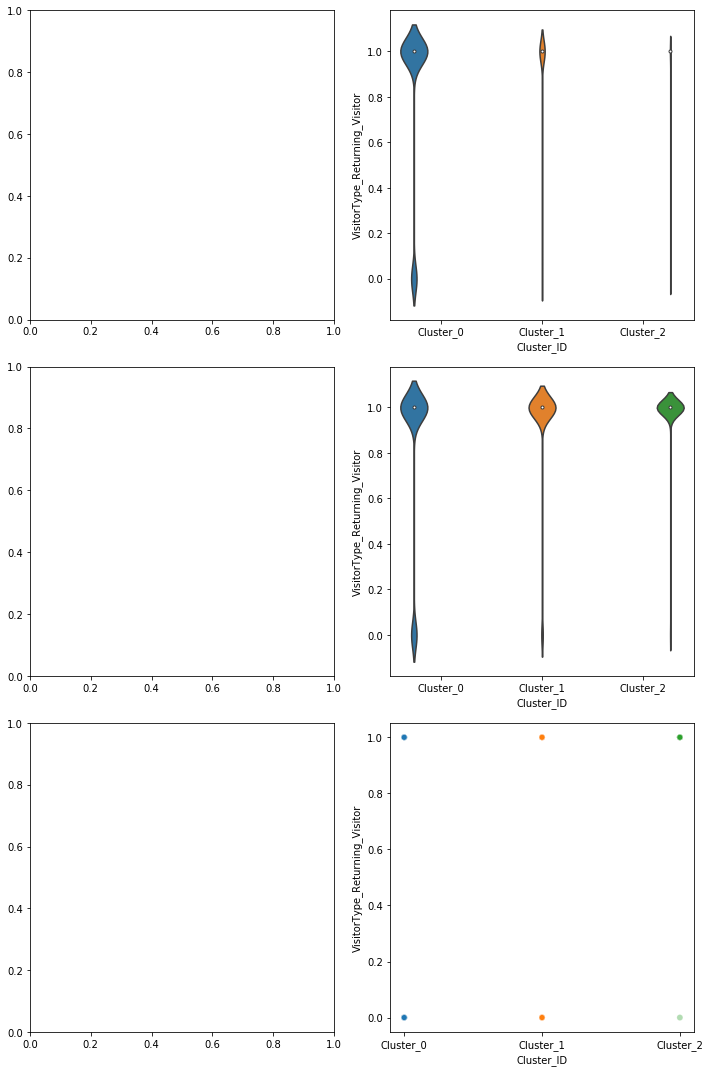

In [45]:
# In the first row the width of the voilin represent the count. And, in the second row, the width is the density.
df_1_WithID, df_2_WithID = CompareVisualization(taskTwoDf, clusters[1], taskThreeDf, refinedClusters[1], taskThreeDf.columns )

In [35]:
sum(df_1_WithID['Cluster_ID'] != df_2_WithID['Cluster_ID'])
# The cluster 1 is the same as cluster 2 

0

### b. Whether this model has different variable importance than the previous model (Task 2.1)? 



From the above volin plot and the Cluster_ID, we found that the cluster result didn't change at all. However, some other features are introduced into the model, which can help the model to seperate the instances. Administrative, Informational, ProductRelated, BounceRates, ExitRates, PageValues, Month_Feb, Month_May Month_Nov and VisitorType are important variables that can help the clustering model to seperate the instances to three different groups. However, some features do not provide meaningful information, such as SpecialDay, OperatingSystems, Browser, Region, TrafficType, Weekend, Revenue. This kind of feature has similar violin shapes in a feature. And the difference among three clusters in these features is only the size. Since the cluster_2 has a larger cluster size, it usually has a larger violin shape. 



### c. Explain the cluster results

In [36]:
displayClusterResult(refinedClusters[1])

The k = 3 clustering model seperate all the observations to 3 clusters. Cluster 2 is the largest cluster, which consists of  10101 objects. And the the Cluster 1 is the samllest cluster, which only own  207  objects. And the centroids of these three clusters are located at [4.32506329e+00 1.54877478e+02 1.17417722e+00 8.46726198e+01
 7.77296203e+01 3.35510746e+03 7.12823371e-03 2.16705571e-02
 8.01363406e+00 5.07341772e-02 2.13620253e+00 2.31037975e+00
 3.09417722e+00 3.71037975e+00 2.19240506e-01 2.51139241e-01
 3.34177215e-02 1.25063291e-01 4.55696203e-03 3.64556962e-02
 1.67088608e-02 9.16455696e-02 2.27341772e-01 3.85822785e-01
 4.75949367e-02 3.13924051e-02 4.81012658e-02 2.02531646e-03
 9.49873418e-01] , [ 7.43961353e+00  2.95364891e+02  2.74879227e+00  2.66723094e+02
  2.36106280e+02  1.08861744e+04  5.93975560e-03  1.96883098e-02
  4.52137028e+00  3.09178744e-02  2.14975845e+00  2.30917874e+00
  2.58454106e+00  3.61835749e+00  2.51207729e-01  3.38164251e-01
  3.86473430e-02  8.

## 2. What is the effect of using the standardization method on the model above? Does the variable normalization process enable a better clustering solution?

/home/chihcheng/python3env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/chihcheng/python3env/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


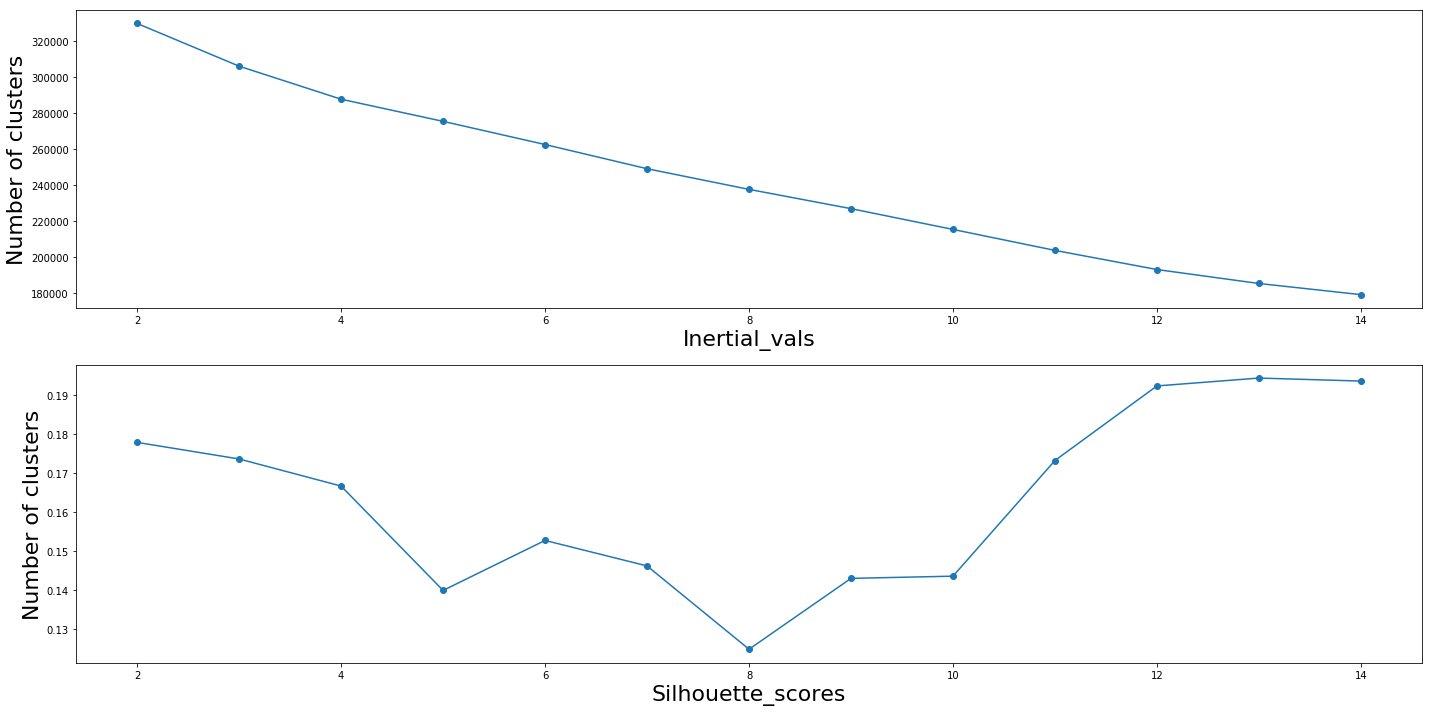

In [37]:
scaler = StandardScaler()
taskThreeDf_Standardised = scaler.fit_transform(taskThreeDf)
taskThreeDf_Standardised = pd.DataFrame(taskThreeDf_Standardised, columns= taskThreeDf.columns)

refinedClusters_Standardised = ElbowEffectAndSilhouetteScore(taskThreeDf_Standardised, range(2,15,1))

From the above Elbow effect plot, we can see that the elbow become more unclear. It become very hard to point out the Elbow. However, from the Slihouette scores, the score drop dramatically at the k = 5. Therefore, this may affect the decsion of k. The k = 4 may be a better choice in this stadardised case.

(1) Value counts: 
 2    10101
0     1975
1      207
Name: Cluster_ID, dtype: int64
(2) Value counts: 
 0    8675
2    1840
1    1768
Name: Cluster_ID, dtype: int64
=========================== Administrative ( float64 ) ===========================


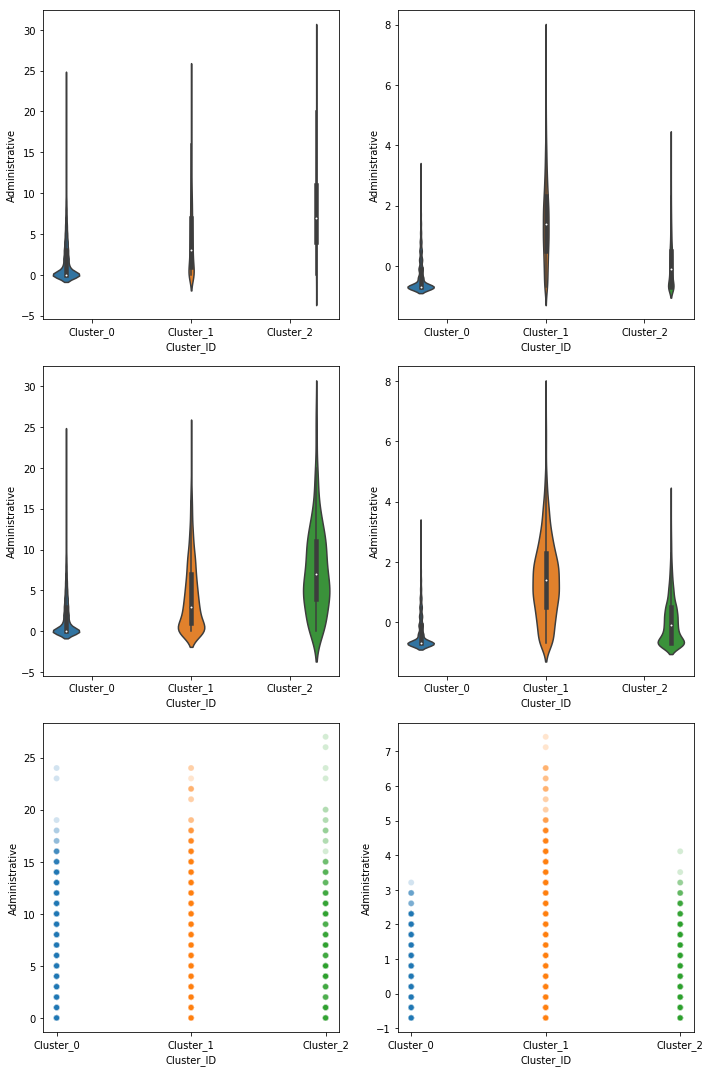

=========================== Administrative_Duration ( float64 ) ===========================


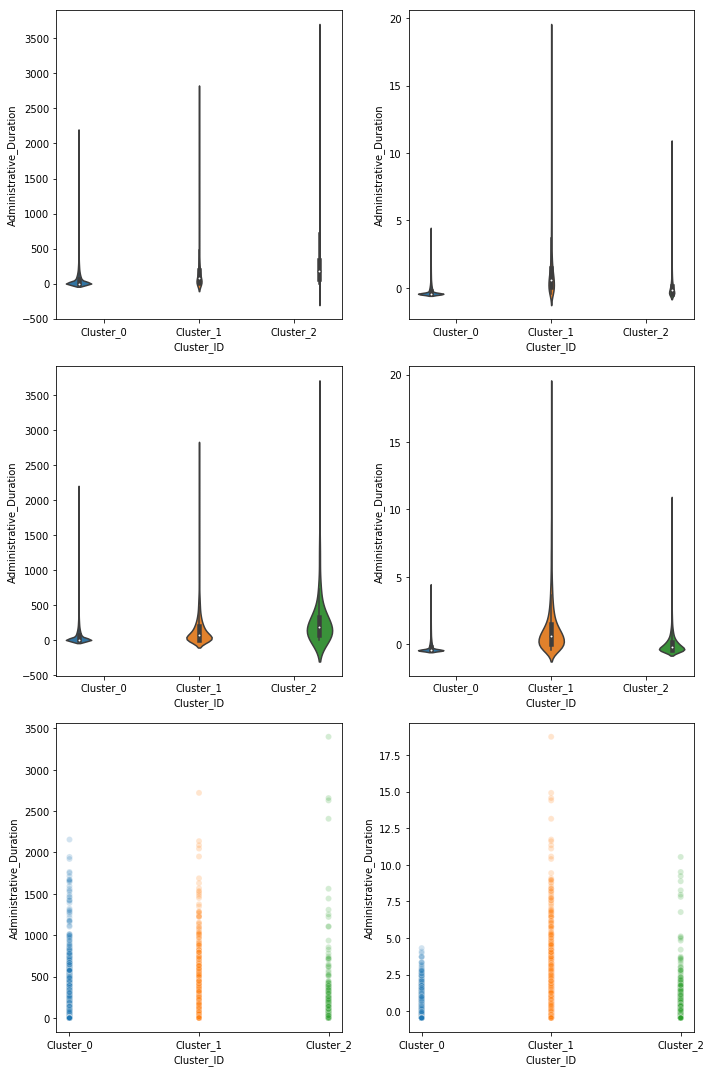

=========================== Informational ( float64 ) ===========================


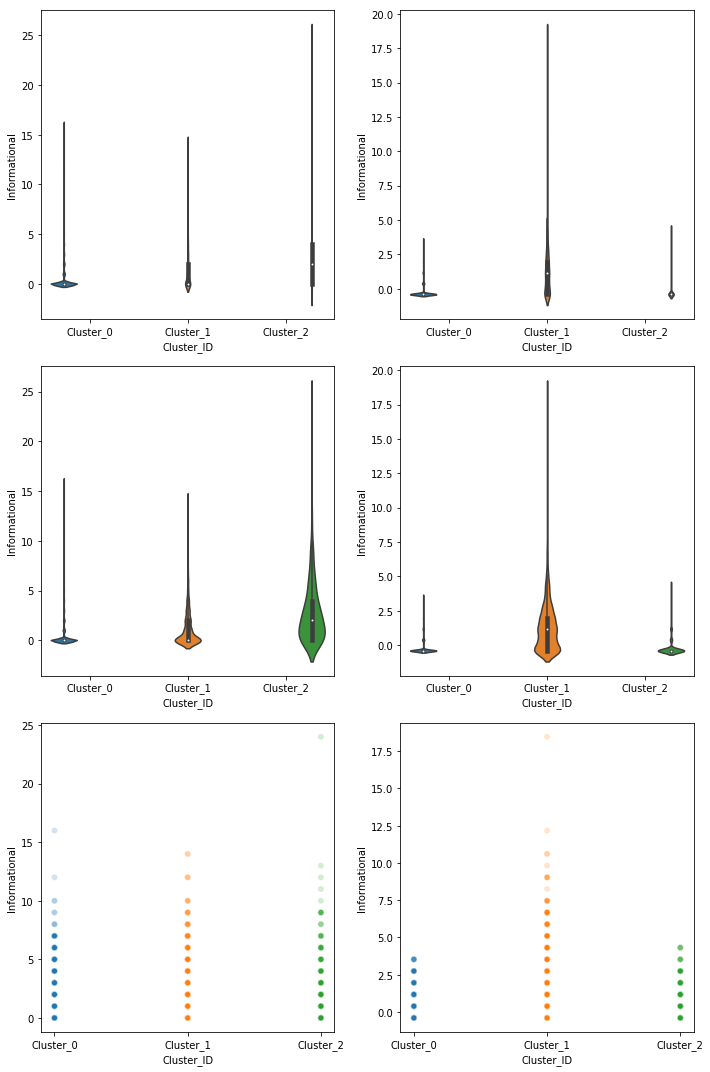

=========================== Informational_Duration ( float64 ) ===========================


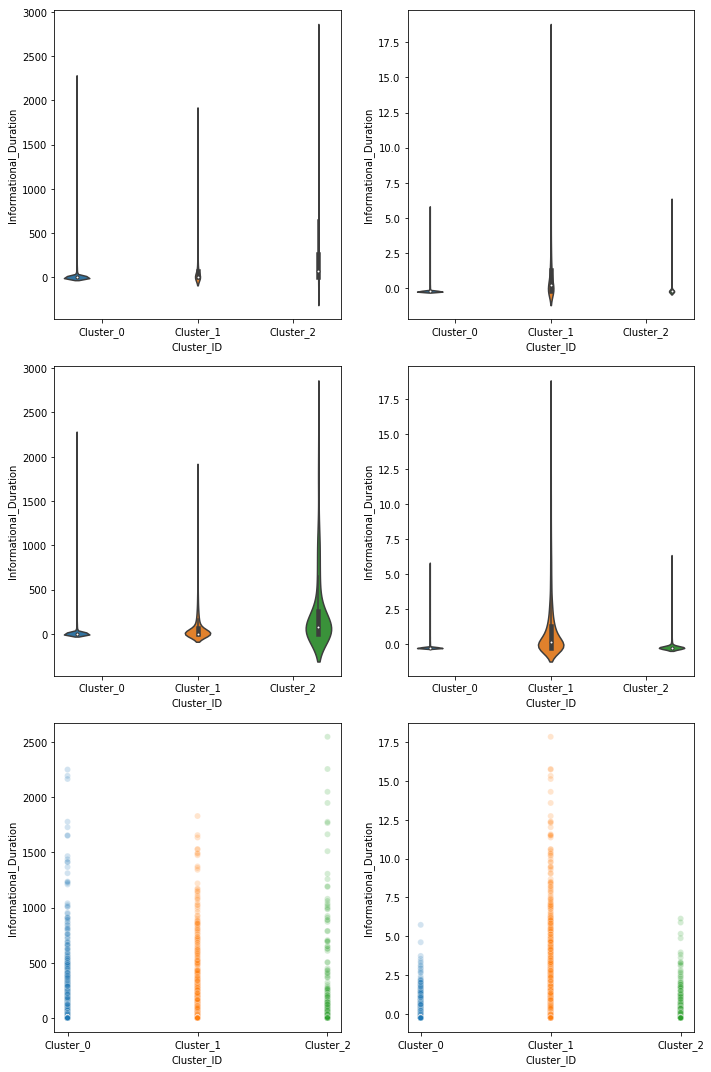

=========================== ProductRelated ( float64 ) ===========================


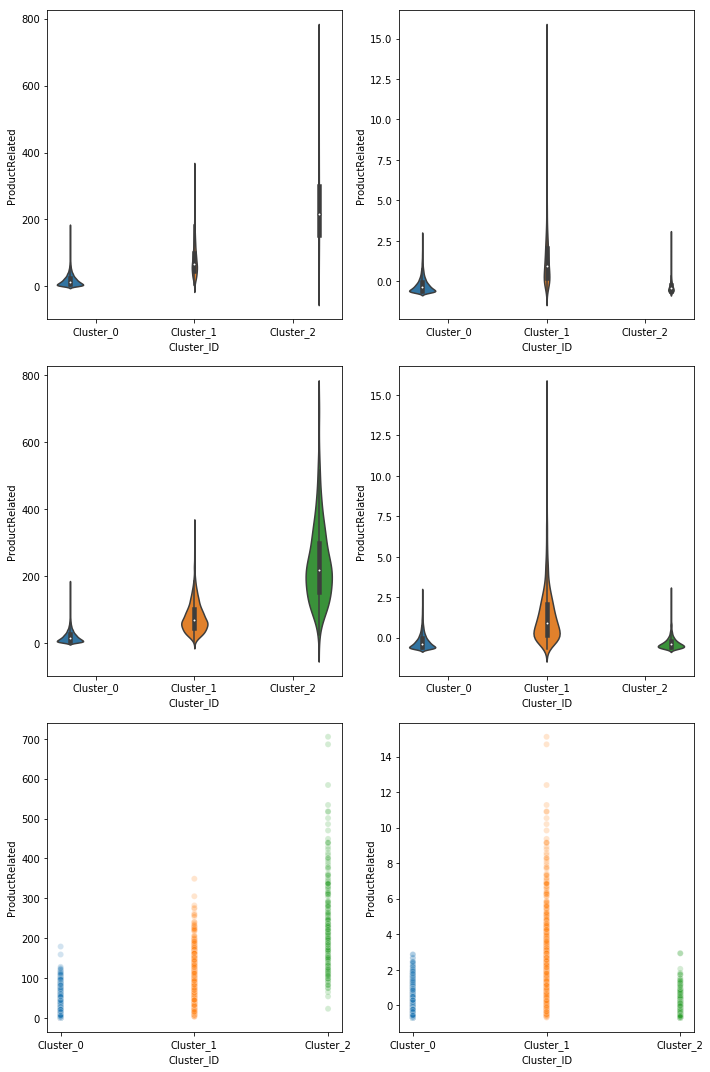

=========================== ProductRelated_Duration ( float64 ) ===========================


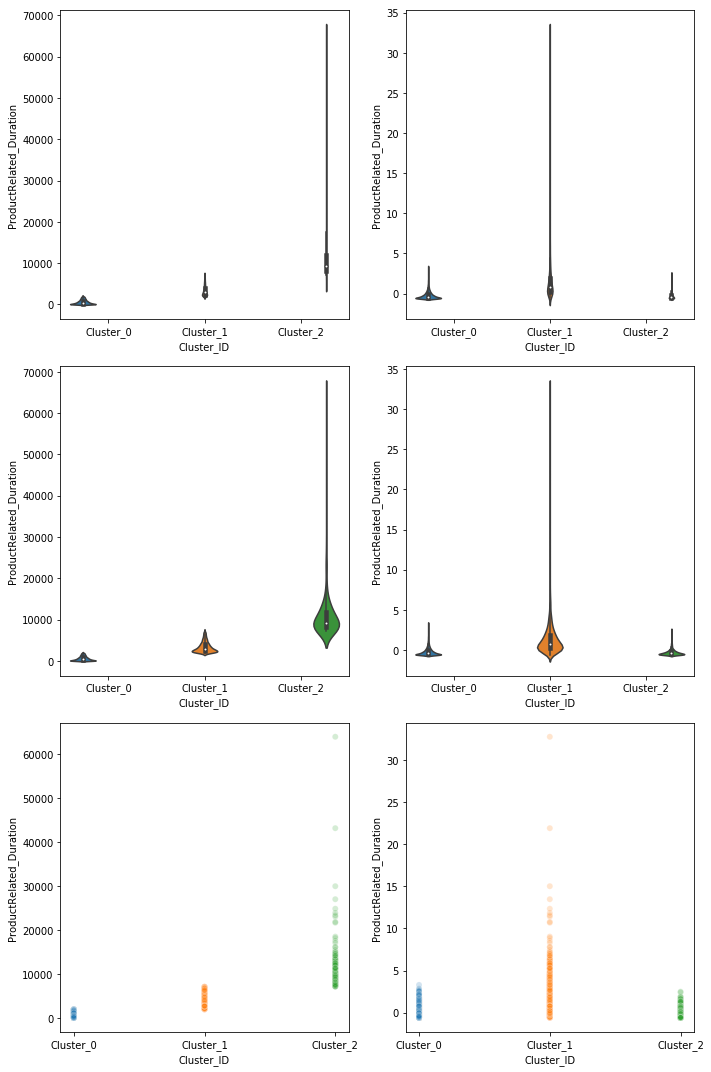

=========================== BounceRates ( float64 ) ===========================


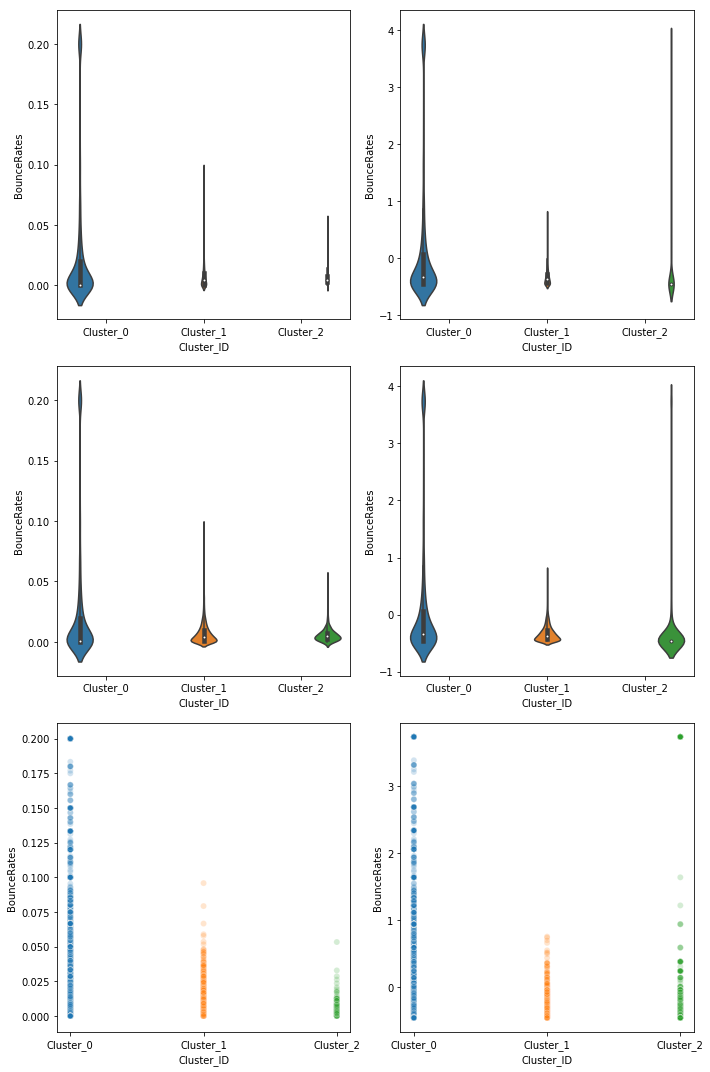

=========================== ExitRates ( float64 ) ===========================


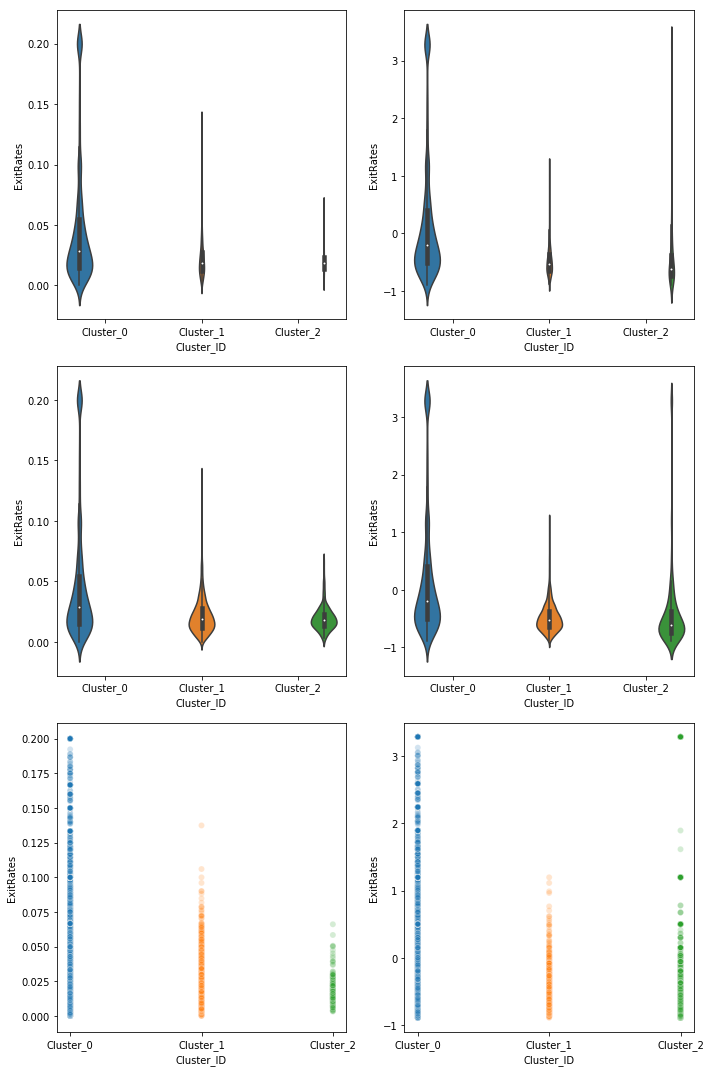

=========================== PageValues ( float64 ) ===========================


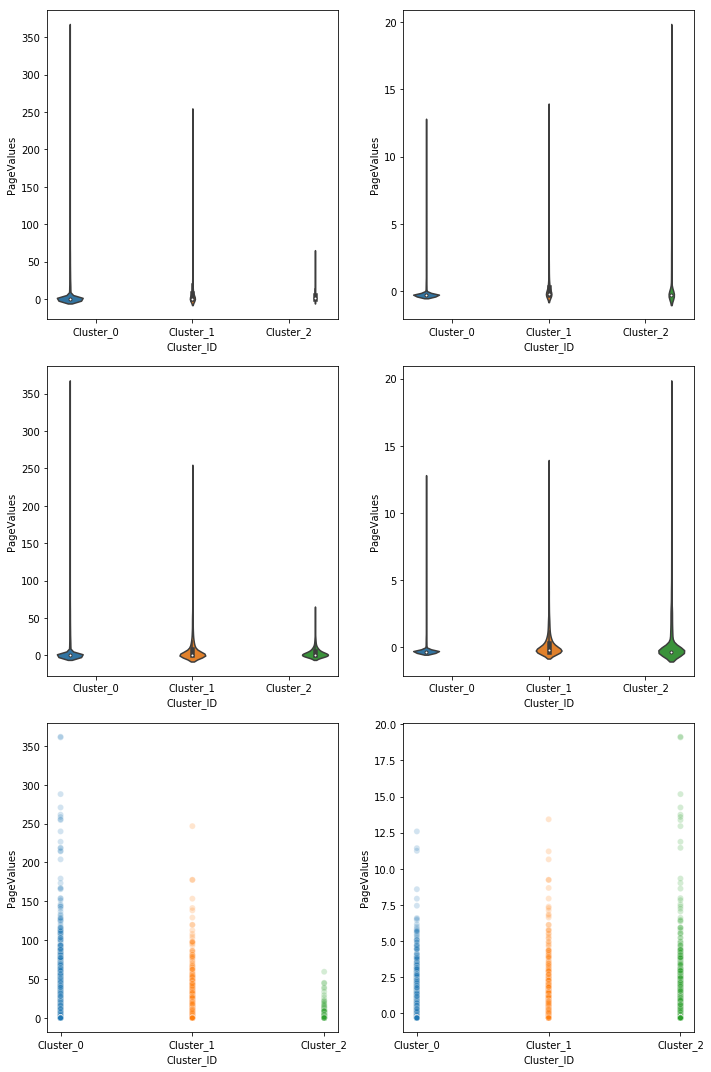

=========================== SpecialDay ( float64 ) ===========================


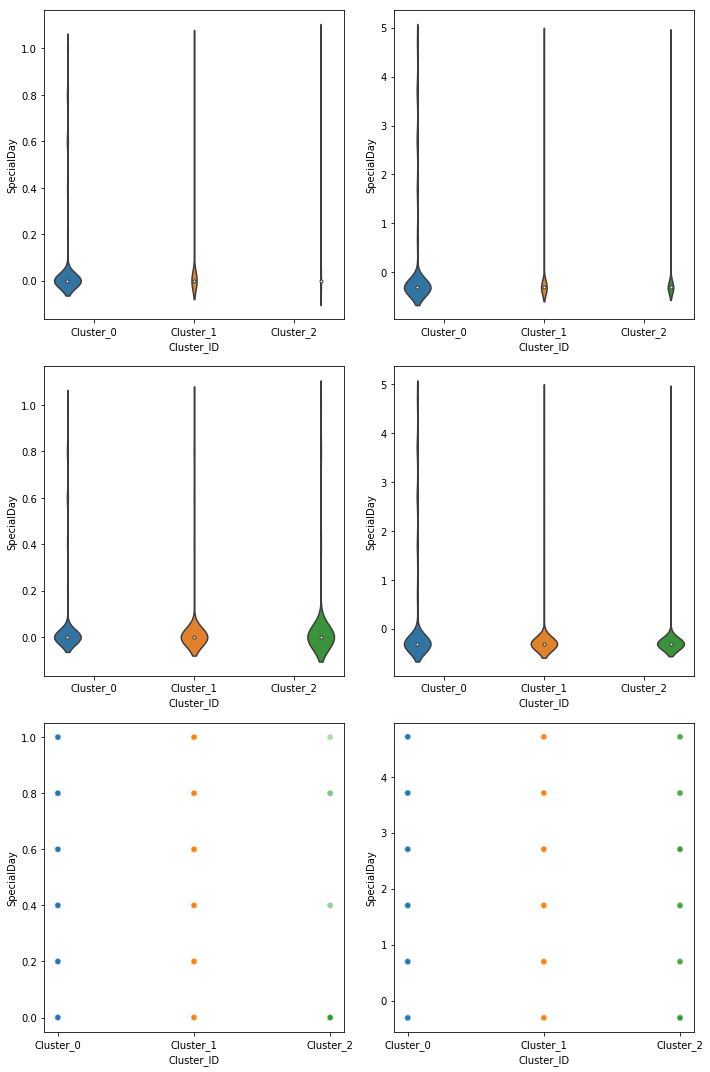

=========================== OperatingSystems ( int64 ) ===========================


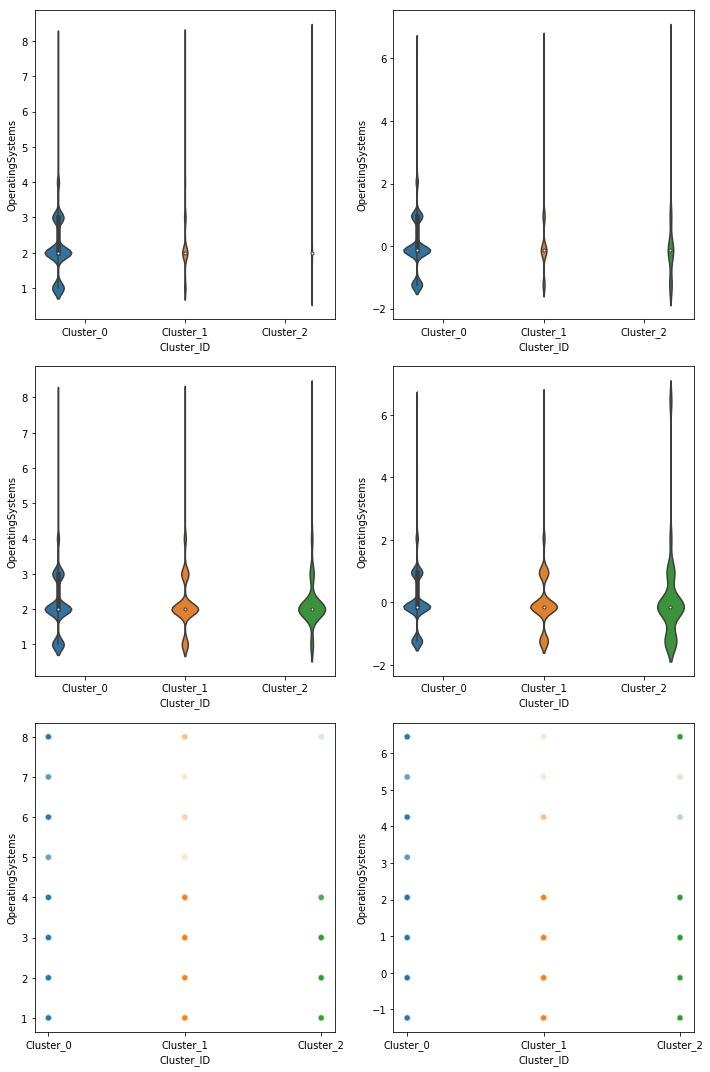

=========================== Browser ( int64 ) ===========================


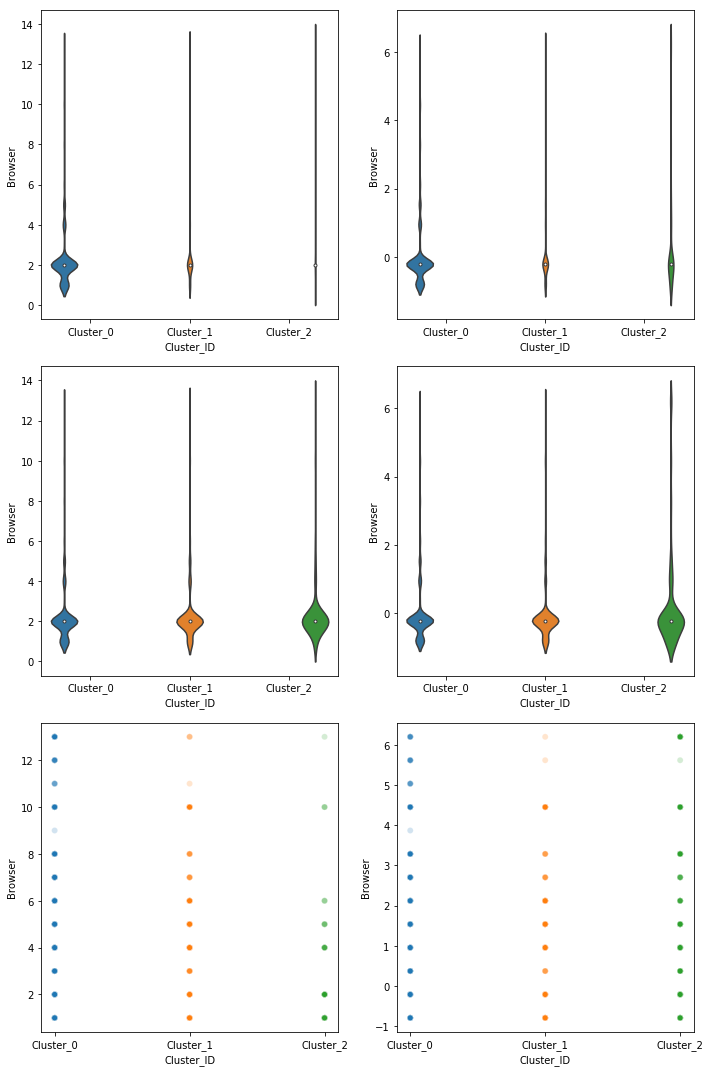

=========================== Region ( int64 ) ===========================


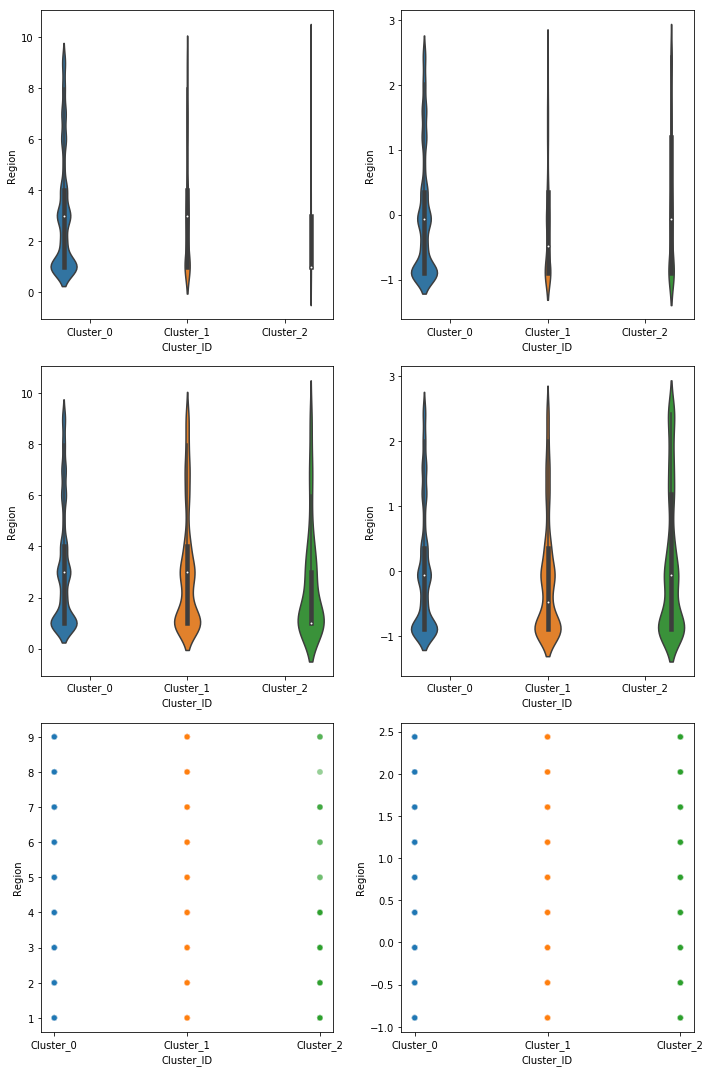

=========================== TrafficType ( int64 ) ===========================


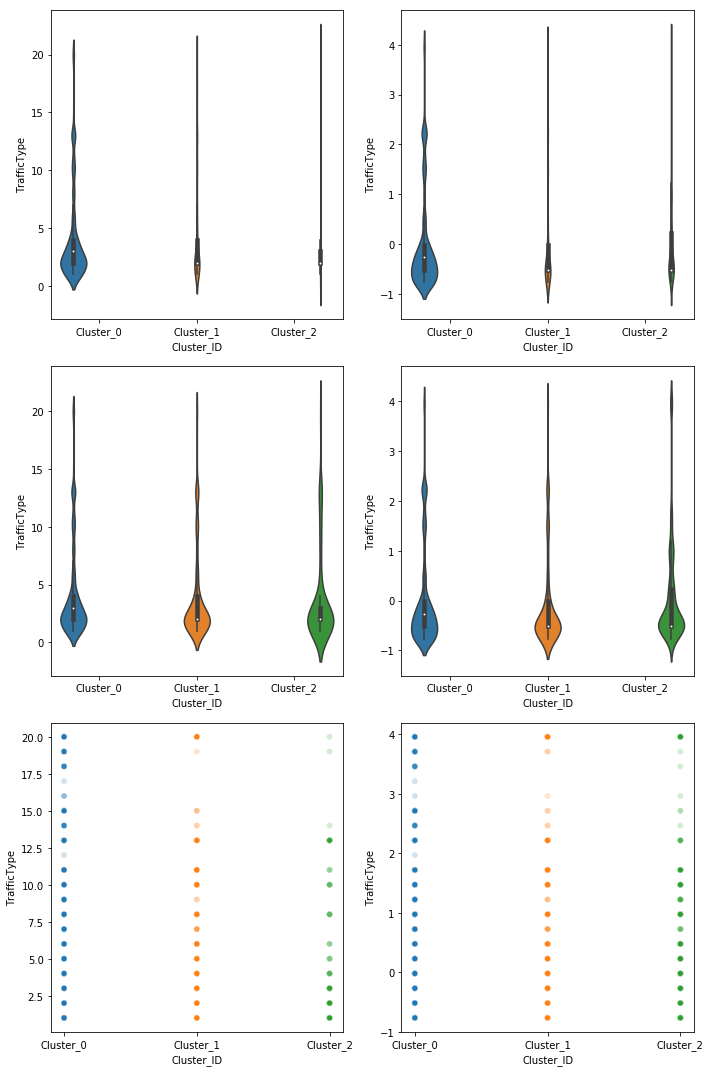

=========================== Weekend ( uint8 ) ===========================


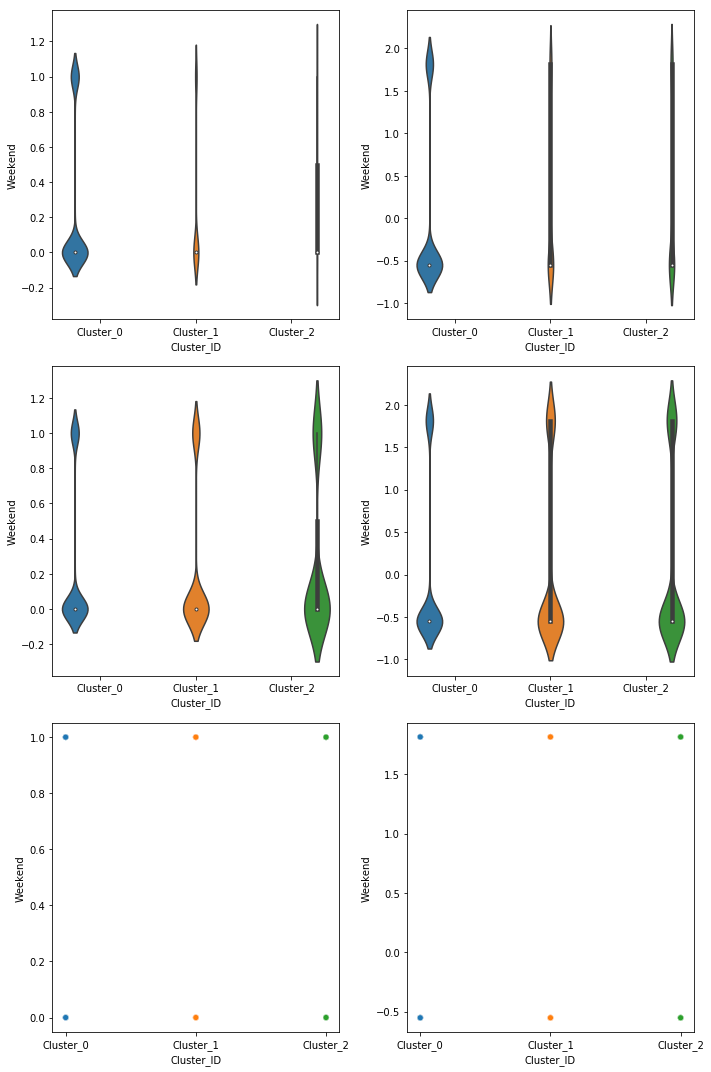

=========================== Revenue ( uint8 ) ===========================


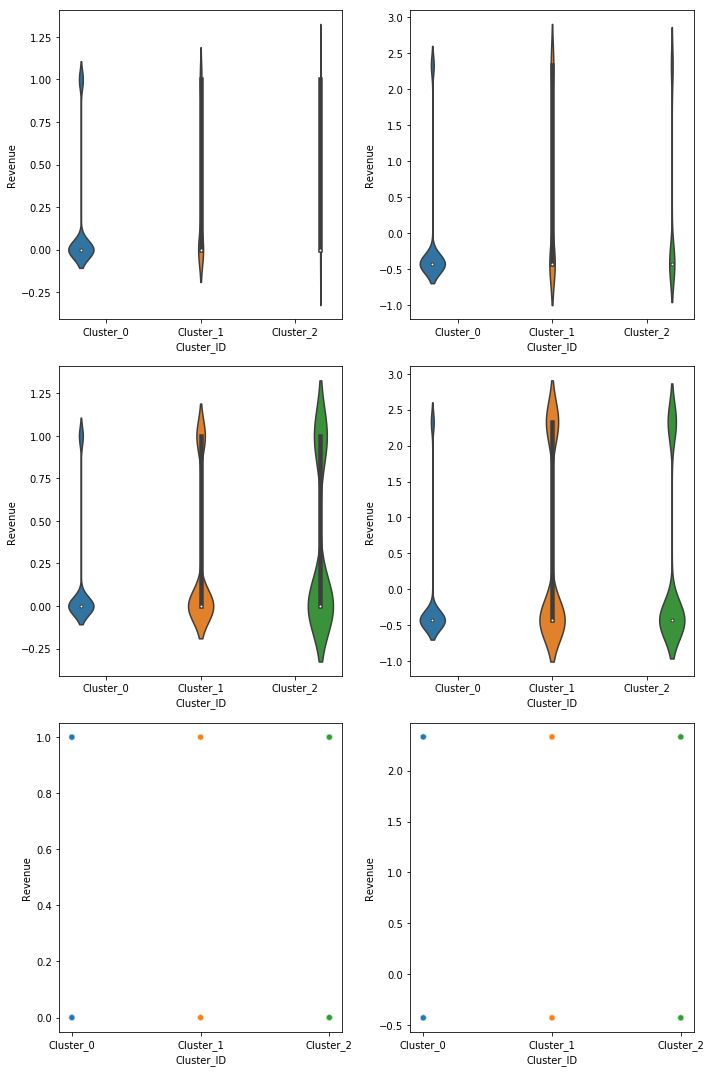

=========================== Month_Aug ( uint8 ) ===========================


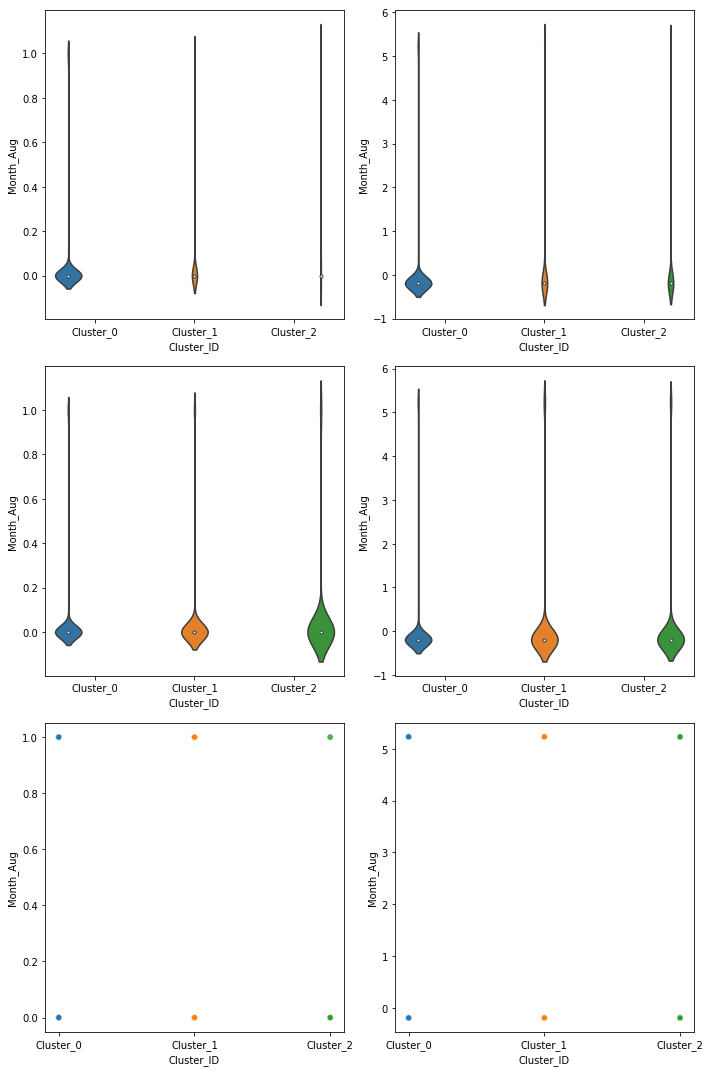

=========================== Month_Dec ( uint8 ) ===========================


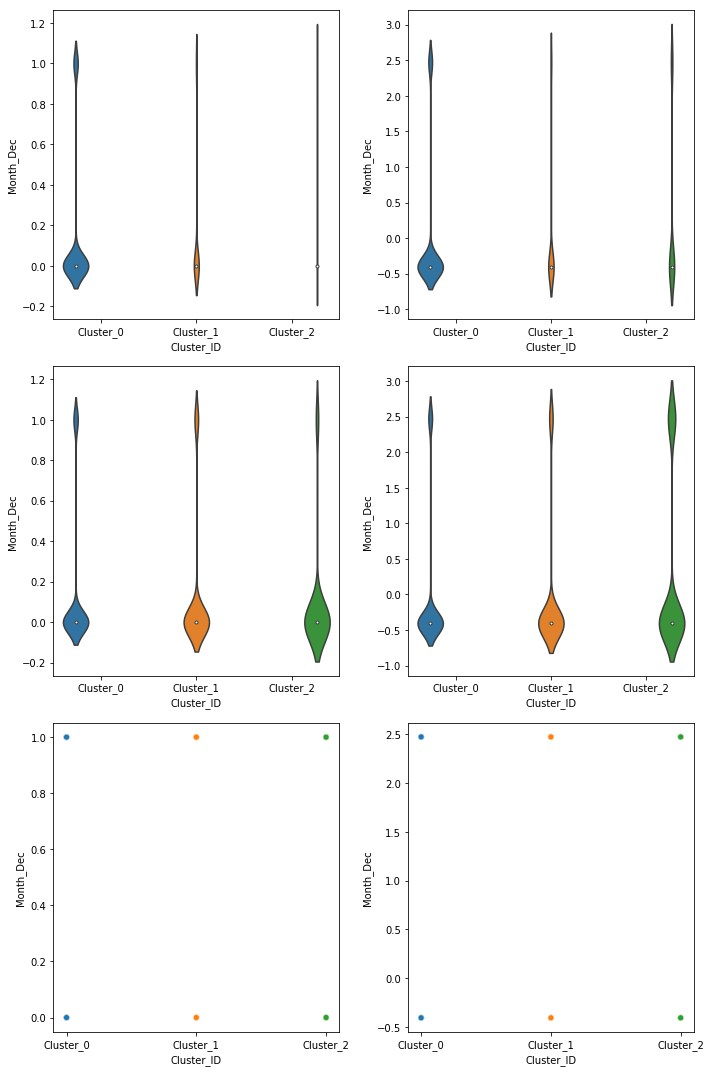

=========================== Month_Feb ( uint8 ) ===========================


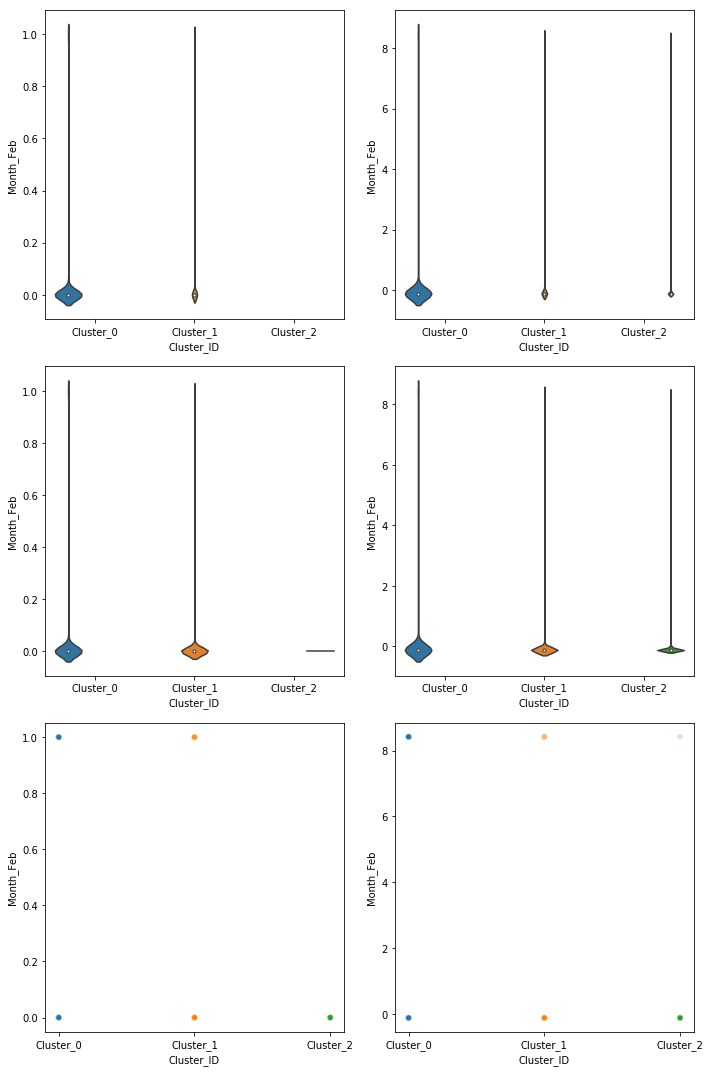

=========================== Month_Jul ( uint8 ) ===========================


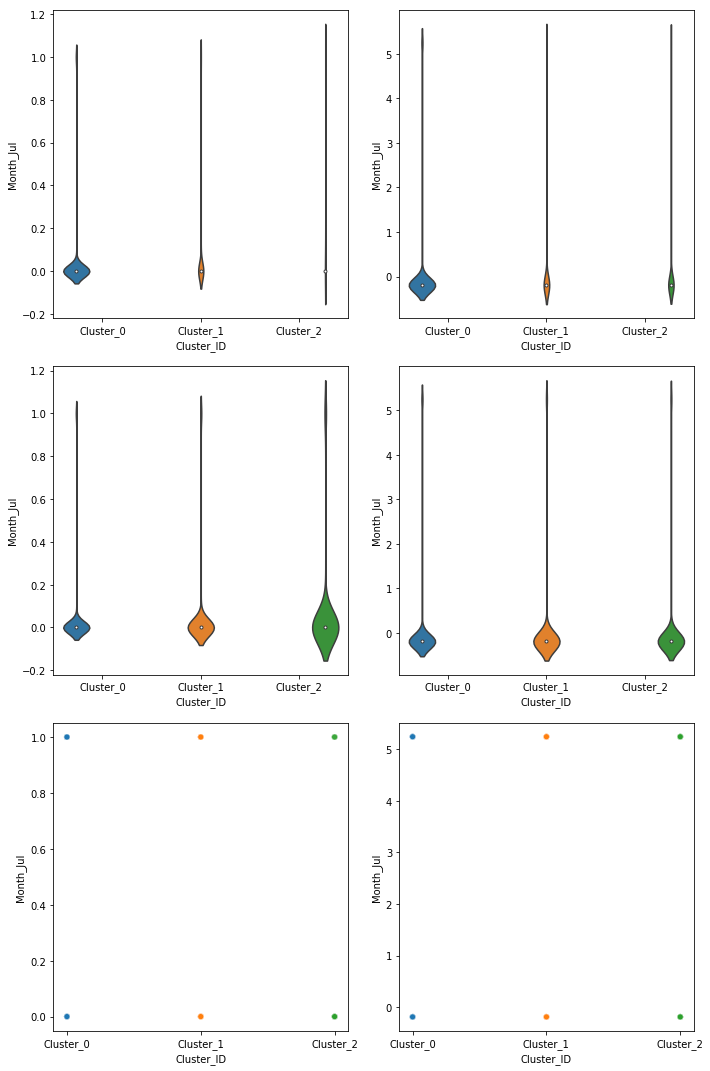

=========================== Month_June ( uint8 ) ===========================


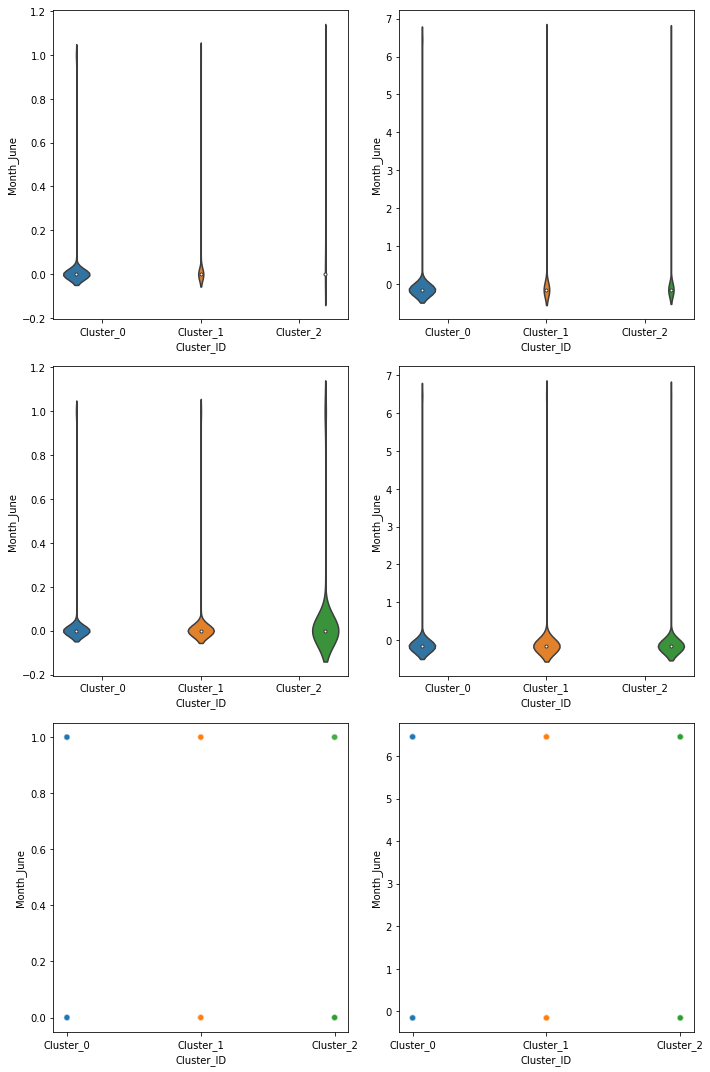

=========================== Month_Mar ( uint8 ) ===========================


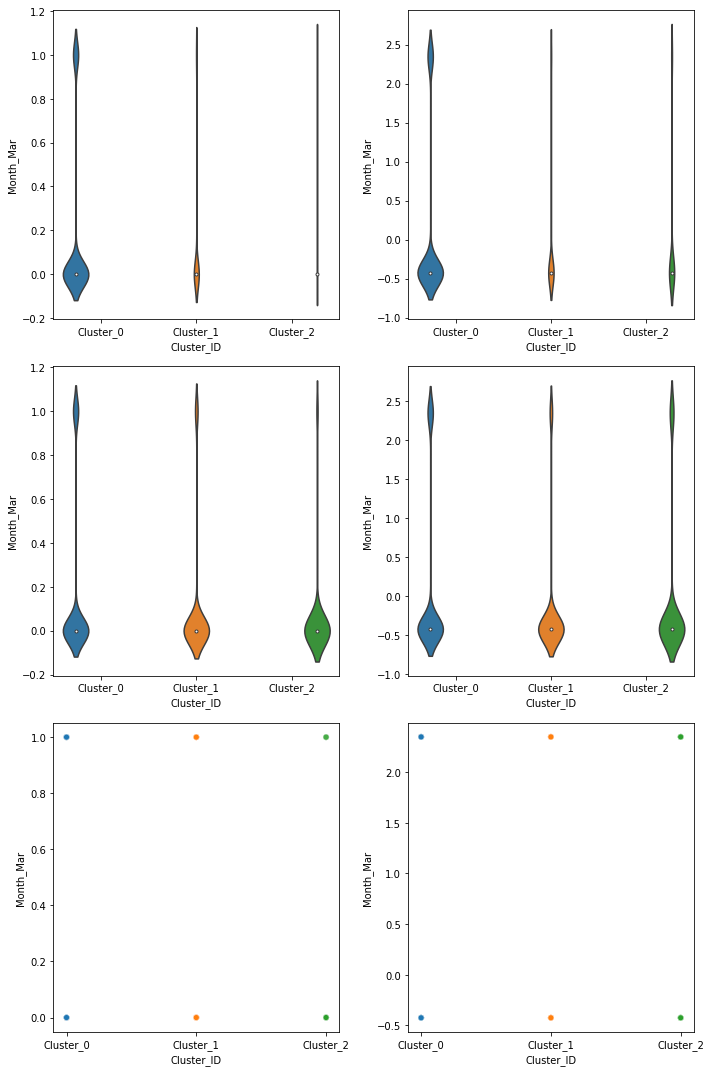

=========================== Month_May ( uint8 ) ===========================


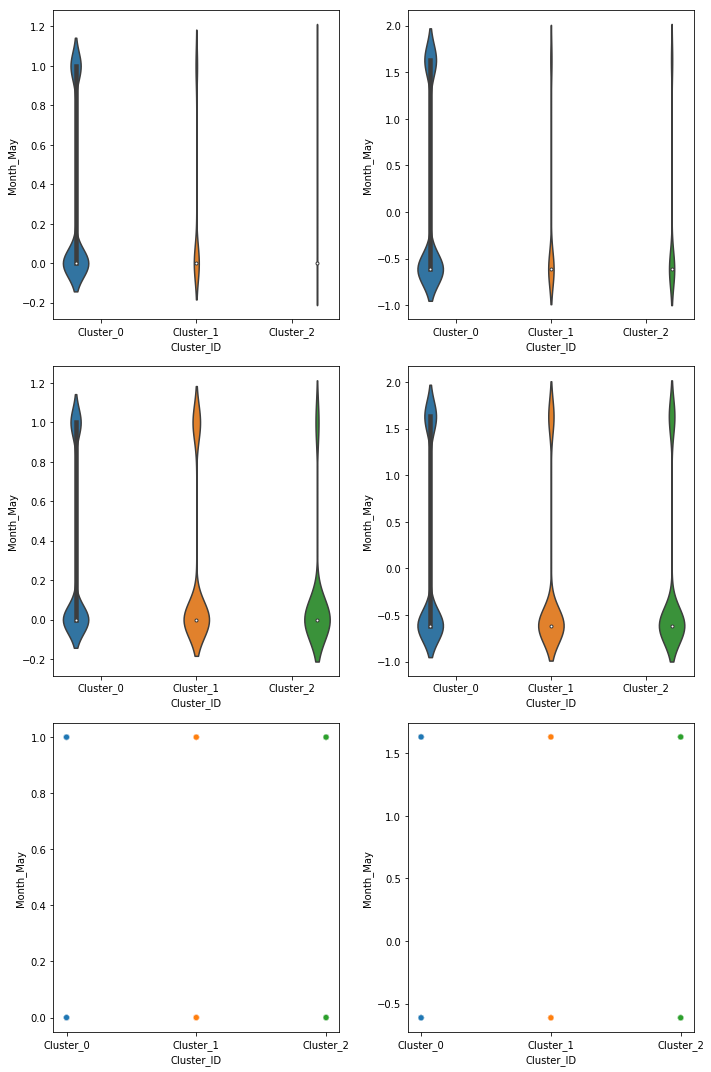

=========================== Month_Nov ( uint8 ) ===========================


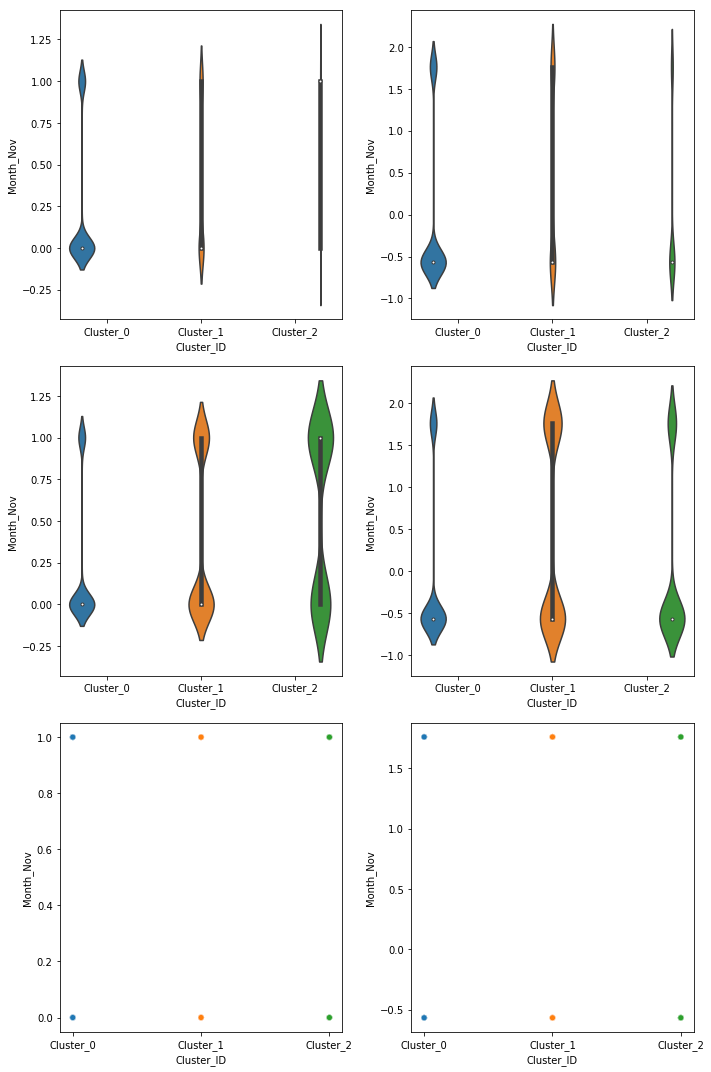

=========================== Month_Oct ( uint8 ) ===========================


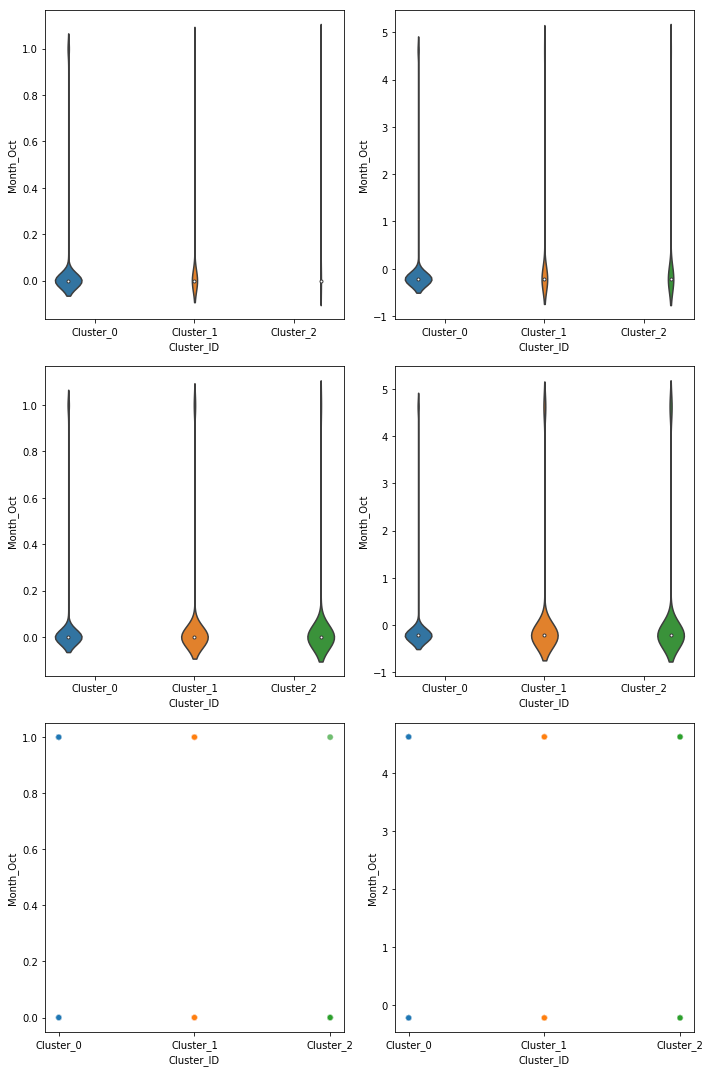

=========================== Month_Sep ( uint8 ) ===========================


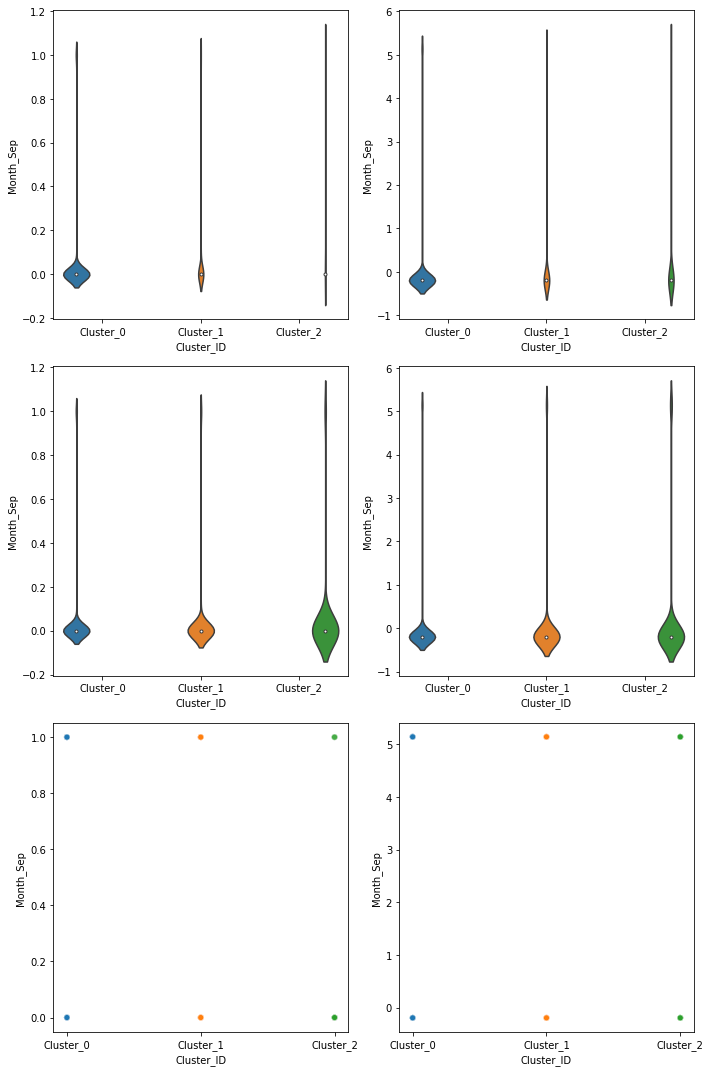

=========================== VisitorType_New_Visitor ( uint8 ) ===========================


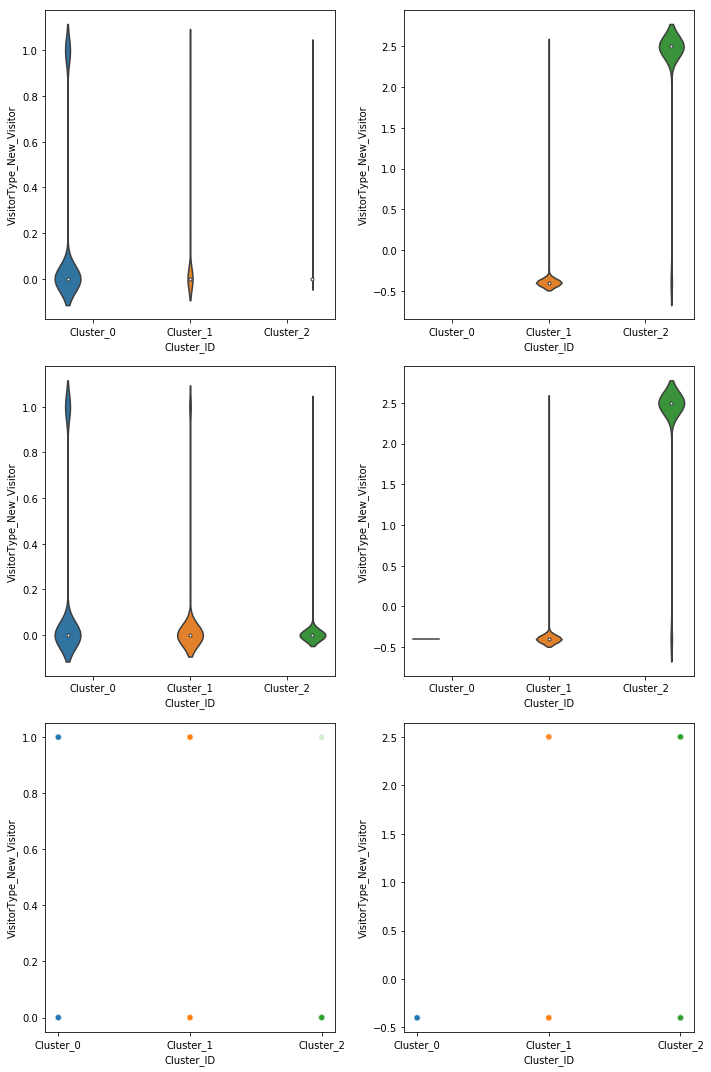

=========================== VisitorType_Other ( uint8 ) ===========================


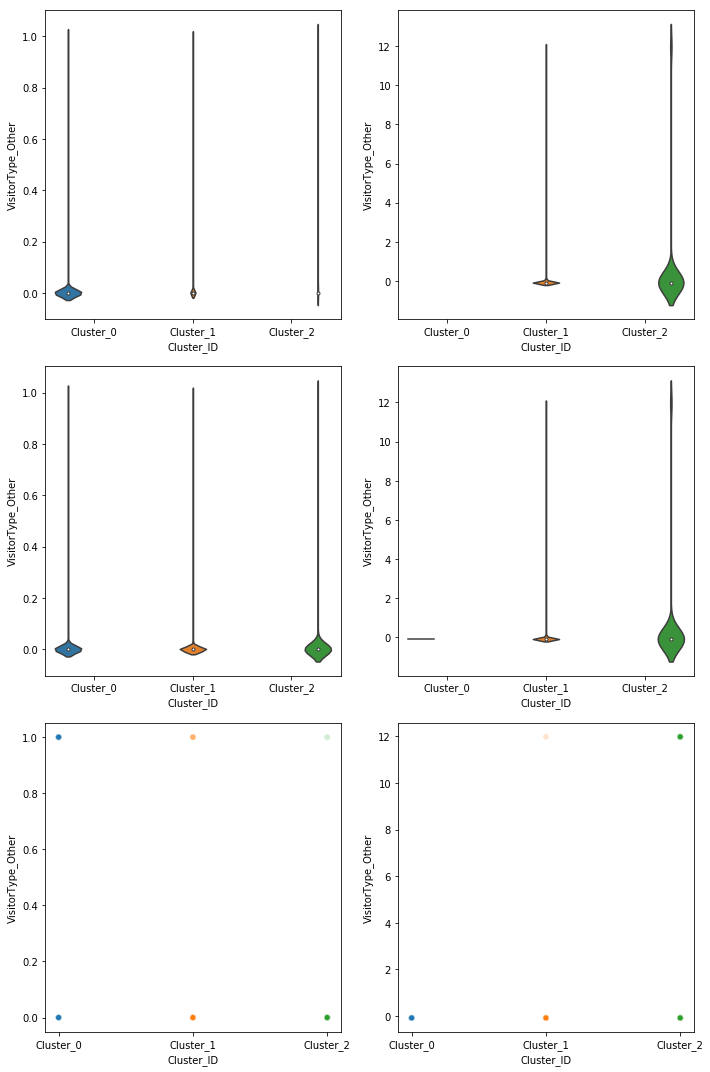

=========================== VisitorType_Returning_Visitor ( uint8 ) ===========================


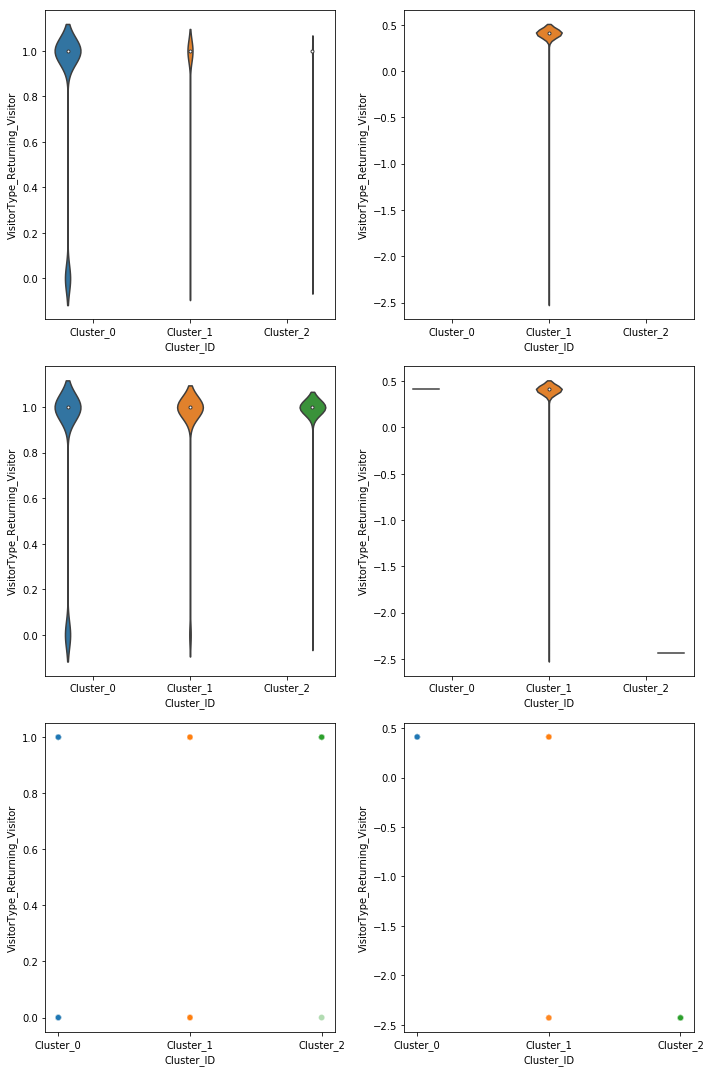

(       Administrative  Administrative_Duration  Informational  \
 0                 0.0                 0.000000            0.0   
 1                 0.0                 0.000000            0.0   
 3                 0.0                 0.000000            0.0   
 4                 0.0                 0.000000            0.0   
 5                 0.0                 0.000000            0.0   
 8                 0.0                 0.000000            0.0   
 9                 0.0                 0.000000            0.0   
 10                0.0                 0.000000            0.0   
 11                0.0                 0.000000            0.0   
 12                0.0                 0.000000            0.0   
 13                0.0                 0.000000            0.0   
 14                0.0                 0.000000            0.0   
 15                2.0                53.000000            0.0   
 17                0.0                 0.000000            0.0   
 18       

In [46]:
CompareVisualization(taskThreeDf, refinedClusters[1], taskThreeDf_Standardised, refinedClusters_Standardised[1], taskThreeDf.columns)

From the above value counts, we can find the standardised model doesn't have a small cluster that less than 1000 instances. And the number of objects in the largest cluster is smaller than the largest cluster in normal model. From the first row of each feature, we can see the largest group Cluster_0. And, the violin shape of Cluster_0 in the original model is similar to the shape of Cluster_0 in the standardised model. Moreover, the shape of Cluster_1 in orginal model is similar to the Cluster_2 in the standardised model. The reason of have a similar shape may be the range of smallest cluster in the orgininal model is extended and include more instances with similar attributes. Therefore, the smallest cluster in the original group become the middle size group in the standardised model. Although the size rank has been changed, the distribution (desity) violin shapes are almost the same.


Q: better cluster result?

From the above violin and scatter plots, we can see the Cluster_0 become more compact.


## 3. Can you highlight the differences between the two clustering solutions (Tasks 2.1 & 3.1) focusing on cluster interpretation? In other words, explain what is the effect of adding other variables in the clustering analysis?

In [47]:
sum(df_1_WithID['Cluster_ID'] != df_2_WithID['Cluster_ID'])
# The cluster 1 is the same as cluster 2 

0

The two clustering results don't have the difference. They have the same Cluster_ID, which means adding more features doesn't change the clustering behaviour in this case. After introducing the new features, we found the three duration variables may still be the most important variables, which can help the model to classify the instances.

# Decision Making: Finally, could you detail - how the outcome of clustering analysis can be used by decision makers?

We can use the Revenue label to find out which characteristics may result in a purchasement. Therefore, these clustering models can help the online shops to indentify their target customers. Moreover, the revenue attribute can be removed from the clustering input. Then, we can use the clustering model as a step of feature engineering for a prediction model. For example, we can add a Cluster_ID feature for each instance, then we can introduce the new feature to predict wheather the customer will end with shopping.

# Text Mining

In [58]:
import glob
import string
from nltk.corpus import stopwords as sw
from nltk.corpus import wordnet as wn
from nltk import wordpunct_tokenize
from nltk import WordNetLemmatizer
from nltk import sent_tokenize
from nltk import pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer


path = 'text-files-to-mine/*.txt'
files = glob.glob(path)


allText = []
for name in files:
    with open(name) as f:
        allText.append(f.read()) # .split("\n\n")
        
print('Number of documents: ', len(allText))

Number of documents:  200


In [51]:
lemmatizer = WordNetLemmatizer()
punct = set(string.punctuation)
stopwords = sw.words('english')

def lemmatize(token, tag):
    tag = {
        'N': wn.NOUN,
        'V': wn.VERB,
        'R': wn.ADV,
        'J': wn.ADJ
    }.get(tag[0], wn.NOUN)

    return lemmatizer.lemmatize(token, tag)

def cab_tokenizer(document):
    # initialize token list
    tokens = []
    
    # split the document into sentences
    for sent in sent_tokenize(document):
        # split the document into tokens and then create part of speech tag for each token
        for token, tag in pos_tag(wordpunct_tokenize(sent)):
            # preprocess and remove unnecessary characters
            token = token.lower()
            token = token.strip()
            token = token.strip('_')
            token = token.strip('*')

            # If stopword, ignore token and continue
            if token in stopwords:
                continue

            # If punctuation, ignore token and continue
            if all(char in punct for char in token):
                continue

            # Lemmatize the token and add back to the tokens list
            lemma = lemmatize(token, tag)
            tokens.append(lemma)
    
    return tokens



In [64]:
filter_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2), min_df=2, max_df=0.8)
X_filter = filter_vec.fit_transform(allText)

# tfidf_vec = TfidfVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
# X = tfidf_vec.fit_transform(allText)
print('Number of unigram and bigram tokens: ',len(filter_vec.get_feature_names()))
# print('Number of unigram and bigram tokens: ',len(tfidf_vec.get_feature_names()))

Number of unigram and bigram tokens:  6914


## 1. What variables did you include in the analysis and what were their roles and measurement level set? Justify your choice.

The input is the tf-idf vetor, which has 36360 dimensions for each document.
Each token is consist of one or two words, which are unigram and bigram. The unigram token can provide the information of sigle word. And the bigram tokens can provide the information of phrses.


## 2. Can you identify data quality issues in order to perform text mining?


 Q: What can be the data quality issue?

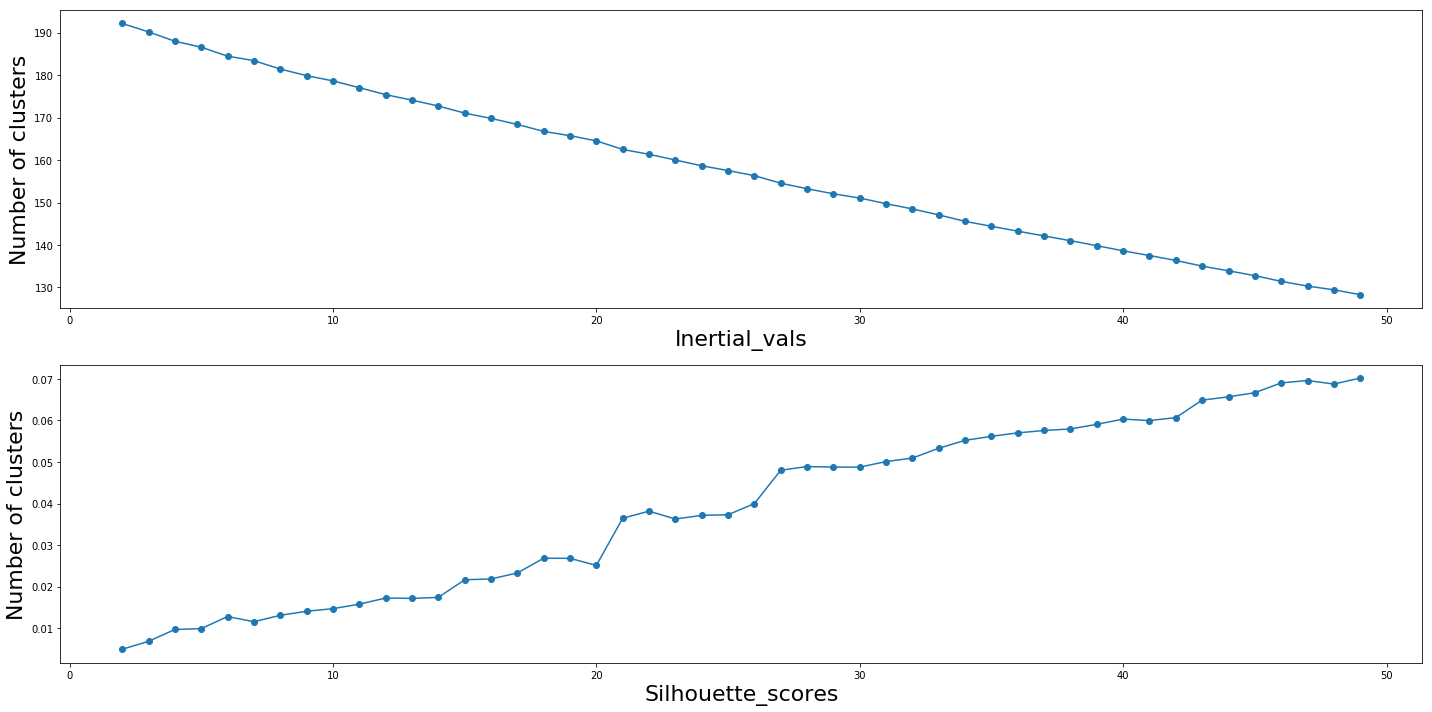

In [65]:
## How to determine the K?
text_clusters = ElbowEffectAndSilhouetteScore(X, range(2,50))

In [66]:
def visualise_text_cluster(n_clusters, cluster_centers, terms, num_word = 5):
    ordered_centroids = cluster_centers.argsort()[:, ::-1]
    
    for cluster in range(n_clusters):
        print("Top terms for cluster #{}:".format(cluster), end=" ")
        for term_idx in ordered_centroids[cluster, :num_word]:
            print(terms[term_idx], end=', ')
        print()
        
# it we set k=7
visualise_text_cluster(text_clusters[5].n_clusters, text_clusters[5].cluster_centers_, tfidf_vec.get_feature_names())

Top terms for cluster #0: england, ireland, rugby, say, wale, 
Top terms for cluster #1: 6, 7, roddick, set, open, 
Top terms for cluster #2: ball, wicket, england, vaughan, day, 
Top terms for cluster #3: open, australian, australian open, year, capriati, 
Top terms for cluster #4: liverpool, benitez, real, gerrard, madrid, 
Top terms for cluster #5: sri, drug, greek, test, lanka, 
Top terms for cluster #6: arsenal, chelsea, team, say, game, 


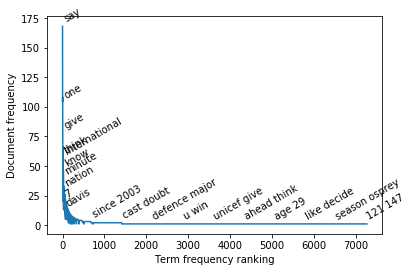

In [67]:
def calculate_tf_idf_terms(document_col):
    # Param - document_col: collection of raw document text that you want to analyse
    from sklearn.feature_extraction.text import CountVectorizer

    # use count vectorizer to find TF and DF of each term
    count_vec = CountVectorizer(tokenizer=cab_tokenizer, ngram_range=(1,2))
    X_count = count_vec.fit_transform(document_col)
    
    # create list of terms and their tf and df
    terms = [{'term': t, 'idx': count_vec.vocabulary_[t],
              'tf': X_count[:, count_vec.vocabulary_[t]].sum(),
              'df': X_count[:, count_vec.vocabulary_[t]].count_nonzero()}
             for t in count_vec.vocabulary_]
    
    return terms
    
terms = calculate_tf_idf_terms(allText)


def visualise_zipf(terms, itr_step = 50):
    from scipy.spatial.distance import euclidean
    from math import sqrt
    
    # --- Param ---
    # terms: collection of terms dictionary from calculate_tf_idf_terms function
    # itr_step: used to control how many terms that you want to plot. Num of terms to plot = N terms / itr_step
    
    # sort terms by its frequency
    terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True)
    
    # select a few of the terms for plotting purpose
    sel_terms = [terms[i] for i in range(0, len(terms), itr_step)]
    labels = [term['term'] for term in sel_terms]
    
    # plot term frequency ranking vs its DF
    plt.plot(range(len(sel_terms)), [x['df'] for x in sel_terms])
    plt.xlabel('Term frequency ranking')
    plt.ylabel('Document frequency')
    
    max_x = len(sel_terms)
    max_y = max([x['df'] for x in sel_terms])
    
    # annotate the points
    prev_x, prev_y = 0, 0
    for label, x, y in zip(labels,range(len(sel_terms)), [x['df'] for x in sel_terms]):
        # calculate the relative distance between labels to increase visibility
        x_dist = (abs(x - prev_x) / float(max_x)) ** 2
        y_dist = (abs(y - prev_y) / float(max_y)) ** 2
        scaled_dist = sqrt(x_dist + y_dist)
        
        if (scaled_dist > 0.1):
            plt.text(x+2, y+2, label, {'ha': 'left', 'va': 'bottom'}, rotation=30)
            prev_x, prev_y = x, y
    
    plt.show()
    
visualise_zipf(terms, 5)

## 3. Based on the ZIPF plot, list the top 10 terms that will be least useful for clustering purpose. 

Q: I select the one with the df and tf = 1? or the top df? So I can only find the term on the plot? And, how to rank the usefulness?

## 4. Did you disregard any frequent terms in addition to items automatically selected by the Filter tool?

In [ ]:
# Q: What's the filter tool? the arguments provided in the TfidfVectorizer?
# And, do we have to remove more terms after the filtering args?

## 5. Justify the term weighting option selected. 

Firstly, we don't want the included term to appear in most of the documents since this term will not make an important role during clustering. Moreover, we don't want to include the terms that occur in only one ducuments, which will not be informative to tell the relationships with other documents.

## 6. What is the number of input features available to execute clustering? (Hint: how the original text data is converted into a feature set that can be mined for knowledge discovery?)

Q: How should I answer this question?

The filtered tf-idf vector only has 6914 dimensions. 


## 7. State how many clusters are generated? Name each cluster meaningfully according to the terms that appear in the clusters?

Q: We have to determine the K first!


## 8. Identify the first fifteen high frequent terms (that are not stopwords or noise) in the start list?

In [68]:
terms.sort(key=lambda x: (x['tf'], x['df']), reverse=True) # first rank the tf then df

In [70]:
terms[:10]

[{'term': 'say', 'idx': 27447, 'tf': 447, 'df': 168},
 {'term': 'year', 'idx': 36020, 'tf': 308, 'df': 134},
 {'term': 'game', 'idx': 13304, 'tf': 249, 'df': 106},
 {'term': 'win', 'idx': 35322, 'tf': 246, 'df': 102},
 {'term': 'play', 'idx': 23829, 'tf': 240, 'df': 104},
 {'term': 'one', 'idx': 22447, 'tf': 204, 'df': 104},
 {'term': 'go', 'idx': 14040, 'tf': 203, 'df': 112},
 {'term': 'take', 'idx': 31441, 'tf': 202, 'df': 112},
 {'term': 'england', 'idx': 10579, 'tf': 199, 'df': 52},
 {'term': 'two', 'idx': 33467, 'tf': 197, 'df': 103}]

## 9. Describe how these clusters can be useful in the online personalised news story service planned by the news corporation.

These clusters can help the news company to grouping their news automatically. Morever, the company can put two groups of news together when their clusters are closed since they pay provide similar information. Therefore, the reader can find the interesting news efficiently.



